In [48]:
import os
import json
import pandas as pd
import re

In [2]:
base_dir = "E:/Mag_Modeli"


In [3]:
model_dirs = []
for path in ["E:\Mag_Modeli"]:
    if os.path.isdir(path):
        subdirs = [
            os.path.join(path, d)
            for d in os.listdir(path)
            if os.path.isdir(os.path.join(path, d))
            and os.path.isfile(os.path.join(path, d, "epoch_12.pth"))
            and not os.path.isfile(os.path.join(path, d, "bootstrap_class_summary.json"))
        ]
        model_dirs.extend(subdirs)
len(model_dirs)

0

In [4]:
def load_all_bootstrap_results_split(base_dir, budget20=False):
    base_models = []
    variant_models = []
    
    for root, dirs, files in os.walk(base_dir):
        
        if "not_reported" in root:
            continue
        for file in files:
            if file == "bootstrap_summary.json":
                
                file_path = os.path.join(root, file)
                
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    for epoch, metrics in data.items():
                        metrics_flat = {
                            "model_dir": os.path.relpath(root, base_dir),
                            "epoch": int(epoch),
                            **metrics
                        }

                        # Get just the folder name
                        folder_name = os.path.basename(root)
                        if "not_reported" in folder_name:
                            continue
                        # If folder name ends with a digit → it's a variant
                        if re.search(r'_\d+$', folder_name) is None:
                            base_models.append(metrics_flat)
                        else:
                            if "div_pure" in folder_name:
                                metrics_flat["method"] = "diversity"
                            elif "average" in folder_name:
                                metrics_flat["method"] = "average"
                            elif "count" in folder_name:
                                metrics_flat["method"] = "count"
                            elif "leastconf" in folder_name:
                                metrics_flat["method"] = "leastconf"
                            else:
                                metrics_flat["method"] = "random"
                            metrics_flat["cumulative labeling budget"] = folder_name.split("_")[-1]
                            if budget20:
                                if metrics_flat["cumulative labeling budget"] == "20":
                                    variant_models.append(metrics_flat)
                            else:
                                if metrics_flat["cumulative labeling budget"] != "20":
                                    variant_models.append(metrics_flat)
    #print(variant_models)
    df_base = pd.DataFrame(base_models)
    df_variant = pd.DataFrame(variant_models)
    return df_base, df_variant
df_base, df_variant = load_all_bootstrap_results_split(base_dir)
df_variant

model_dir  epoch  official_mAP  \
0             faster_rcnn_rvsa_l_800_mae_mtp_dior_1     12      0.024736   
1            faster_rcnn_rvsa_l_800_mae_mtp_dior_10     12      0.487344   
2             faster_rcnn_rvsa_l_800_mae_mtp_dior_3     12      0.304290   
3             faster_rcnn_rvsa_l_800_mae_mtp_dior_5     12      0.435765   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior_div_pure_1     12      0.024736   
..                                              ...    ...           ...   
115                       mmdetscalemae_unc_count_5     12      0.021199   
116                   mmdetscalemae_unc_leastconf_1     12      0.000136   
117                  mmdetscalemae_unc_leastconf_10     12      0.061414   
118                   mmdetscalemae_unc_leastconf_3     12      0.006237   
119                   mmdetscalemae_unc_leastconf_5     12      0.018026   

     official_mAP50  official_mAP_small  official_mAP_medium  \
0          0.088429        1.451125e-03             0.012199   
1          0.763015        1.715810e-01             0.409702   
2          0.584513        5.626607e-02             0.220517   
3          0.720056        1.334076e-01             0.343690   
4          0.088429        1.451125e-03             0.012199   
..              ...                 ...                  ...   
115        0.067790                 NaN                  NaN   
116        0.000624        6.812060e-07             0.000023   
117        0.188507                 NaN                  NaN   
118        0.021762                 NaN                  NaN   
119        0.059955                 NaN                  NaN   

     official_mAP_large  mAP_mean   mAP_std  mAP_CI_5  mAP_CI_95  mAP50_mean  \
0              0.065896  0.025132  0.000576  0.024145   0.026001    0.089431   
1              0.659413  0.488837  0.003192  0.484000   0.494539    0.764141   
2              0.458308  0.305383  0.002682  0.301622   0.309748    0.585279   
3              0.595411  0.437047  0.003032  0.433010   0.441552    0.720823   
4              0.065896  0.025132  0.000576  0.024145   0.026001    0.089431   
..                  ...       ...       ...       ...        ...         ...   
115                 NaN  0.021603  0.000511  0.020749   0.022437    0.068699   
116            0.000283  0.000144  0.000017  0.000122   0.000175    0.000651   
117                 NaN  0.061888  0.001149  0.060189   0.063460    0.190011   
118                 NaN  0.006492  0.000359  0.005969   0.007101    0.022409   
119                 NaN  0.018419  0.000675  0.017290   0.019635    0.060958   

     mAP50_std  mAP50_CI_5  mAP50_CI_95  \
0     0.001952    0.086502     0.092283   
1     0.003664    0.759104     0.769994   
2     0.004192    0.578809     0.592599   
3     0.004123    0.714604     0.727606   
4     0.001952    0.086502     0.092283   
..         ...         ...          ...   
115   0.001349    0.066611     0.070988   
116   0.000079    0.000560     0.000774   
117   0.002957    0.185778     0.195495   
118   0.001041    0.020846     0.024221   
119   0.001698    0.057897     0.063569   

                                         map_bootstrap  \
0    [0.0251363783025347, 0.025037409719722993, 0.0...   
1    [0.49182054414791854, 0.4945274891489954, 0.49...   
2    [0.30902270729852666, 0.30572227945422437, 0.3...   
3    [0.4393021065043728, 0.4391462665760707, 0.445...   
4    [0.0251363783025347, 0.025037409719722993, 0.0...   
..                                                 ...   
115  [0.022030106973992873, 0.021743638296145614, 0...   
116  [0.0001307432542534301, 0.00013496545798106287...   
117  [0.06142789412689344, 0.0624583402888478, 0.06...   
118  [0.006848527327384811, 0.006043238701510039, 0...   
119  [0.019139626949435884, 0.01880523973597489, 0....   

                                       map50_bootstrap     method  \
0    [0.08942447095788163, 0.09146177390704885, 0.0...     random   
1    [0.7685302580169544, 0.771500965169295, 0.

In [5]:
df_base

model_dir  epoch  official_mAP  official_mAP50  \
0  faster_rcnn_rvsa_l_800_mae_mtp_dior     12      0.573185        0.810865   
1                    mmdetdino784LowLR     12      0.436861        0.680247   
2                    mmdetdinolarge784     12      0.447923        0.684244   
3                          mmdetdinov3     12      0.436548        0.702925   
4                          mmdetsatmae     12      0.468142        0.731846   
5                        mmdetscalemae     12      0.498868        0.759939   

   official_mAP_small  official_mAP_medium  official_mAP_large  mAP_mean  \
0            0.207780             0.502627            0.750748  0.573878   
1            0.041982             0.320456            0.669156  0.437375   
2            0.055785             0.347568            0.677341  0.448548   
3            0.124205             0.372963            0.609208  0.437602   
4            0.117438             0.381768            0.651804  0.468731   
5            0.138104             0.410089            0.678285  0.499198   

    mAP_std  mAP_CI_5  mAP_CI_95  mAP50_mean  mAP50_std  mAP50_CI_5  \
0  0.003235  0.568927   0.578755    0.812114   0.003264    0.806777   
1  0.003346  0.432647   0.443213    0.680499   0.004212    0.673647   
2  0.003541  0.443911   0.454186    0.684642   0.004191    0.677572   
3  0.003183  0.433312   0.442390    0.703694   0.004438    0.696629   
4  0.003272  0.464359   0.474063    0.731937   0.004161    0.725159   
5  0.003467  0.493971   0.505240    0.759746   0.004015    0.752971   

   mAP50_CI_95                                      map_bootstrap  \
0     0.817708  [0.5732375625954357, 0.5781255616337102, 0.581...   
1     0.687447  [0.43925929845441647, 0.43835241134734143, 0.4...   
2     0.691726  [0.451158420616541, 0.45165399715611365, 0.459...   
3     0.710374  [0.43921188130298, 0.44146365155808587, 0.4475...   
4     0.739735  [0.47043839170150586, 0.47069650978256633, 0.4...   
5     0.766870  [0.5017998681098704, 0.5024169392813649, 0.510...   

                                     map50_bootstrap  
0  [0.8130469586229087, 0.8160397127192505, 0.819...  
1  [0.6837486912415162, 0.6827367221646801, 0.690...  
2  [0.6879079052841941, 0.6883035623629574, 0.696...  
3  [0.706013491694781, 0.7092996015621251, 0.7158...  
4  [0.7346823370397594, 0.7355574845962403, 0.743...  
5  [0.7642064980642845, 0.7651931726298697, 0.769...

In [6]:
test = df_base[["model_dir", "official_mAP", "mAP_CI_5","mAP_CI_95", "official_mAP50", "mAP50_CI_5","mAP50_CI_95"]]
test2 = df_base[["model_dir", "official_mAP_small","official_mAP_medium","official_mAP_large"]]

In [7]:

test['map_mean'] = (test['mAP_CI_5'] + test['mAP_CI_95'])/2
test['map_pm'] = (test['map_mean'] - test['mAP_CI_5'])
test['map50_mean']= (test['mAP50_CI_5'] + test['mAP50_CI_95'])/2
test['map50_pm'] = (test['map50_mean'] - test['mAP50_CI_5'])
num_cols = test.select_dtypes(include='number').columns
test[num_cols] = test[num_cols].round(3)
test

C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\2797309025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['map_mean'] = (test['mAP_CI_5'] + test['mAP_CI_95'])/2
C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\2797309025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['map_pm'] = (test['map_mean'] - test['mAP_CI_5'])
C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\2797309025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

model_dir  official_mAP  mAP_CI_5  mAP_CI_95  \
0  faster_rcnn_rvsa_l_800_mae_mtp_dior         0.573     0.569      0.579   
1                    mmdetdino784LowLR         0.437     0.433      0.443   
2                    mmdetdinolarge784         0.448     0.444      0.454   
3                          mmdetdinov3         0.437     0.433      0.442   
4                          mmdetsatmae         0.468     0.464      0.474   
5                        mmdetscalemae         0.499     0.494      0.505   

   official_mAP50  mAP50_CI_5  mAP50_CI_95  map_mean  map_pm  map50_mean  \
0           0.811       0.807        0.818     0.574   0.005       0.812   
1           0.680       0.674        0.687     0.438   0.005       0.681   
2           0.684       0.678        0.692     0.449   0.005       0.685   
3           0.703       0.697        0.710     0.438   0.005       0.704   
4           0.732       0.725        0.740     0.469   0.005       0.732   
5           0.760       0.753        0.767     0.500   0.006       0.760   

   map50_pm  
0     0.005  
1     0.007  
2     0.007  
3     0.007  
4     0.007  
5     0.007

\begin{table}[t]
\centering
\small
\setlength{\tabcolsep}{6pt}
\begin{tabular}{lcc}
\toprule
Backbone & mAP & mAP@50 \\
\midrule
MTP            & 57.4 $\pm$ 0.5\% & 81.2 $\pm$ 0.5\% \\
DINOv2 Large   & 44.9 $\pm$ 0.5\% & 68.5 $\pm$ 0.7\% \\
DINOv3         & 43.8 $\pm$ 0.5\% & 70.4 $\pm$ 0.7\% \\
SATMAE         & 46.9 $\pm$ 0.5\% & 73.2 $\pm$ 0.7\% \\
SCALEMAE       & 50.0 $\pm$ 0.6\% & 76.0 $\pm$ 0.7\% \\
\bottomrule
\end{tabular}
\caption{Results reported as mean $\pm$ half-width of the 95\% bootstrap confidence interval (percent).}
\label{tab:map_ci_pm}
\end{table}

In [8]:
num_cols = test2.select_dtypes(include='number').columns
test2[num_cols] = test2[num_cols].round(3)
test2

C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\3052983440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2[num_cols] = test2[num_cols].round(3)


model_dir  official_mAP_small  \
0  faster_rcnn_rvsa_l_800_mae_mtp_dior               0.208   
1                    mmdetdino784LowLR               0.042   
2                    mmdetdinolarge784               0.056   
3                          mmdetdinov3               0.124   
4                          mmdetsatmae               0.117   
5                        mmdetscalemae               0.138   

   official_mAP_medium  official_mAP_large  
0                0.503               0.751  
1                0.320               0.669  
2                0.348               0.677  
3                0.373               0.609  
4                0.382               0.652  
5                0.410               0.678

\begin{table}[t]
\centering
\small
\setlength{\tabcolsep}{6pt}
\begin{tabular}{lccc}
\toprule
Backbone & $\text{AP}_{\small}$ & $\text{AP}_{\mathrm{m}}$ & $\text{AP}_{\large}$ \\
\midrule
\textbf{MTP}          & \textbf{20.8 $\pm$ 0.3\%} & \textbf{50.3 $\pm$ 0.6\%} & \textbf{75.1 $\pm$ 0.9\%} \\
DINOv2 Large          & 5.6 $\pm$ 0.3\%           & 34.8 $\pm$ 0.4\%          & 67.7 $\pm$ 0.9\% \\
DINOv3                & 12.4 $\pm$ 0.3\%          & 37.3 $\pm$ 0.4\%          & 60.9 $\pm$ 0.9\% \\
SATMAE                & 11.7 $\pm$ 0.3\%          & 38.2 $\pm$ 0.5\%          & 65.2 $\pm$ 0.9\% \\
SCALEMAE              & 13.8 $\pm$ 0.3\%          & 41.0 $\pm$ 0.5\%          & 67.8 $\pm$ 0.9\% \\
\bottomrule
\end{tabular}
\caption{Official COCO AP at small/medium/large scales reported as mean~$\pm$~half-width of the 95\% confidence interval (percent). Confidence intervals are provisional estimates and will be replaced by computed values.}
\label{tab:ap_scales_pm}
\end{table}


In [9]:
df_variant

model_dir  epoch  official_mAP  \
0             faster_rcnn_rvsa_l_800_mae_mtp_dior_1     12      0.024736   
1            faster_rcnn_rvsa_l_800_mae_mtp_dior_10     12      0.487344   
2             faster_rcnn_rvsa_l_800_mae_mtp_dior_3     12      0.304290   
3             faster_rcnn_rvsa_l_800_mae_mtp_dior_5     12      0.435765   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior_div_pure_1     12      0.024736   
..                                              ...    ...           ...   
115                       mmdetscalemae_unc_count_5     12      0.021199   
116                   mmdetscalemae_unc_leastconf_1     12      0.000136   
117                  mmdetscalemae_unc_leastconf_10     12      0.061414   
118                   mmdetscalemae_unc_leastconf_3     12      0.006237   
119                   mmdetscalemae_unc_leastconf_5     12      0.018026   

     official_mAP50  official_mAP_small  official_mAP_medium  \
0          0.088429        1.451125e-03             0.012199   
1          0.763015        1.715810e-01             0.409702   
2          0.584513        5.626607e-02             0.220517   
3          0.720056        1.334076e-01             0.343690   
4          0.088429        1.451125e-03             0.012199   
..              ...                 ...                  ...   
115        0.067790                 NaN                  NaN   
116        0.000624        6.812060e-07             0.000023   
117        0.188507                 NaN                  NaN   
118        0.021762                 NaN                  NaN   
119        0.059955                 NaN                  NaN   

     official_mAP_large  mAP_mean   mAP_std  mAP_CI_5  mAP_CI_95  mAP50_mean  \
0              0.065896  0.025132  0.000576  0.024145   0.026001    0.089431   
1              0.659413  0.488837  0.003192  0.484000   0.494539    0.764141   
2              0.458308  0.305383  0.002682  0.301622   0.309748    0.585279   
3              0.595411  0.437047  0.003032  0.433010   0.441552    0.720823   
4              0.065896  0.025132  0.000576  0.024145   0.026001    0.089431   
..                  ...       ...       ...       ...        ...         ...   
115                 NaN  0.021603  0.000511  0.020749   0.022437    0.068699   
116            0.000283  0.000144  0.000017  0.000122   0.000175    0.000651   
117                 NaN  0.061888  0.001149  0.060189   0.063460    0.190011   
118                 NaN  0.006492  0.000359  0.005969   0.007101    0.022409   
119                 NaN  0.018419  0.000675  0.017290   0.019635    0.060958   

     mAP50_std  mAP50_CI_5  mAP50_CI_95  \
0     0.001952    0.086502     0.092283   
1     0.003664    0.759104     0.769994   
2     0.004192    0.578809     0.592599   
3     0.004123    0.714604     0.727606   
4     0.001952    0.086502     0.092283   
..         ...         ...          ...   
115   0.001349    0.066611     0.070988   
116   0.000079    0.000560     0.000774   
117   0.002957    0.185778     0.195495   
118   0.001041    0.020846     0.024221   
119   0.001698    0.057897     0.063569   

                                         map_bootstrap  \
0    [0.0251363783025347, 0.025037409719722993, 0.0...   
1    [0.49182054414791854, 0.4945274891489954, 0.49...   
2    [0.30902270729852666, 0.30572227945422437, 0.3...   
3    [0.4393021065043728, 0.4391462665760707, 0.445...   
4    [0.0251363783025347, 0.025037409719722993, 0.0...   
..                                                 ...   
115  [0.022030106973992873, 0.021743638296145614, 0...   
116  [0.0001307432542534301, 0.00013496545798106287...   
117  [0.06142789412689344, 0.0624583402888478, 0.06...   
118  [0.006848527327384811, 0.006043238701510039, 0...   
119  [0.019139626949435884, 0.01880523973597489, 0....   

                                       map50_bootstrap     method  \
0    [0.08942447095788163, 0.09146177390704885, 0.0...     random   
1    [0.7685302580169544, 0.771500965169295, 0.

In [10]:
test3 = df_variant[["model_dir", "official_mAP50", "mAP50_CI_5", "mAP50_CI_95", "method", "cumulative labeling budget"]]
num_cols = test3.select_dtypes(include='number').columns
test3[num_cols] = test3[num_cols].round(3) * 100
test3

C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\1435498654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3[num_cols] = test3[num_cols].round(3) * 100


model_dir  official_mAP50  \
0             faster_rcnn_rvsa_l_800_mae_mtp_dior_1             8.8   
1            faster_rcnn_rvsa_l_800_mae_mtp_dior_10            76.3   
2             faster_rcnn_rvsa_l_800_mae_mtp_dior_3            58.5   
3             faster_rcnn_rvsa_l_800_mae_mtp_dior_5            72.0   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior_div_pure_1             8.8   
..                                              ...             ...   
115                       mmdetscalemae_unc_count_5             6.8   
116                   mmdetscalemae_unc_leastconf_1             0.1   
117                  mmdetscalemae_unc_leastconf_10            18.9   
118                   mmdetscalemae_unc_leastconf_3             2.2   
119                   mmdetscalemae_unc_leastconf_5             6.0   

     mAP50_CI_5  mAP50_CI_95     method cumulative labeling budget  
0           8.7          9.2     random                          1  
1          75.9         77.0     random                         10  
2          57.9         59.3     random                          3  
3          71.5         72.8     random                          5  
4           8.7          9.2  diversity                          1  
..          ...          ...        ...                        ...  
115         6.7          7.1      count                          5  
116         0.1          0.1  leastconf                          1  
117        18.6         19.5  leastconf                         10  
118         2.1          2.4  leastconf                          3  
119         5.8          6.4  leastconf                          5  

[120 rows x 6 columns]

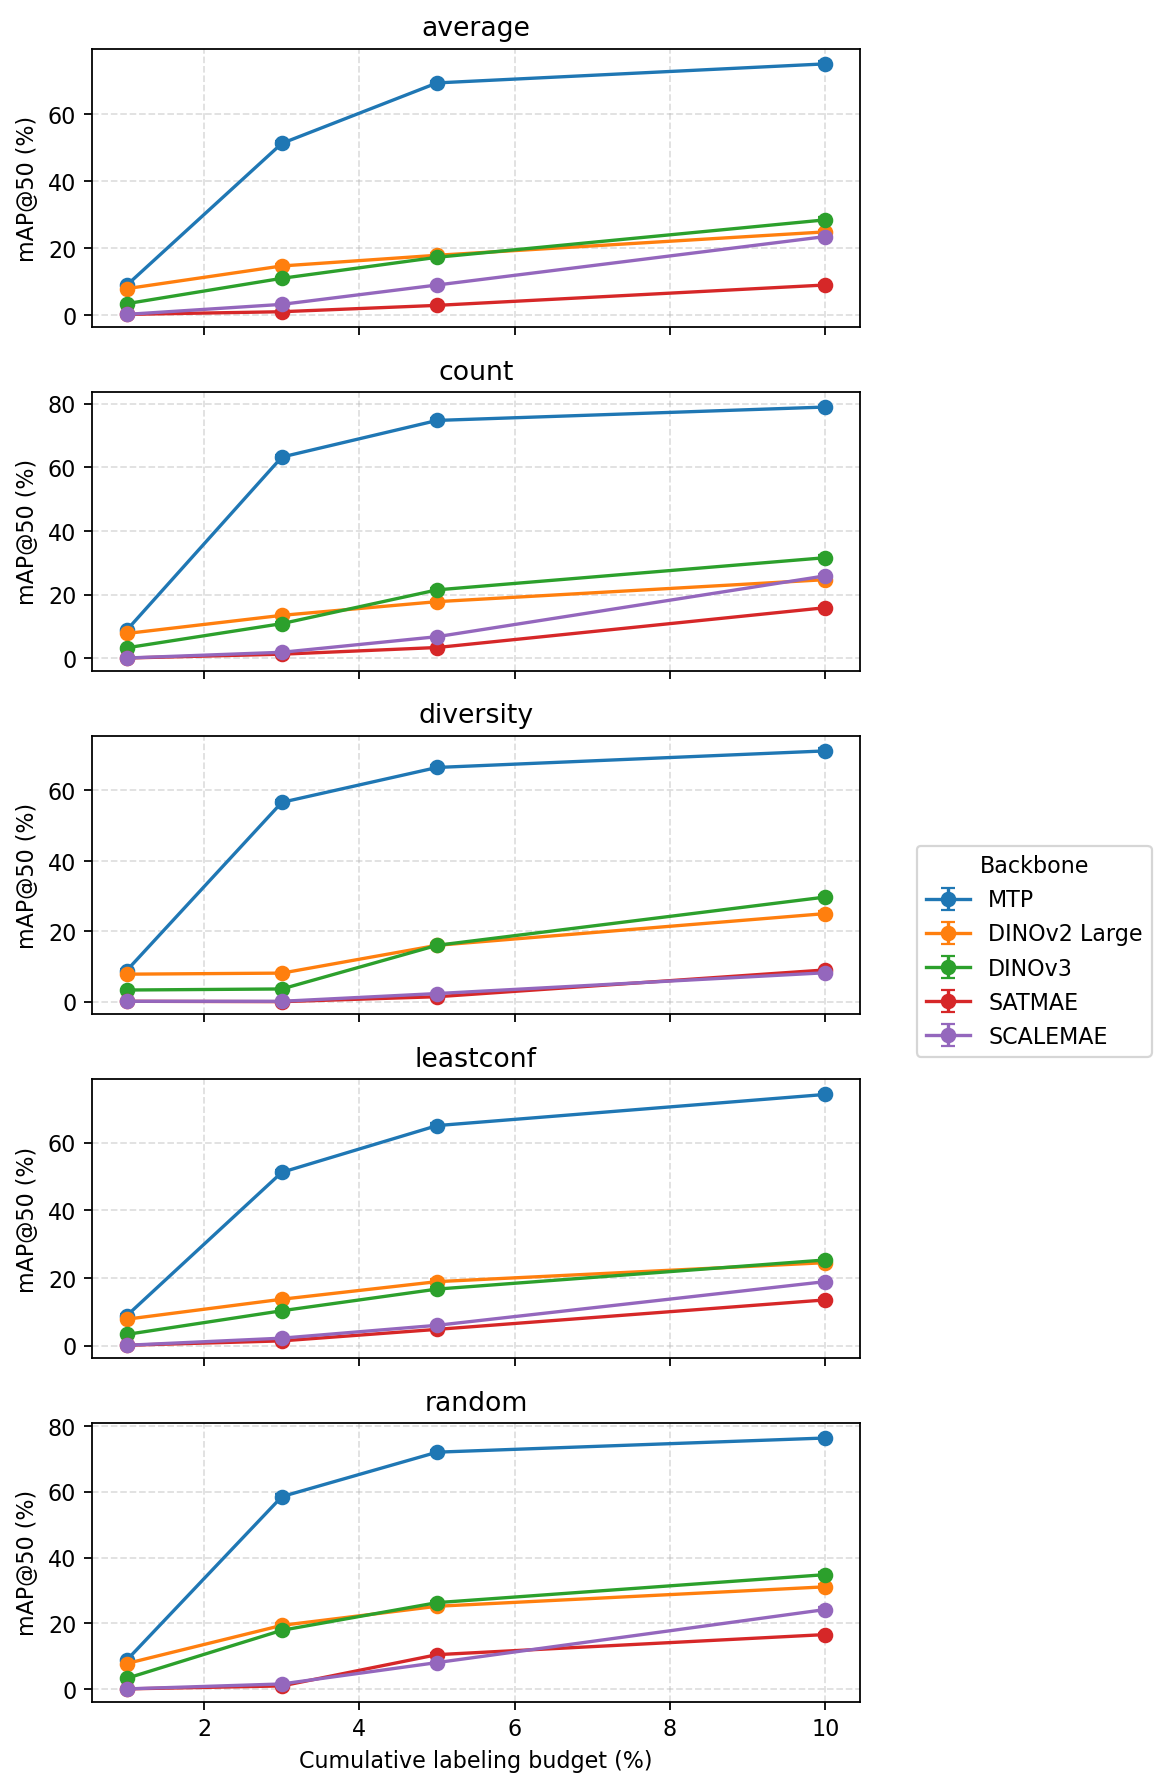

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- backbone inference; tweak if you already have a backbone column ---
def infer_backbone(model_dir: str) -> str:
    s = str(model_dir).lower()
    if "scalemae" in s: return "SCALEMAE"
    if "satmae"  in s: return "SATMAE"
    if "dinov3"  in s: return "DINOv3"
    if "dinolarge" in s or "dinov2large" in s or "dinol" in s: return "DINOv2 Large"
    if "mtp"     in s: return "MTP"
    return model_dir  # fallback

def plot_al_panel_by_method_simple_no_reindex(
    df: pd.DataFrame,
    output_path="al_methods_panel",
    method_col="method",
    model_col="model_dir",
    backbone_col=None,                         # set if you already have it
    budget_col="cumulative labeling budget",   # strings: "1","3","5","10"
    y_col="official_mAP50",
    ci5_col="mAP50_CI_5",
    ci95_col="mAP50_CI_95",
    methods_order=None,                        # optional explicit order
    backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    budgets_order=("1","3","5","10"),
    figsize_per_row=(6.8, 2.4),
    dpi=160
):
    d = df.copy()

    # Backbone
    if backbone_col and backbone_col in d.columns:
        d["_backbone"] = d[backbone_col].astype(str)
    else:
        d["_backbone"] = d[model_col].map(infer_backbone)

    methods = methods_order if methods_order else sorted(d[method_col].unique().tolist())
    backbones = list(backbones_order)
    budgets = list(budgets_order)

    # Figure
    width, h_per_row = figsize_per_row
    fig_h = max(2.0, h_per_row * max(1, len(methods)))
    fig, axes = plt.subplots(nrows=len(methods), ncols=1, sharex=True, figsize=(width, fig_h), dpi=dpi)
    if len(methods) == 1:
        axes = [axes]

    for ax, m in zip(axes, methods):
        dm = d[d[method_col] == m]

        for b in backbones:
            db = dm[dm["_backbone"] == b]
            #print(m,b)
            #print(db)
            # Build series in your exact budgets order; take the LAST row if multiple
            xs, ys, lowers, uppers = [], [], [], []
            for bud in budgets:
                sub = db[db[budget_col] == bud]
                if sub.empty:
                    continue
                row = sub.iloc[-1]
                x = float(bud)                 # budgets are strings "1","3","5","10"
                y = float(row[y_col])          # already in %
                ci5 = float(row[ci5_col])      # already in %
                ci95 = float(row[ci95_col])    # already in %
                xs.append(x)
                ys.append(y)
                lowers.append(y - ci5)
                uppers.append(ci95 - y)

            if xs:
                xs = np.array(xs)
                ys = np.array(ys)
                yerr = np.vstack([np.array(lowers), np.array(uppers)])
                ax.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=3, label=str(b))

        ax.set_title(str(m))
        ax.set_ylabel("mAP@50 (%)")
        ax.grid(True, linestyle='--', alpha=0.4)

    axes[-1].set_xlabel("Cumulative labeling budget (%)")

    # ---- shared legend on the RIGHT ----
    handles_by_label = {}
    for ax in axes:
        h, l = ax.get_legend_handles_labels()
        for hh, ll in zip(h, l):
            handles_by_label.setdefault(ll, hh)
    labels = [b for b in backbones if b in handles_by_label]
    handles = [handles_by_label[b] for b in labels]

    fig.subplots_adjust(right=0.82)
    fig.legend(
        handles, labels,
        loc="center left",
        bbox_to_anchor=(0.84, 0.5),
        title="Backbone",
        frameon=True
    )
    fig.tight_layout(rect=[0.0, 0.06, 0.82, 1.0])

    # Save
    output_path = Path(output_path)
    pdf_path = output_path.with_suffix(".pdf")
    png_path = output_path.with_suffix(".png")
    #fig.savefig(pdf_path)
    #fig.savefig(png_path)
    #plt.close(fig)
    
    return pdf_path, png_path
pdf_path, png_path = plot_al_panel_by_method_simple_no_reindex(test3)


['MTP', 'DINOv2', 'DINOv3', 'SATMAE', 'SCALEMAE']
[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>]


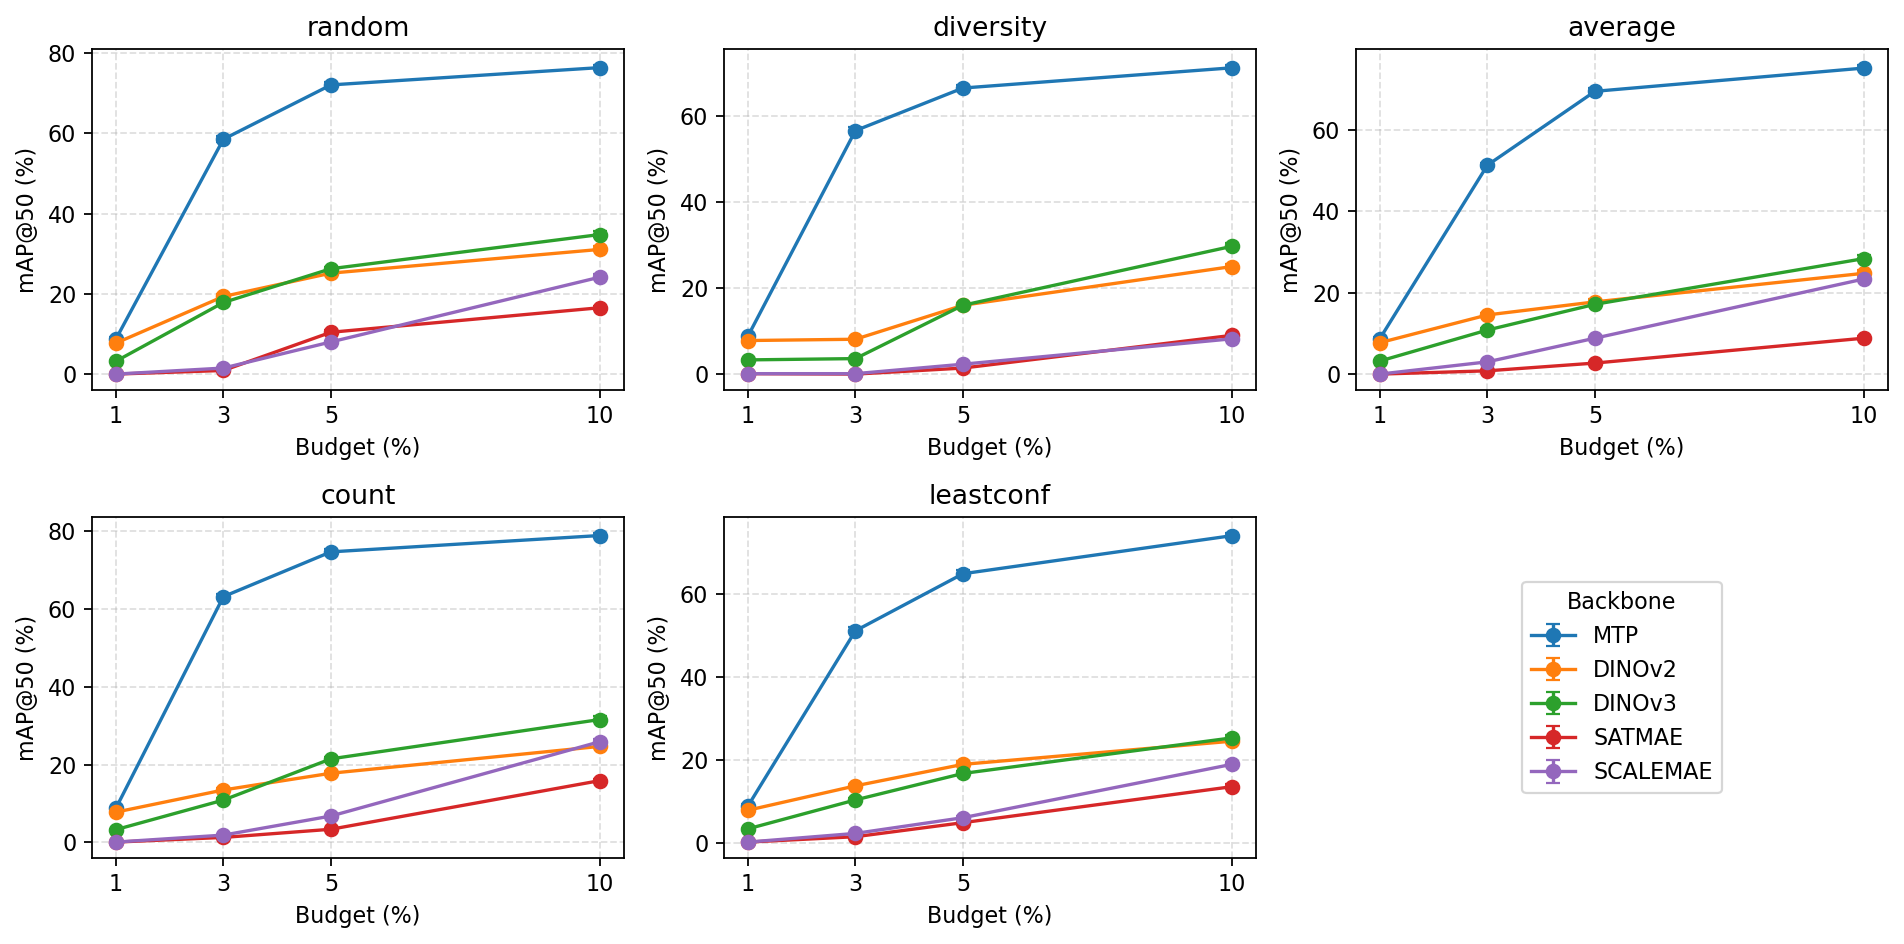

Saved: al_methods_2x3.pdf al_methods_2x3.png


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- backbone inference; skip if you already have a backbone column ---
def infer_backbone(model_dir: str) -> str:
    s = str(model_dir).lower()
    if "scalemae" in s: return "SCALEMAE"
    if "satmae"  in s: return "SATMAE"
    if "dinov3"  in s: return "DINOv3"
    if "dinolarge" in s or "dinov2large" in s or "dinol" in s: return "DINOv2 Large"
    if "mtp"     in s: return "MTP"
    return model_dir  # fallback

def plot_al_2x3_panel(
    df: pd.DataFrame,
    output_path="al_methods_2x3",
    method_col="method",
    model_col="model_dir",
    backbone_col=None,                         # set this if your DF already has a backbone column
    budget_col="cumulative labeling budget",   # strings: "1","3","5","10"
    y_col="official_mAP50",
    ci5_col="mAP50_CI_5",
    ci95_col="mAP50_CI_95",
    methods_order=None,                        # optional: explicit list of 5 methods in desired order
    backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    budgets_order=("1","3","5","10"),
    figsize=(12, 6),                           # width, height of the whole figure
    dpi=160
):
    d = df.copy()

    # Backbone names
    if backbone_col and backbone_col in d.columns:
        d["_backbone"] = d[backbone_col].astype(str)
    else:
        d["_backbone"] = d[model_col].map(infer_backbone)

    # Methods (take first 5 in given or discovered order)
    methods = methods_order if methods_order else list(dict.fromkeys(d[method_col].tolist()))
    methods = methods[:5]
    backbones = list(backbones_order)
    budgets = list(budgets_order)

    # Build 2x3 grid (last cell for legend)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize, dpi=dpi, sharex=False, sharey=False)
    axes = np.array(axes)
    plot_axes = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]
    legend_ax = axes[1,2]  # bottom-right panel for legend
    legend_ax.axis("off")

    # Keep handles for legend
    handles_by_label = {}

    # Plot each method into its assigned subplot
    for ax, m in zip(plot_axes, methods):
        dm = d[d[method_col] == m]

        for b in backbones:
            db = dm[dm["_backbone"] == b]

            xs, ys, lowers, uppers = [], [], [], []
            for bud in budgets:
                sub = db[db[budget_col] == bud]
                if sub.empty:
                    continue
                row = sub.iloc[-1]  # take the last occurrence if multiples
                x   = float(bud)                # budgets are "1","3","5","10"
                y   = float(row[y_col])         # already in %
                ci5 = float(row[ci5_col])       # already in %
                ci9 = float(row[ci95_col])      # already in %
                xs.append(x); ys.append(y)
                lowers.append(y - ci5)
                uppers.append(ci9 - y)

            if xs:
                xs = np.array(xs)
                ys = np.array(ys)
                yerr = np.vstack([np.array(lowers), np.array(uppers)])
                ln = ax.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=3, label=str(b))
                # store handle once per backbone
                if str(b) not in handles_by_label:
                    handles_by_label[str(b)] = ln
     
        ax.set_title(str(m))
        ax.set_xlabel("Budget (%)")
        ax.set_ylabel("mAP@50 (%)")
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.set_xticks([1,3,5,10])

    # Shared legend in bottom-right empty panel
    labels = [b for b in backbones if b in handles_by_label]
    handles = [handles_by_label[b] for b in labels]
    labels[1] = 'DINOv2'
    print(labels)
    print(handles)
    legend_ax.legend(handles, labels, loc="center", title="Backbone", frameon=True)

    fig.tight_layout()
    output_path = Path(output_path)
    pdf_path = output_path.with_suffix(".pdf")
    png_path = output_path.with_suffix(".png")
    plt.rcParams.update({
    "font.size": 16,         # base font size
    "axes.titlesize": 18,    # subplot titles
    "axes.labelsize": 16,    # x/y labels
    "xtick.labelsize": 14,   # tick labels
    "ytick.labelsize": 14,
    "legend.fontsize": 14,   # legend text
    "legend.title_fontsize": 15
    })
    #fig.savefig(pdf_path)
    #fig.savefig(png_path)
    #plt.close(fig)
    plt.show()
    return pdf_path, png_path
pdf_path, png_path = plot_al_2x3_panel(test3)
print("Saved:", pdf_path, png_path)

In [13]:
# al_methods_2x3_panel.py
# One image with 5 method panels (3 on first row, 2 on second row),
# bottom-right cell used for a shared legend.
# Uses columns:
#   method, model_dir, cumulative labeling budget ("1","3","5","10"),
#   official_mAP50, mAP50_CI_5, mAP50_CI_95
#
# Backbones are inferred from model_dir unless you pass backbone_col.
# No deduping/checking; if multiple rows exist per (method, backbone, budget),
# the last one found is used.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# --- simple backbone inference; set backbone_col if you already have it ---
def infer_backbone(model_dir: str) -> str:
    s = str(model_dir).lower()
    if "scalemae" in s: return "SCALEMAE"
    if "satmae"  in s: return "SATMAE"
    if "dinov3"  in s: return "DINOv3"
    if "dinolarge" in s or "dinov2large" in s or "dinol" in s: return "DINOv2 Large"
    if "mtp"     in s: return "MTP"
    return model_dir  # fallback to the raw string if no match


def plot_al_2x3_panel(
    df: pd.DataFrame,
    output_path="al_methods_2x3",
    *,
    method_col="method",
    model_col="model_dir",
    backbone_col=None,                       # e.g. "backbone" if already present
    budget_col="cumulative labeling budget", # strings: "1","3","5","10"
    y_col="official_mAP50",
    ci5_col="mAP50_CI_5",
    ci95_col="mAP50_CI_95",
    methods_order=None,                      # optional list of 5 methods in desired order
    backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    budgets_order=("1","3","5","10"),
    figsize=(12, 6),
    dpi=160,
    y_lim=(0, 82),
    y_tick_step=10
):
    d = df.copy()

    # Backbone names
    if backbone_col and backbone_col in d.columns:
        d["_backbone"] = d[backbone_col].astype(str)
    else:
        d["_backbone"] = d[model_col].map(infer_backbone)

    # Choose 5 methods (order given or as they appear)
    methods = methods_order if methods_order else list(dict.fromkeys(d[method_col].tolist()))
    methods = methods[:5]
    backbones = list(backbones_order)
    budgets = list(budgets_order)

    # Build 2x3 grid (last cell for legend)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize, dpi=dpi, sharex=False, sharey=False)
    axes = np.array(axes)
    plot_axes = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]
    legend_ax = axes[1,2]  # bottom-right panel for legend
    legend_ax.axis("off")

    # Store one handle per backbone for the shared legend
    handles_by_label = {}

    # Plot each method
    for ax, m in zip(plot_axes, methods):
        dm = d[d[method_col] == m]

        for b in backbones:
            db = dm[dm["_backbone"] == b]

            # Build arrays in the exact budgets order; take the LAST row if multiples
            xs, ys, lowers, uppers = [], [], [], []
            for bud in budgets:
                sub = db[db[budget_col] == bud]
                if sub.empty:
                    continue
                row = sub.iloc[-1]
                x   = float(bud)                 # budgets are "1","3","5","10"
                y   = float(row[y_col])          # already in %
                ci5 = float(row[ci5_col])        # already in %
                ci9 = float(row[ci95_col])       # already in %
                xs.append(x); ys.append(y)
                lowers.append(y - ci5)
                uppers.append(ci9 - y)

            if xs:
                xs = np.array(xs)
                ys = np.array(ys)
                yerr = np.vstack([np.array(lowers), np.array(uppers)])
                ln = ax.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=3, label=str(b))
                # Save first handle we create for this backbone
                if str(b) not in handles_by_label:
                    handles_by_label[str(b)] = ln

        ax.set_title(str(m))
        ax.set_xlabel("Budget (%)")
        ax.set_ylabel("mAP@50 (%)")
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.set_xticks([1,3,5,10])

        # Uniform y-axis across all panels
        if y_lim is not None:
            ax.set_ylim(*y_lim)
            if y_tick_step:
                ax.set_yticks(np.arange(y_lim[0], y_lim[1] + 1e-9, y_tick_step))

    # Shared legend in bottom-right empty panel
    labels = [b for b in backbones if b in handles_by_label]
    handles = [handles_by_label[b] for b in labels]
    legend_ax.legend(handles, labels, loc="center", title="Backbone", frameon=True)

    fig.tight_layout()

    # Save
    output_path = Path(output_path)
    pdf_path = output_path.with_suffix(".pdf")
    png_path = output_path.with_suffix(".png")
    fig.savefig(pdf_path)
    fig.savefig(png_path)
    plt.close(fig)
    #plt.show()
    return pdf_path, png_path


# -------------------------
# Example usage (uncomment):
# -------------------------
# if __name__ == "__main__":
#     # Suppose you already have your DataFrame in memory as `df`
#     # (with the columns named exactly as described).
pdf_path, png_path = plot_al_2x3_panel(
         test3,
         output_path="al_methods_2x3",
         # methods_order=["Core-Set", "Entropy", "BALD", "Random", "Diversity"],  # optional explicit order
         y_lim=(0, 82),   # lock y-axis to 0..82 for every subplot
         y_tick_step=10
)
print("Saved:", pdf_path, png_path)


Saved: al_methods_2x3.pdf al_methods_2x3.png


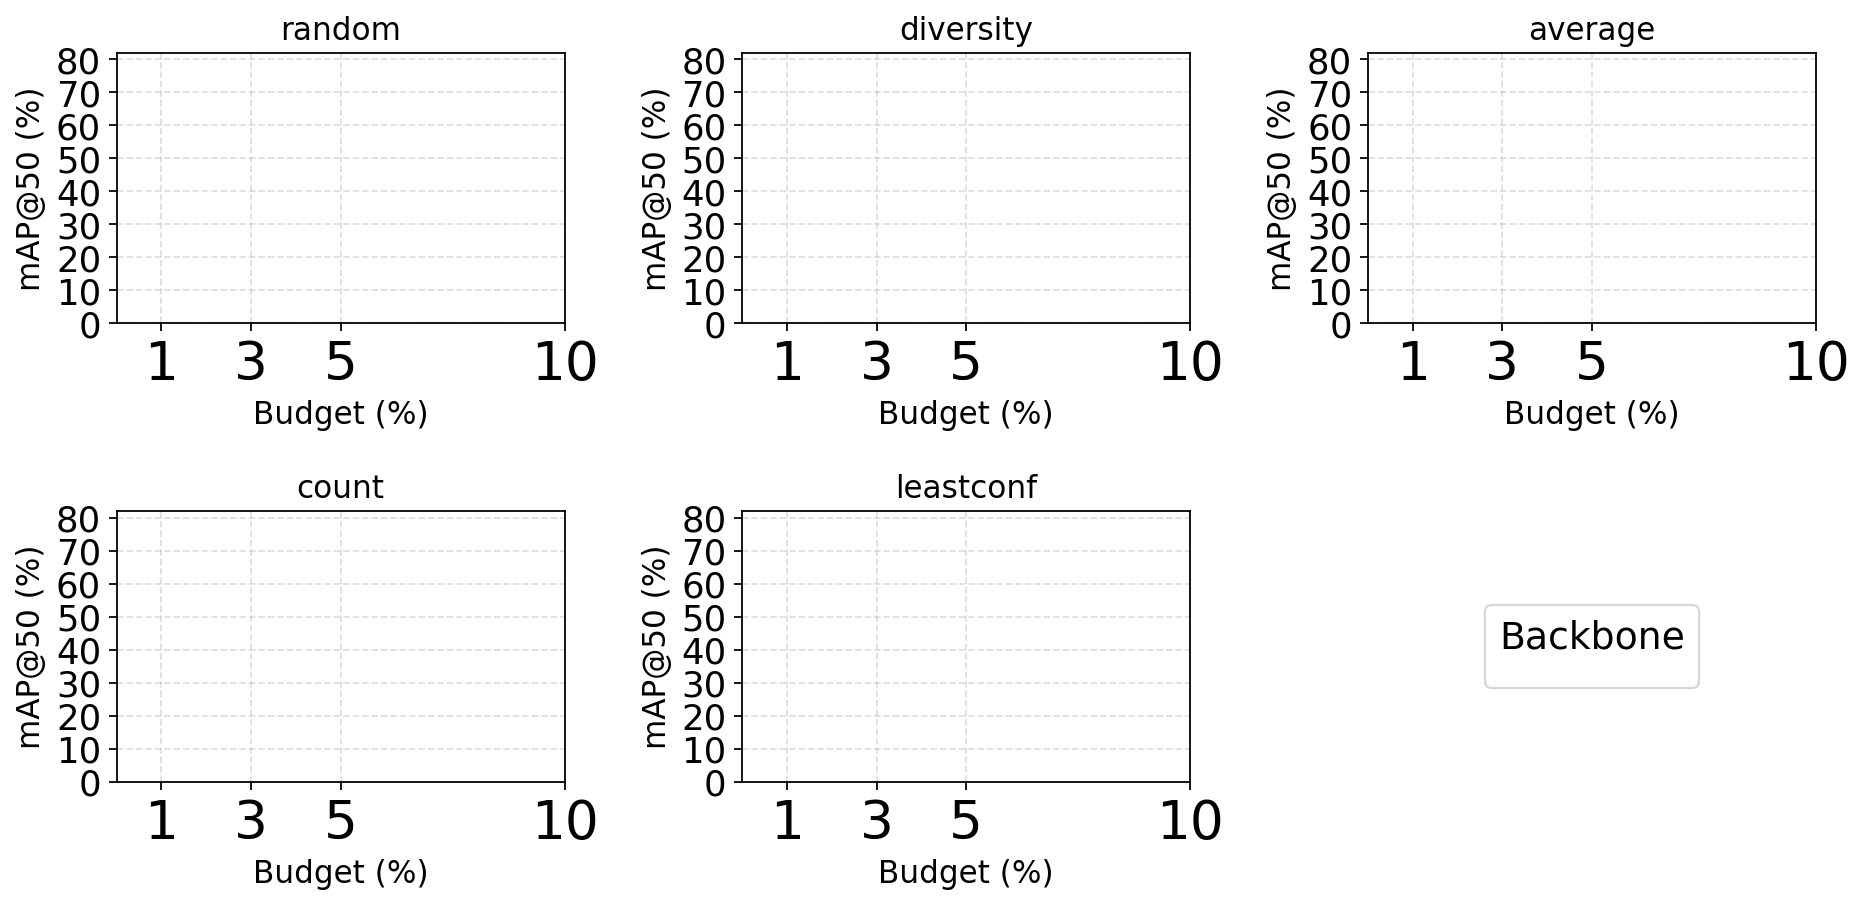

Saved: al_methods_2x3.pdf al_methods_2x3.png


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.patheffects as pe

def plot_al_2x3_with_ci(
    df: pd.DataFrame,
    output_path="al_methods_2x3b",
    *,
    # column names (data are already %; budgets are strings "1","3","5","10")
    method_col="method",
    model_col="model_dir",
    backbone_col=None,                       # set if you already have a backbone column
    budget_col="cumulative labeling budget",
    y_col="official_mAP50",
    ci5_col="mAP50_CI_5",
    ci95_col="mAP50_CI_95",
    # ordering
    methods_order=None,                      # optional: explicit list of 5 methods in desired order
    backbones_order = ("MTP", "DINOv2 Base", "DINOv2 Large", "DINOv3", "SATMAE", "SCALEMAE"),
    budgets_order=("1","3","5","10"),
    # figure/layout
    figsize=(12, 6),
    dpi=160,
    y_lim=(0, 82),
    y_tick_step=10,
    # CI visibility
    ci_threshold_pp=1.0,                     # hide CIs whose half-width is < this (percentage points)
    show_small_ci_marker=True,               # draw hollow square where CI is hidden
    # appearance
    line_kwargs=None,                        # e.g., dict(linewidth=0.7, marker='o', markersize=4)
    whisker_kwargs=None                      # e.g., dict(elinewidth=1.4, capsize=5, capthick=1.4, alpha=0.95)
):
    # --- tiny helper to infer backbone from model_dir if needed ---
    def _infer_backbone(model_dir: str) -> str:
        s = str(model_dir).lower()
        if "scalemae"   in s: return "SCALEMAE"
        if "satmae"     in s: return "SATMAE"
        if "dinov3"     in s: return "DINOv3"
        if "dinolarge"  in s or "dinov2large" in s or "dinol" in s: return "DINOv2 Large"
        if "dino"       in s: return "DINOv2 Base"
        if "mtp"        in s: return "MTP"
        return model_dir  # fallback

    d = df.copy()

    # Backbone names
    if backbone_col and backbone_col in d.columns:
        d["_backbone"] = d[backbone_col].astype(str)
    else:
        d["_backbone"] = d[model_col].map(_infer_backbone)

    # Choose 5 methods
    methods = methods_order if methods_order else list(dict.fromkeys(d[method_col].tolist()))
    methods = methods[:5]
    backbones = list(backbones_order)
    budgets = list(budgets_order)

    # Layout: 2x3 grid (last cell for legend)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize, dpi=dpi, sharex=False, sharey=False)
    axes = np.array(axes)
    plot_axes = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1]]
    legend_ax = axes[1,2]
    legend_ax.axis("off")

    # Defaults for style (thin mean line + dots; CI whiskers on top)
    if line_kwargs is None:
        line_kwargs = dict(
            linewidth=0.9,
            marker='o',
            markersize=4,
            markeredgewidth=0.8,
            solid_joinstyle='round',
            solid_capstyle='round',
            alpha=0.95,
            zorder=2
        )
    if whisker_kwargs is None:
        whisker_kwargs = dict(elinewidth=1.4, capsize=5, capthick=1.4, alpha=0.95, zorder=3)

    # For shared legend: keep one handle per backbone
    handles_by_label = {}

    # Plot each method panel
    for ax, m in zip(plot_axes, methods):
        dm = d[d[method_col] == m]

        for b in backbones:
            db = dm[dm["_backbone"] == b]

            # Build arrays in the exact budgets order; take the LAST row if multiples
            xs, ys, lowers, uppers = [], [], [], []
            for bud in budgets:
                sub = db[db[budget_col] == bud]
                if sub.empty:
                    continue
                row = sub.iloc[-1]
                x   = float(bud)            # "1","3","5","10" -> 1.0, 3.0, ...
                y   = float(row[y_col])     # already in %
                c5  = float(row[ci5_col])   # 5th percentile (endpoint)
                c95 = float(row[ci95_col])  # 95th percentile (endpoint)
                xs.append(x); ys.append(y)
                lowers.append(y - c5)       # lower half-width
                uppers.append(c95 - y)      # upper half-width

            if xs:
                xs = np.array(xs)
                ys = np.array(ys)
                low = np.array(lowers)
                high = np.array(uppers)

                # 1) mean as thin line + dots
                ln, = ax.plot(xs, ys, label=str(b), **line_kwargs)

                # 2) CI whiskers on top — only where half-width >= threshold
                mask = (low >= ci_threshold_pp) | (high >= ci_threshold_pp)
                if mask.any():
                    ax.errorbar(
                        xs[mask], ys[mask],
                        yerr=np.vstack([low[mask], high[mask]]),
                        fmt='none',
                        ecolor=ln.get_color(),      # match color to mean line
                        **whisker_kwargs
                    )

                # Optional: mark small/hidden CIs with a hollow square
                if show_small_ci_marker:
                    small = ~mask
                    if small.any():
                        ax.scatter(
                            xs[small], ys[small],
                            s=40, marker='s', facecolors='none',
                            edgecolors=ln.get_color(), linewidths=2.0,
                            zorder=6,
                            path_effects=[
                                pe.Stroke(linewidth=4.0, foreground='white'),  # halo behind
                                pe.Normal()
                            ]
                        )

                if str(b) not in handles_by_label:
                    handles_by_label[str(b)] = ln

        ax.set_title(str(m))
        ax.set_xlabel("Budget (%)")
        ax.set_ylabel("mAP@50 (%)")
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.set_xticks([1, 3, 5, 10])

        # Uniform y-axis across panels
        if y_lim is not None:
            ax.set_ylim(*y_lim)
            if y_tick_step:
                ax.set_yticks(np.arange(y_lim[0], y_lim[1] + 1e-9, y_tick_step))

    # Shared legend in bottom-right empty panel
    labels = [b for b in backbones if b in handles_by_label]
    handles = [handles_by_label[b] for b in labels]
    #labels[1] = "DINOv2"
    legend_ax.legend(handles, labels, loc="center", title="Backbone", frameon=True)
    plt.rcParams.update({
    "font.size": 18,         # base font size
    "axes.titlesize": 20,    # subplot titles
    "axes.labelsize": 18,    # x/y labels
    "xtick.labelsize": 16,   # tick labels
    "ytick.labelsize": 16,
    "legend.fontsize": 16,   # legend text
    "legend.title_fontsize": 17
    })
    fig.tight_layout()
    
    # Save
    output_path = Path(output_path)
    pdf_path = output_path.with_suffix(".pdf")
    png_path = output_path.with_suffix(".png")
    fig.savefig(pdf_path)
    fig.savefig(png_path)
    #plt.close(fig)
    plt.show()
    return pdf_path, png_path
pdf_path, png_path = plot_al_2x3_with_ci(
    test3,
    output_path="al_methods_2x3",
    methods_order=["random","diversity","average","count","leastconf"],  # your order here
    y_lim=(0, 82),
    y_tick_step=10,
    ci_threshold_pp=1.0,      # hide CIs < 1 percentage point
    show_small_ci_marker=False # show hollow square where CI is hidden
)
print("Saved:", pdf_path, png_path)

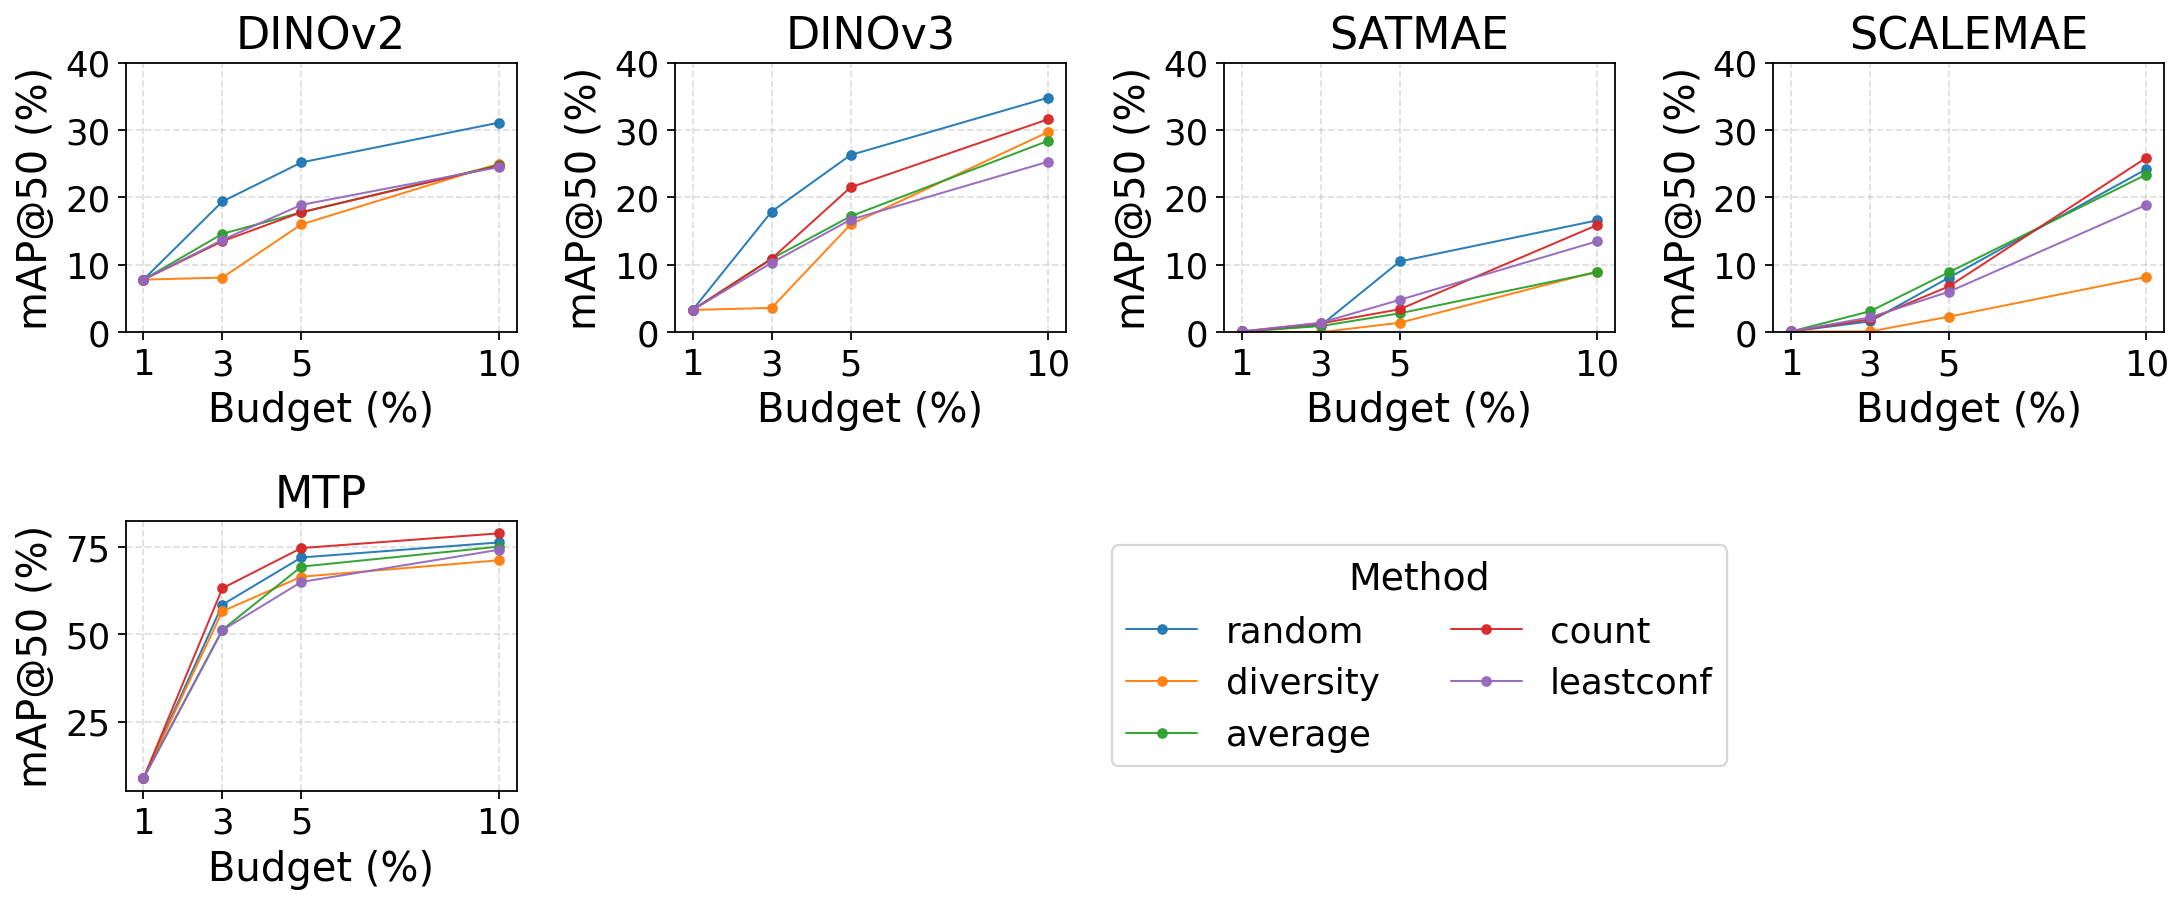

Saved: al_backbones_2x4.pdf al_backbones_2x4.png


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pathlib import Path
import matplotlib.patheffects as pe

def plot_al_2x4_by_backbone_with_ci(
    df: pd.DataFrame,
    output_path="al_backbones_2x4",
    *,
    # columns (values already in %, budgets are "1","3","5","10")
    method_col="method",
    model_col="model_dir",
    backbone_col=None,                       # set if you already have a backbone column
    budget_col="cumulative labeling budget",
    y_col="official_mAP50",
    ci5_col="mAP50_CI_5",
    ci95_col="mAP50_CI_95",
    # ordering
    methods_order=("random","diversity","average","count","leastconf"),
    backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    second_row_backbone="MTP",               # which backbone goes in the 2nd row (left cell)
    budgets_order=("1","3","5","10"),
    # figure/layout
    figsize=(14, 6),
    dpi=160,
    y_lim=(0, 82),
    y_tick_step=10,
    # CI visibility
    ci_threshold_pp=1.0,                     # hide CIs whose half-width < threshold (pp)
    show_small_ci_marker=False,              # hollow square where CI is hidden
    # appearance
    line_kwargs=None,                        # e.g., dict(linewidth=0.9, marker='o', markersize=4)
    whisker_kwargs=None
):
    # helper to infer backbone from model_dir (only used if backbone_col not provided)
    def _infer_backbone(model_dir: str) -> str:
        s = str(model_dir).lower()
        if "scalemae"   in s: return "SCALEMAE"
        if "satmae"     in s: return "SATMAE"
        if "dinov3"     in s: return "DINOv3"
        if "dinolarge"  in s or "dinov2large" in s or "dinol" in s: return "DINOv2 Large"
        if "mtp"        in s: return "MTP"
        return model_dir

    d = df.copy()
    # Backbone labels
    if backbone_col and backbone_col in d.columns:
        d["_backbone"] = d[backbone_col].astype(str)
    else:
        d["_backbone"] = d[model_col].map(_infer_backbone)

    methods   = list(methods_order)
    backbones = list(backbones_order)
    assert second_row_backbone in backbones, "second_row_backbone must be in backbones_order"

    # Arrange which panels go where
    top_row_backbones = [b for b in backbones if b != second_row_backbone]  # 4 backbones
    budgets = list(budgets_order)

    # Figure + GridSpec: 2 rows × 4 cols; legend spans bottom row cols 1..3
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = GridSpec(nrows=2, ncols=4, figure=fig)

    ax_map = {}
    for i, bb in enumerate(top_row_backbones):
        ax_map[bb] = fig.add_subplot(gs[0, i])       # top row

    ax_map[second_row_backbone] = fig.add_subplot(gs[1, 0])  # bottom-left
    legend_ax = fig.add_subplot(gs[1, 1:4])                  # bottom-right (spans 3 columns)
    legend_ax.axis("off")

    # Styles
    if line_kwargs is None:
        line_kwargs = dict(
            linewidth=0.9, marker='o', markersize=4,
            markeredgewidth=0.8, solid_joinstyle='round', solid_capstyle='round',
            alpha=0.95, zorder=2
        )
    if whisker_kwargs is None:
        whisker_kwargs = dict(elinewidth=1.4, capsize=5, capthick=1.4, alpha=0.95, zorder=3)

    # Legend: keep one handle per method
    handles_by_method = {}

    # Plot each backbone panel
    for bb, ax in ax_map.items():
        dbb = d[d["_backbone"] == bb]

        for m in methods:
            dm = dbb[dbb[method_col] == m]

            xs, ys, low_hw, high_hw = [], [], [], []
            for bud in budgets:
                sub = dm[dm[budget_col] == bud]
                if sub.empty:
                    continue
                row = sub.iloc[-1]  # last if multiples
                x   = float(bud)
                y   = float(row[y_col])     # %
                c5  = float(row[ci5_col])   # endpoint
                c95 = float(row[ci95_col])  # endpoint
                xs.append(x); ys.append(y)
                low_hw.append(y - c5)
                high_hw.append(c95 - y)

            if xs:
                xs = np.array(xs); ys = np.array(ys)
                low = np.array(low_hw); high = np.array(high_hw)

                # mean line + dots
                ln, = ax.plot(xs, ys, label=str(m), **line_kwargs)

                # CI whiskers only if >= threshold
                mask = (low >= ci_threshold_pp) | (high >= ci_threshold_pp)
                if mask.any():
                    ax.errorbar(
                        xs[mask], ys[mask],
                        yerr=np.vstack([low[mask], high[mask]]),
                        fmt='none',
                        ecolor=ln.get_color(),
                        **whisker_kwargs
                    )

                # optional small-CI marker
                if show_small_ci_marker:
                    small = ~mask
                    if small.any():
                        ax.scatter(
                            xs[small], ys[small],
                            s=90, marker='s', facecolors='none',
                            edgecolors=ln.get_color(), linewidths=2.0, zorder=6,
                            path_effects=[pe.Stroke(linewidth=4.0, foreground='white'), pe.Normal()]
                        )

                if str(m) not in handles_by_method:
                    handles_by_method[str(m)] = ln
        if bb == "DINOv2 Large":
            bb = "DINOv2"
        ax.set_title(str(bb))
        ax.set_xlabel("Budget (%)")
        ax.set_ylabel("mAP@50 (%)")
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.set_xticks([1,3,5,10])
     
        if y_lim is not None and bb != "MTP":
            ax.set_ylim(*y_lim)
            if y_tick_step:
                ax.set_yticks(np.arange(y_lim[0], y_lim[1] + 1e-9, y_tick_step))

    # Legend in the wide bottom-right area
    labels  = [m for m in methods if m in handles_by_method]
    handles = [handles_by_method[m] for m in labels]
    legend_ax.legend(handles, labels, loc="center", title="Method", frameon=True, ncol=2)
    plt.rcParams.update({
    "font.size": 18,         # base font size
    "axes.titlesize": 20,    # subplot titles
    "axes.labelsize": 18,    # x/y labels
    "xtick.labelsize": 16,   # tick labels
    "ytick.labelsize": 16,
    "legend.fontsize": 16,   # legend text
    "legend.title_fontsize": 17
    })
    fig.tight_layout()
    
    # Save / show (match your preferred behavior)
    output_path = Path(output_path)
    pdf_path = output_path.with_suffix(".pdf")
    png_path = output_path.with_suffix(".png")
    fig.savefig(pdf_path); fig.savefig(png_path)
    plt.show()
    return pdf_path, png_path
pdf_path, png_path = plot_al_2x4_by_backbone_with_ci(
    test3,
    output_path="al_backbones_2x4",
    methods_order=["random","diversity","average","count","leastconf"],
    backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    second_row_backbone="MTP",
    y_lim=(0,40),
    y_tick_step=10,
    ci_threshold_pp=1.0,
    show_small_ci_marker=False
)
print("Saved:", pdf_path, png_path)


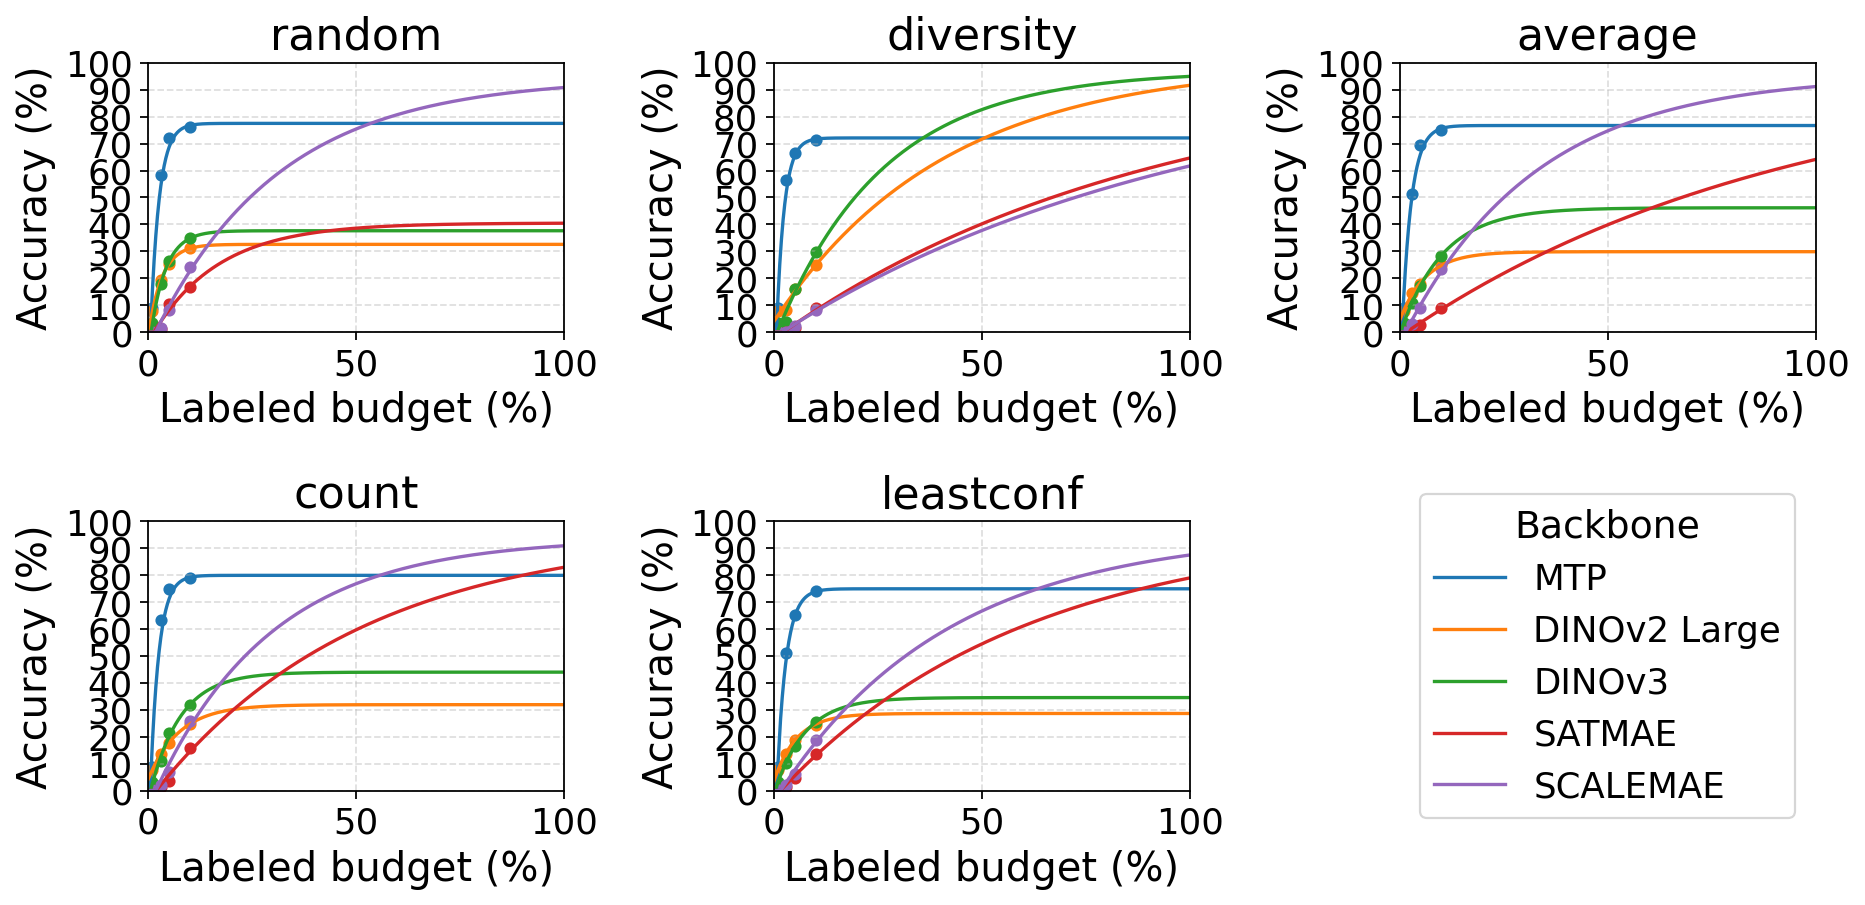

In [16]:
# palm_panels.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pathlib import Path
from scipy.optimize import curve_fit


# --- PALM model ---
def palm_curve(B_prime, Amax, delta, alpha, beta):
    # B_prime is normalized budget index
    # Amax in %, delta in [0,1], alpha >= 0, beta >= 0
    return Amax * (1 - (1 - delta) ** ((B_prime + alpha) ** beta))


# --- tiny backbone inference (use backbone_col if you already have one) ---
def infer_backbone(model_dir: str) -> str:
    s = str(model_dir).lower()
    if "scalemae" in s: return "SCALEMAE"
    if "satmae"  in s: return "SATMAE"
    if "dinov3"  in s: return "DINOv3"
    if "dinolarge" in s or "dinov2large" in s or "dinol" in s: return "DINOv2 Large"
    if "dino"    in s: return "DINOv2"
    if "mtp"     in s: return "MTP"
    return model_dir


# --- helper: fit PALM to observed (percent budgets, accuracies %) and predict over 0..100% ---
import numpy as np
from scipy.optimize import curve_fit

def lce_exp_curve(B_prime, a, b, c):
    return a - b * np.exp(-c * B_prime)

def fit_curve(percent_budgets, accuracies, n_points=400):
    pb = np.array(percent_budgets, dtype=float)
    acc = np.array(accuracies, dtype=float)
    order = np.argsort(pb)
    pb = pb[order]; acc = acc[order]

    diffs = np.diff(np.concatenate([[0.0], pb]))
    mean_diff = np.mean(diffs) if len(diffs) > 0 else 1.0
    Bp_obs = pb / mean_diff

    acc_max = np.nanmax(acc)
    p0 = [acc_max + 2, 10.0, 0.5]  # a, b, c
    bounds = ([0.0, 0.0, 0.01], [100.0, 100.0, 10.0])

    fit_ok = False
    try:
        popt, _ = curve_fit(lce_exp_curve, Bp_obs, acc, p0=p0, bounds=bounds, maxfev=10000)
        fit_ok = True
    except Exception:
        popt = p0

    x_grid_percent = np.linspace(0.0, 100.0, n_points)
    Bp_grid = x_grid_percent / mean_diff
    y_pred = lce_exp_curve(Bp_grid, *popt)
    y_pred = np.clip(y_pred, 0, 100)

    params = dict(a=popt[0], b=popt[1], c=popt[2], fit_ok=fit_ok, model='lce_exponential')
    return x_grid_percent, y_pred, params

# --- generic panel plotter (panel='method' or 'backbone') ---
def plot_palm_2x3_panels(
    df: pd.DataFrame,
    output_path="palm_panels",
    *,
    panel="method",                 # "method" -> 5 method panels; "backbone" -> 5 backbone panels
    method_col="method",
    model_col="model_dir",
    backbone_col=None,              # if you already have a backbone column name
    budget_col="cumulative labeling budget",   # strings "1","3","5","10"
    y_col="official_mAP50",         # accuracy in %
    methods_order=None,
    backbones_order=("MTP","DINOv2","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    budgets_order=("1","3","5","10"),
    figsize=(12, 6),
    dpi=160,
    x_lim=(0, 100),                 # x-axis in percent labeled (0..100)
    y_lim=None,                     # e.g. (0,82) if you want fixed limits
    y_tick_step=None,               # e.g. 10
    show_points=True                # show observed points as markers
):
    d = df.copy()

    # add backbone if needed
    if backbone_col and backbone_col in d.columns:
        d["_backbone"] = d[backbone_col].astype(str)
    else:
        d["_backbone"] = d[model_col].map(infer_backbone)

    # decode budgets (strings) to float percents, and keep only the desired set/order
    budgets = [float(b) for b in budgets_order]

    # choose panel axis and line axis
    if panel.lower() == "method":
        panels = methods_order if methods_order else list(dict.fromkeys(d[method_col].tolist()))
        panels = panels[:5]
        series_values = list(backbones_order)
        panel_col = method_col
        series_col = "_backbone"
        legend_title = "Backbone"
    elif panel.lower() == "backbone":
        panels = list(backbones_order)[:5]
        series_values = methods_order if methods_order else list(dict.fromkeys(d[method_col].tolist()))
        series_col = method_col
        panel_col = "_backbone"
        legend_title = "Method"
    else:
        raise ValueError("panel must be 'method' or 'backbone'")

    # layout: 2x3 grid (last cell for legend)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = GridSpec(nrows=2, ncols=3, figure=fig)
    ax_map = {}
    # 5 plot axes + 1 legend ax
    ax_order = [(0,0),(0,1),(0,2),(1,0),(1,1)]
    for (r,c), p in zip(ax_order, panels):
        ax_map[p] = fig.add_subplot(gs[r,c])
    legend_ax = fig.add_subplot(gs[1,2])
    legend_ax.axis("off")

    # one handle per series for a clean legend
    handles_by_series = {}

    for p in panels:
        ax = ax_map[p]
        subp = d[d[panel_col] == p].copy()
        # For each line (series), fit and plot
        for s in series_values:
            subs = subp[subp[series_col] == s]
            if subs.empty:
                continue

            # collect observed points in the requested budget order
            xs_obs, ys_obs = [], []
            for b in budgets:
                # rows where budget matches (string comparison compatible)
                hit = subs[subs[budget_col].astype(str) == str(int(b))]
                if hit.empty:
                    continue
                row = hit.iloc[-1]  # last if multiple
                xs_obs.append(float(b))
                ys_obs.append(float(row[y_col]))

            if len(xs_obs) < 2:
                # too few points to fit a reasonable curve; just scatter if present
                if xs_obs:
                    sc = ax.plot(xs_obs, ys_obs, marker='o', linestyle='-', label=str(s))
                    if str(s) not in handles_by_series:
                        handles_by_series[str(s)] = sc[0]
                continue
            
            x_grid, y_pred, params = fit_curve(xs_obs, ys_obs, n_points=500)

            # draw fit line
            ln, = ax.plot(x_grid, y_pred, label=str(s))
            # draw observed points on top (optional)
            if show_points:
                ax.scatter(xs_obs, ys_obs, s=20)

            if str(s) not in handles_by_series:
                handles_by_series[str(s)] = ln

        # cosmetics
        ax.set_title(str(p))
        ax.set_xlabel("Labeled budget (%)")
        ax.set_ylabel("Accuracy (%)")
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.set_xlim(*x_lim)
        if y_lim is not None:
            ax.set_ylim(*y_lim)
            if y_tick_step:
                ax.set_yticks(np.arange(y_lim[0], y_lim[1] + 1e-9, y_tick_step))

    # legend (bottom-right)
    labels = [str(s) for s in series_values if s in handles_by_series]
    handles = [handles_by_series[s] for s in labels]
    legend_ax.legend(handles, labels, loc="center", title=legend_title, frameon=True, ncol=1)

    fig.tight_layout()

    # save & show
    output_path = Path(output_path)
    pdf_path = output_path.with_suffix(".pdf")
    png_path = output_path.with_suffix(".png")
    # fig.savefig(pdf_path); fig.savefig(png_path); plt.close(fig)
    plt.show()
    return pdf_path, png_path


# -------------------------
# Example usage:
# -------------------------
# df must contain at least:
#   ["method","model_dir","cumulative labeling budget","official_mAP50"]
#
# By METHOD panels (lines = backbones):
pdf, png = plot_palm_2x3_panels(
     test3,
     panel="method",
     methods_order=["random","diversity","average","count","leastconf"],
     backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
     budgets_order=("1","3","5","10"),
     x_lim=(0,100), y_lim=(0,100), y_tick_step=10
 )
#


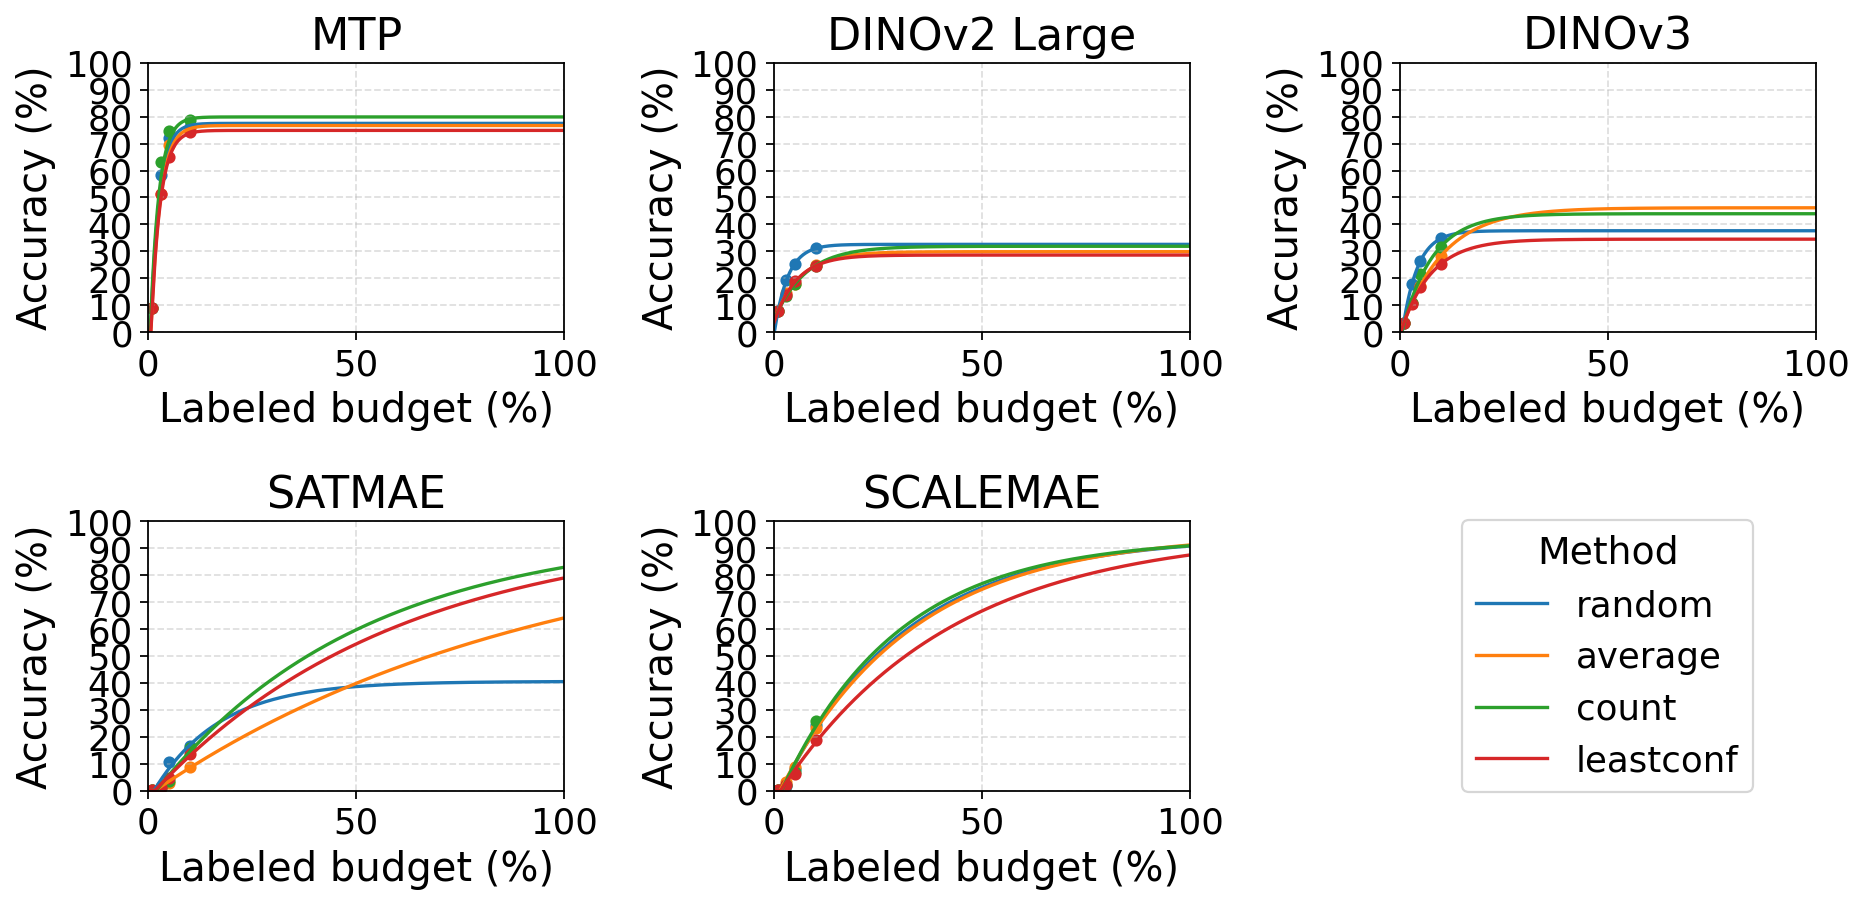

In [17]:
# By BACKBONE panels (lines = methods):
pdf, png = plot_palm_2x3_panels(
    test3,
    panel="backbone",
    methods_order=["random","div_pure","average","count","leastconf"],
    backbones_order=("MTP","DINOv2 Large","DINOv3","SATMAE","SCALEMAE"),
    budgets_order=("1","3","5","10"),
    x_lim=(0,100), y_lim=(0,100), y_tick_step=10
)


('iou_visual.pdf', 'iou_visual.png')

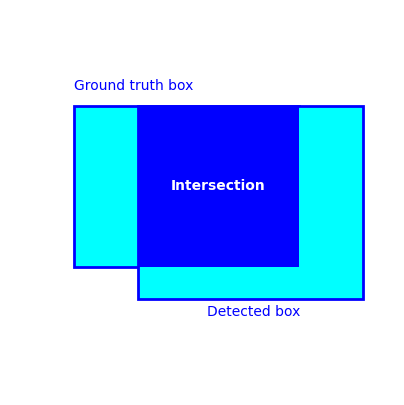

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create figure similar to provided example (visual IoU, no equations)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')

# Ground truth box (blue outline)
gt = Rectangle((1, 2), 3.5, 2.5, linewidth=2, edgecolor='blue', facecolor='cyan')
ax.add_patch(gt)
ax.text(1, 4.7, "Ground truth box", color='blue', fontsize=10, va='bottom')

# Detected box (blue outline, overlap)
det = Rectangle((2, 1.5), 3.5, 3, linewidth=2, edgecolor='blue', facecolor='cyan')
ax.add_patch(det)
ax.text(3.8, 1.4, "Detected box", color='blue', fontsize=10, ha='center', va='top')

# Intersection area (shaded)
inter_x0 = max(1, 2)
inter_y0 = max(2, 1.5)
inter_x1 = min(1+3.5, 2+3.5)
inter_y1 = min(2+2.5, 1.5+3)
ix, iy = inter_x0, inter_y0
iw, ih = inter_x1 - inter_x0, inter_y1 - inter_y0
ax.add_patch(Rectangle((ix, iy), iw, ih, facecolor='blue', alpha=1))
ax.text(ix+iw/2, iy+ih/2, "Intersection", color='white', fontsize=10, ha='center', va='center', fontweight='bold')

# Save
pdf_path = "iou_visual.pdf"
png_path = "iou_visual.png"
fig.savefig(pdf_path, bbox_inches='tight')
fig.savefig(png_path, dpi=300, bbox_inches='tight')
(pdf_path, png_path)

In [19]:
import os
import json
import pandas as pd
import re

def load_all_bootstrap_results_split(base_dir, budget20=False):
    base_models = []
    variant_models = []
    
    for root, dirs, files in os.walk(base_dir):
        
        if "not_reported" in root:
            continue
        for file in files:
            if file == "bootstrap_summary.json":
                file_path = os.path.join(root, file)
                
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    for epoch, metrics in data.items():
                        metrics_flat = {
                            "model_dir": os.path.relpath(root, base_dir),
                            "epoch": int(epoch),
                            **metrics
                        }

                        # Get just the folder name
                        folder_name = os.path.basename(root)
                        if "not_reported" in folder_name:
                            continue
                        # If folder name ends with a digit → it's a variant
                        if re.search(r'_\d+$', folder_name) is None:
                            base_models.append(metrics_flat)
                        else:
                            if "div_pure" in folder_name:
                                metrics_flat["method"] = "diversity"
                            elif "average" in folder_name:
                                metrics_flat["method"] = "average"
                            elif "count" in folder_name:
                                metrics_flat["method"] = "count"
                            elif "leastconf" in folder_name:
                                metrics_flat["method"] = "leastconf"
                            else:
                                metrics_flat["method"] = "random"
                                #print(budget20, folder_name.split("_")[-1])
                            metrics_flat["cumulative labeling budget"] = folder_name.split("_")[-1]
                            if budget20:
                                if metrics_flat["cumulative labeling budget"] == "20":
                                    variant_models.append(metrics_flat)
                            else:
                                if metrics_flat["cumulative labeling budget"] != "20":
                                    variant_models.append(metrics_flat)
    #print(variant_models)
    df_base = pd.DataFrame(base_models)
    df_variant = pd.DataFrame(variant_models)
    return df_base, df_variant


df_base, df_variant = load_all_bootstrap_results_split(base_dir, budget20=True)


In [20]:
test3 = df_variant[["model_dir", "official_mAP", "official_mAP50", "mAP50_CI_5", "mAP50_CI_95","mAP_CI_5", "mAP_CI_95", "method", "cumulative labeling budget"]]
num_cols = test3.select_dtypes(include='number').columns
test3[num_cols] = test3[num_cols].round(3) * 100

test3['map_mean'] = (test3['mAP_CI_5'] + test3['mAP_CI_95'])/2
test3['map_pm'] = (test3['map_mean'] - test3['mAP_CI_5'])
test3['map50_mean']= (test3['mAP50_CI_5'] + test3['mAP50_CI_95'])/2
test3['map50_pm'] = (test3['map50_mean'] - test3['mAP50_CI_5'])
test3

C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\3001492995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3[num_cols] = test3[num_cols].round(3) * 100
C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\3001492995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['map_mean'] = (test3['mAP_CI_5'] + test3['mAP_CI_95'])/2
C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_16992\3001492995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


model_dir  official_mAP  \
0              faster_rcnn_rvsa_l_800_mae_mtp_dior_20          52.0   
1     faster_rcnn_rvsa_l_800_mae_mtp_dior_div_pure_20          51.3   
2   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_averag...          52.6   
3    faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20          53.2   
4   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_leastc...          50.4   
5                                mmdetdino784LowLR_20          15.5   
6                       mmdetdino784LowLR_div_pure_20          13.9   
7                    mmdetdino784LowLR_unc_average_20          14.3   
8                      mmdetdino784LowLR_unc_count_20          13.9   
9                  mmdetdino784LowLR_unc_leastconf_20          13.9   
10                               mmdetdinolarge784_20          16.8   
11                      mmdetdinolarge784_div_pure_20          16.1   
12                   mmdetdinolarge784_unc_average_20          15.6   
13                     mmdetdinolarge784_unc_count_20          15.5   
14                 mmdetdinolarge784_unc_leastconf_20          15.0   
15                                     mmdetdinov3_20          21.6   
16                            mmdetdinov3_div_pure_20          19.2   
17                         mmdetdinov3_unc_average_20          20.9   
18                           mmdetdinov3_unc_count_20          22.4   
19                       mmdetdinov3_unc_leastconf_20          19.3   
20                                     mmdetsatmae_20          15.9   
21                            mmdetsatmae_div_pure_20          13.6   
22                         mmdetsatmae_unc_average_20          16.5   
23                           mmdetsatmae_unc_count_20          17.9   
24                       mmdetsatmae_unc_leastconf_20          14.5   
25                                   mmdetscalemae_20          22.4   
26                          mmdetscalemae_div_pure_20          17.6   
27                       mmdetscalemae_unc_average_20          20.0   
28                         mmdetscalemae_unc_count_20          21.1   
29                     mmdetscalemae_unc_leastconf_20          19.6   

    official_mAP50  mAP50_CI_5  mAP50_CI_95  mAP_CI_5  mAP_CI_95     method  \
0             78.0        77.4         78.8      51.6       52.7     random   
1             77.3        76.9         78.1      51.0       52.0  diversity   
2             79.2        78.7         80.0      52.3       53.3    average   
3             79.2        78.8         80.0      52.9       54.0      count   
4             76.2        75.5         76.9      50.0       51.1  leastconf   
5             34.9        34.3         35.6      15.2       15.8     random   
6             32.5        32.0         33.1      13.6       14.2  diversity   
7             33.2        32.7         33.8      14.1       14.7    average   
8             33.0        32.6         33.7      13.7       14.3      count   
9             33.6        33.1         34.4      13.6       14.3  leastconf   
10            37.0        36.5         37.8      16.5       17.1     random   
11            35.4        34.8         36.1      15.8       16.5  diversity   
12            35.3        34.8         35.9      15.4       16.0    average   
13            35.3        34.8         35.9      15.3       15.9      count   
14            35.4        34.8         36.1      14.7       15.3  leastconf   
15            43.7        43.1         44.5      21.3       22.1     random   
16            40.6        40.0         41.3      18.9       19.6  diversity   
17            43.5        42.9         44.4      20.6       21.4    average   
18            44.2        43.6         44.9      22.0       22.8      count   
19            42.6        42.2         43.4      19.1       19.7  leastconf   
20            35.6        35.0         36.4      15.6       16.2     random   
21            33.2        32.8         34.0      13.4       14.0  diversity   
22            38.4       

In [21]:
test3[["model_dir", "method", "cumulative labeling budget", "map_mean", "map_pm", "map50_mean", "map50_pm"]]

model_dir     method  \
0              faster_rcnn_rvsa_l_800_mae_mtp_dior_20     random   
1     faster_rcnn_rvsa_l_800_mae_mtp_dior_div_pure_20  diversity   
2   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_averag...    average   
3    faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20      count   
4   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_leastc...  leastconf   
5                                mmdetdino784LowLR_20     random   
6                       mmdetdino784LowLR_div_pure_20  diversity   
7                    mmdetdino784LowLR_unc_average_20    average   
8                      mmdetdino784LowLR_unc_count_20      count   
9                  mmdetdino784LowLR_unc_leastconf_20  leastconf   
10                               mmdetdinolarge784_20     random   
11                      mmdetdinolarge784_div_pure_20  diversity   
12                   mmdetdinolarge784_unc_average_20    average   
13                     mmdetdinolarge784_unc_count_20      count   
14                 mmdetdinolarge784_unc_leastconf_20  leastconf   
15                                     mmdetdinov3_20     random   
16                            mmdetdinov3_div_pure_20  diversity   
17                         mmdetdinov3_unc_average_20    average   
18                           mmdetdinov3_unc_count_20      count   
19                       mmdetdinov3_unc_leastconf_20  leastconf   
20                                     mmdetsatmae_20     random   
21                            mmdetsatmae_div_pure_20  diversity   
22                         mmdetsatmae_unc_average_20    average   
23                           mmdetsatmae_unc_count_20      count   
24                       mmdetsatmae_unc_leastconf_20  leastconf   
25                                   mmdetscalemae_20     random   
26                          mmdetscalemae_div_pure_20  diversity   
27                       mmdetscalemae_unc_average_20    average   
28                         mmdetscalemae_unc_count_20      count   
29                     mmdetscalemae_unc_leastconf_20  leastconf   

   cumulative labeling budget  map_mean  map_pm  map50_mean  map50_pm  
0                          20     52.15    0.55       78.10      0.70  
1                          20     51.50    0.50       77.50      0.60  
2                          20     52.80    0.50       79.35      0.65  
3                          20     53.45    0.55       79.40      0.60  
4                          20     50.55    0.55       76.20      0.70  
5                          20     15.50    0.30       34.95      0.65  
6                          20     13.90    0.30       32.55      0.55  
7                          20     14.40    0.30       33.25      0.55  
8                          20     14.00    0.30       33.15      0.55  
9                          20     13.95    0.35       33.75      0.65  
10                         20     16.80    0.30       37.15      0.65  
11                         20     16.15    0.35       35.45      0.65  
12                         20     15.70    0.30       35.35      0.55  
13                         20     15.60    0.30       35.35      0.55  
14                         20     15.00    0.30       35.45      0.65  
15                         20     21.70    0.40       43.80      0.70  
16                         20     19.25    0.35       40.65      0.65  
17                         20     21.00    0.40       43.65      0.75  
18                         20     22.40    0.40       44.25      0.65  
19                         20     19.40    0.30       42.80      0.60  
20                         20     15.90    0.30       35.70      0.70  
21                         20     13.70    0.30       33.40      0.60  
22                         20     16.55    0.35       38.60      0.70  
23                         20     17.95    0.25       38.20      0.60  
24                         20     14.50    0.30       36.05      0.65  
25                         20     22.40    0.40       47.30    

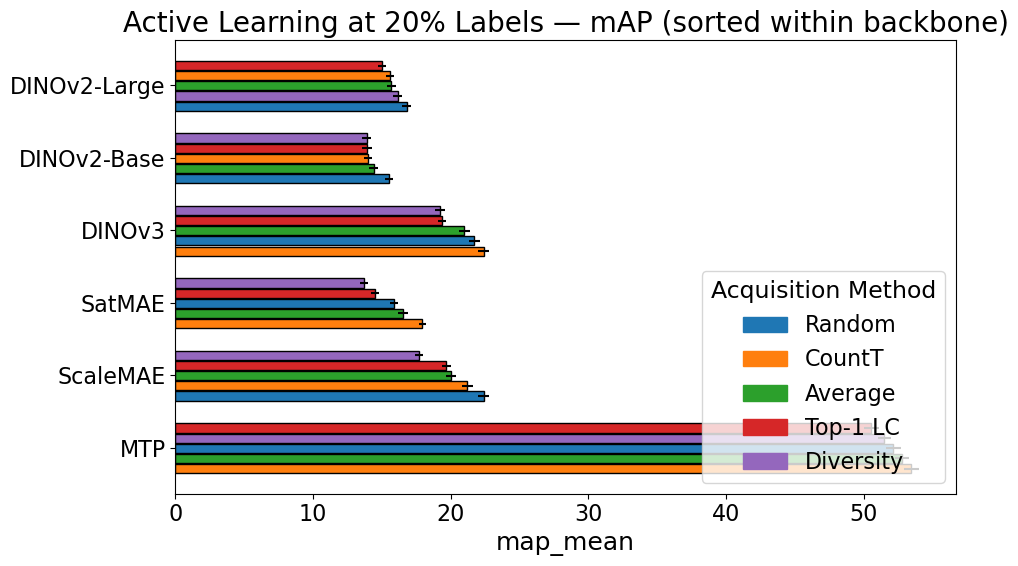

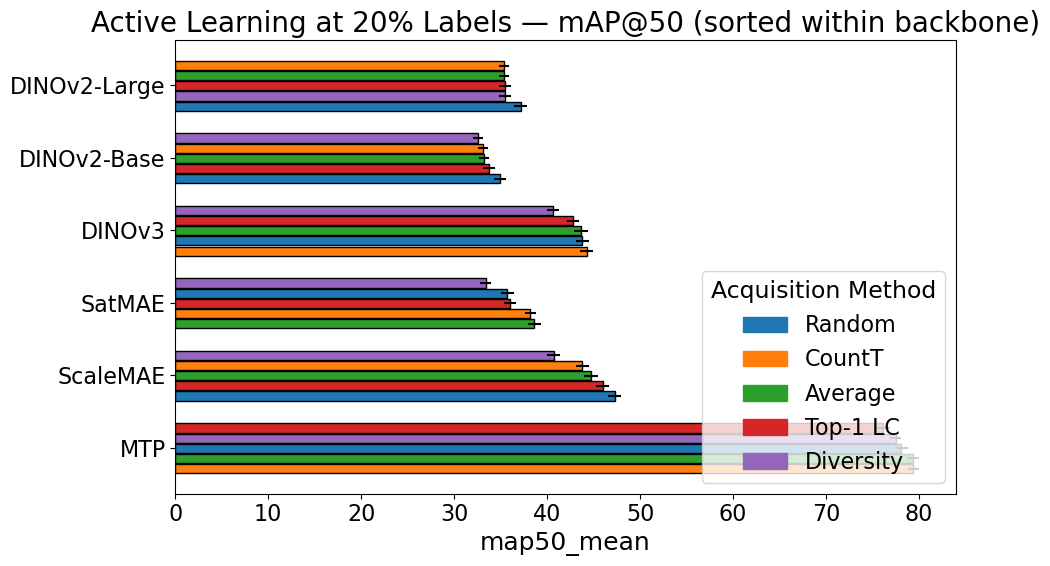

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

# -----------------------------
# 1) Prepare your DataFrame df
# -----------------------------
# If you already have `df`, skip this block and keep only the preprocessing and plotting.
# Example: construct df directly from your pasted rows (optional).
# df = pd.DataFrame([...])

# -----------------------------
# 2) Map model_dir -> Backbone
# -----------------------------
def map_backbone(model_dir: str) -> str:
    s = model_dir.lower()
    if s.startswith("faster_rcnn_rvsa_l_800_mae_mtp_dior"):
        return "MTP"
    if s.startswith("mmdetscalemae"):
        return "ScaleMAE"
    if s.startswith("mmdetsatmae"):
        return "SatMAE"
    if s.startswith("mmdetdinov3"):
        return "DINOv3"
    if s.startswith("mmdetdino784"):
        return "DINOv2-Base"
    if s.startswith("mmdetdinolarge784"):
        return "DINOv2-Large"
    # fallback
    return model_dir

df = test3.copy()
df["Backbone"] = df["model_dir"].apply(map_backbone)

# Normalize method names for cleaner labels
method_map = {
    "random": "Random",
    "count": "CountT",
    "average": "Average",
    "leastconf": "Top-1 LC",
    "diversity": "Diversity",
}
df["Method"] = df["method"].map(method_map).fillna(df["method"])

# Enforce desired method order
method_order = ["Random", "CountT", "Average", "Top-1 LC", "Diversity"]
df["Method"] = pd.Categorical(df["Method"], categories=method_order, ordered=True)

# Backbone order (you can adjust if you prefer another order)
backbone_order = ["MTP", "ScaleMAE", "SatMAE", "DINOv3", "DINOv2-Base", "DINOv2-Large"]
df["Backbone"] = pd.Categorical(df["Backbone"], categories=backbone_order, ordered=True)

# Keep only budget=20 rows (in case df has other budgets)
df20 = df[df["cumulative labeling budget"] == "20"].copy()

# -----------------------------------
# 3) Helper to plot one horizontal chart
# -----------------------------------
def plot_barh_with_error(df_plot, value_col, err_col, title, outfile_base):
    """
    df_plot: rows for budget=20, with columns Backbone, Method, value_col, err_col
    value_col: 'map_mean' or 'map50_mean'
    err_col:   'map_pm' or 'map50_pm'
    """
    # Sort by backbone then method order
    df_plot = df_plot.sort_values(["Backbone", "Method"])

    backbones = df_plot["Backbone"].cat.categories.tolist()
    methods = [m for m in method_order if m in df_plot["Method"].cat.categories.tolist()]
    n_backbones = len(backbones)
    n_methods = len(methods)

    # y positions: one "block" per backbone; within each block, offset for each method
    block_height = 1.0
    gap = 0.3  # gap between backbones
    bar_height = (block_height - gap) / max(n_methods, 1)

    y_positions = []
    labels = []
    xs = []
    xerrs = []
    method_indices = []
    for b_idx, b in enumerate(backbones):
        base_y = b_idx * block_height
        # rows for this backbone
        sub = df_plot[df_plot["Backbone"] == b]
        for m_idx, m in enumerate(methods):
            row = sub[sub["Method"] == m]
            if row.empty:
                # If a method/backbone is missing, skip it (keeps plot robust)
                continue
            y = base_y + m_idx * bar_height
            y_positions.append(y)
            labels.append(b if m_idx == 0 else "")  # show backbone label only once per block
            xs.append(float(row[value_col].values[0]))
            xerrs.append(float(row[err_col].values[0]))
            method_indices.append(m_idx)

    # Convert to arrays
    y_positions = np.array(y_positions)
    xs = np.array(xs)
    xerrs = np.array(xerrs)
    method_indices = np.array(method_indices)

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars per method (so we can get automatic color cycle and a legend)
    bars_for_legend = []
    for m_idx, m in enumerate(methods):
        mask = (method_indices == m_idx)
        # barh with error bars
        bar = ax.barh(
            y_positions[mask],
            xs[mask],
            height=bar_height * 0.9,
            xerr=xerrs[mask],
            align="edge",  # align to left edge of each slot
            label=m,
        )
        # capture one handle for legend
        bars_for_legend.append(bar)

    # Y-ticks at the middle of each backbone block (label once)
    yticks = []
    yticklabels = []
    for b_idx, b in enumerate(backbones):
        sub_mask = (df_plot["Backbone"] == b)
        # middle of this block:
        y0 = b_idx * block_height
        ymid = y0 + (n_methods * bar_height) / 2.0 - (bar_height * 0.05)
        yticks.append(ymid)
        yticklabels.append("\n".join(wrap(b, width=16)))

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

    # Labels / title
    if value_col == "map_mean":
        ax.set_xlabel("mAP (mean ± 95% CI half-width)")
    else:
        ax.set_xlabel("mAP@50 (mean ± 95% CI half-width)")

    ax.set_title(title)

    # Legend (one entry per method)
    ax.legend(title="Acquisition Method", loc="upper right")

    # Layout and save
    plt.tight_layout()
    fig.savefig(f"{outfile_base}.pdf", bbox_inches="tight")
    fig.savefig(f"{outfile_base}.png", dpi=300, bbox_inches="tight")
    plt.show()

def plot_barh_sorted(df_plot, value_col, err_col, title, outfile_base):
    """
    Plot horizontal bar chart where within each backbone, methods are sorted by value_col.
    """
    backbones = df_plot["Backbone"].cat.categories.tolist()
    n_backbones = len(backbones)

    y_positions = []
    xs = []
    xerrs = []
    labels = []
    method_labels = []
    
    # spacing setup
    block_height = 1.0
    gap = 0.3
    bar_height = (block_height - gap) / df_plot["Method"].nunique()

    for b_idx, b in enumerate(backbones):
        base_y = b_idx * block_height
        sub = df_plot[df_plot["Backbone"] == b].sort_values(value_col, ascending=False)
        
        for m_idx, row in enumerate(sub.itertuples()):
            y = base_y + m_idx * bar_height
            y_positions.append(y)
            xs.append(getattr(row, value_col))
            xerrs.append(getattr(row, err_col))
            labels.append(b if m_idx == 0 else "")
            method_labels.append(row.Method)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_positions = np.array(y_positions)
    xs = np.array(xs)
    xerrs = np.array(xerrs)

    # Assign colors per method consistently
    methods = df_plot["Method"].cat.categories.tolist()
    color_map = {m: c for m, c in zip(methods, plt.cm.tab10.colors)}
    bar_colors = [color_map[m] for m in method_labels]

    ax.barh(y_positions, xs, xerr=xerrs, height=bar_height*0.9,
            align="edge", color=bar_colors, edgecolor="black")

    # y-ticks at group centers
    yticks = []
    yticklabels = []
    for b_idx, b in enumerate(backbones):
        y0 = b_idx * block_height
        ymid = y0 + (len(df_plot["Method"].cat.categories)*bar_height)/2.0
        yticks.append(ymid)
        yticklabels.append(b)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

    ax.set_xlabel(value_col)
    ax.set_title(title)

    # Legend
    handles = [plt.Rectangle((0,0),1,1,color=color_map[m]) for m in methods]
    ax.legend(handles, methods, title="Acquisition Method", loc="lower right")

    plt.tight_layout()
    fig.savefig(f"{outfile_base}.pdf", bbox_inches="tight")
    fig.savefig(f"{outfile_base}.png", dpi=300, bbox_inches="tight")
    plt.show()

# -----------------------------
# 4) Make the two figures
# -----------------------------

plot_barh_sorted(
    df_plot=df20,
    value_col="map_mean",
    err_col="map_pm",
    title="Active Learning at 20% Labels — mAP (sorted within backbone)",
    outfile_base="al20_map_sorted"
)

plot_barh_sorted(
    df_plot=df20,
    value_col="map50_mean",
    err_col="map50_pm",
    title="Active Learning at 20% Labels — mAP@50 (sorted within backbone)",
    outfile_base="al20_map50_sorted"
)

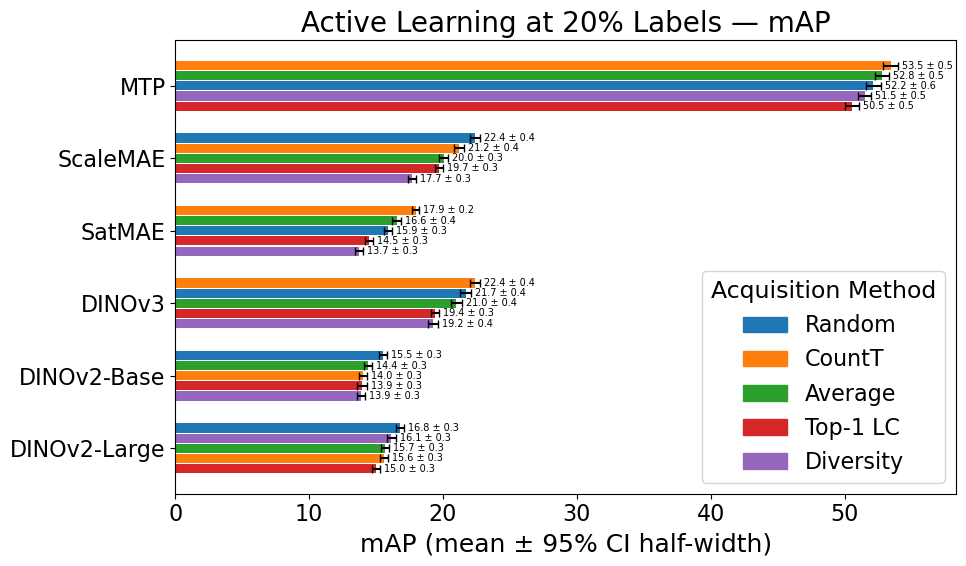

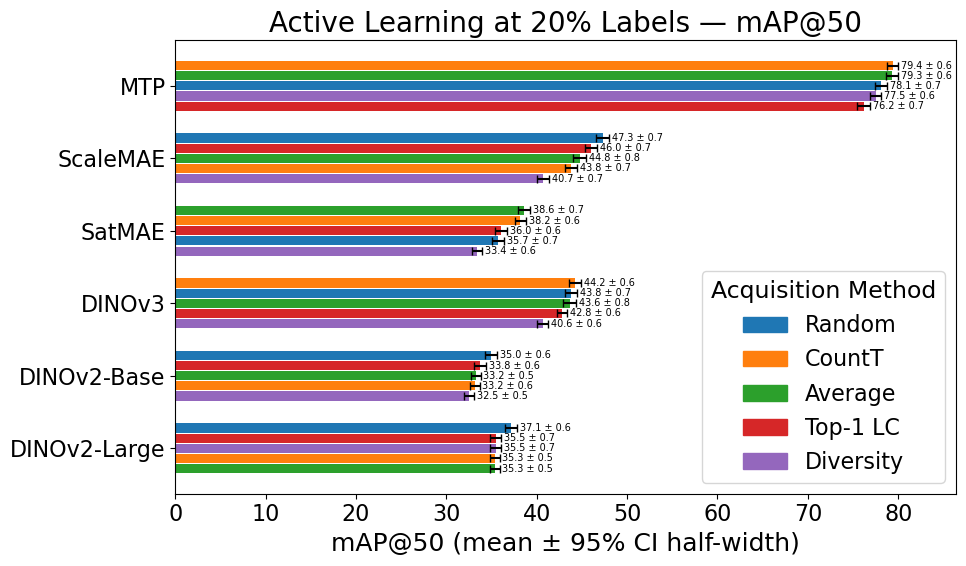

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_barh_sorted_pretty(df_plot, value_col, err_col, title, outfile_base):
    """
    Horizontal grouped bars; within each backbone the methods are sorted ASCENDING by value_col.
    Adds 'value ± err' labels. No bar borders.
    """
    # categories (order preserved from your Categorical columns)
    backbones = df_plot["Backbone"].cat.categories.tolist()
    methods_all = df_plot["Method"].cat.categories.tolist()

    # layout
    block_height = 1.0
    gap = 0.3
    n_methods_max = df_plot.groupby("Backbone")["Method"].nunique().max()
    bar_height = (block_height - gap) / max(n_methods_max, 1)

    y_positions = []
    xs = []
    xerrs = []
    group_labels = []
    method_labels = []

    # build rows, sorting ASC within each backbone
    for b_idx, b in enumerate(backbones[::-1]):
        base_y = b_idx * block_height
        sub = df_plot[df_plot["Backbone"] == b].sort_values(value_col, ascending=True)
        for m_idx, row in enumerate(sub.itertuples()):
            y = base_y + m_idx * bar_height
            y_positions.append(y)
            xs.append(getattr(row, value_col))
            xerrs.append(getattr(row, err_col))
            group_labels.append(b if m_idx == 0 else "")
            method_labels.append(row.Method)

    y_positions = np.array(y_positions, dtype=float)
    xs = np.array(xs, dtype=float)
    xerrs = np.array(xerrs, dtype=float)

    # consistent colors per method (tab10 cycle)
    cmap = plt.cm.get_cmap("tab10")
    color_map = {m: cmap(i % 10) for i, m in enumerate(methods_all)}
    colors = [color_map[m] for m in method_labels]

    fig, ax = plt.subplots(figsize=(10, 6))

    # bars (no borders)
    ax.barh(
        y_positions, xs,
        xerr=xerrs,
        height=bar_height * 0.9,
        align="edge",
        color=colors,
        ecolor="black",    # errorbar color only
        capsize=3,
        linewidth=0,
    )

    # center y-ticks for each backbone block
    yticks, yticklabels = [], []
    for b_idx, b in enumerate(backbones[::-1]):
        y0 = b_idx * block_height
        # how many methods actually plotted for this backbone:
        n_this = df_plot[df_plot["Backbone"] == b]["Method"].nunique()
        ymid = y0 + (n_this * bar_height) / 2.0 - (bar_height * 0.05)
        yticks.append(ymid)
        yticklabels.append(b)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

    # labels
    ax.set_title(title)
    if value_col == "map_mean":
        ax.set_xlabel("mAP (mean ± 95% CI half-width)")
    else:
        ax.set_xlabel("mAP@50 (mean ± 95% CI half-width)")

    # annotate value ± err at bar end
    # place a little to the right of (x + err)
    x_max = (xs + xerrs).max() if len(xs) else 1.0
    ax.set_xlim(0, x_max * 1.08)  # small right margin for text
    for x, xe, y in zip(xs, xerrs, y_positions):
        txt = f"{x:.1f} ± {xe:.1f}"
        ax.text(x + xe + 0.3, y + (bar_height * 0.45), txt, va="center", fontsize=7)

    # legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[m]) for m in methods_all]
    ax.legend(handles, methods_all, title="Acquisition Method", loc="lower right")

    plt.tight_layout()
    fig.savefig(f"{outfile_base}.pdf", bbox_inches="tight")
    fig.savefig(f"{outfile_base}.png", dpi=300, bbox_inches="tight")
    plt.show()
plot_barh_sorted_pretty(
    df_plot=df20,
    value_col="map_mean",
    err_col="map_pm",
    title="Active Learning at 20% Labels — mAP",
    outfile_base="al20_map_sorted_pretty",
)

plot_barh_sorted_pretty(
    df_plot=df20,
    value_col="map50_mean",
    
    err_col="map50_pm",
    title="Active Learning at 20% Labels — mAP@50",
    outfile_base="al20_map50_sorted_pretty",
)


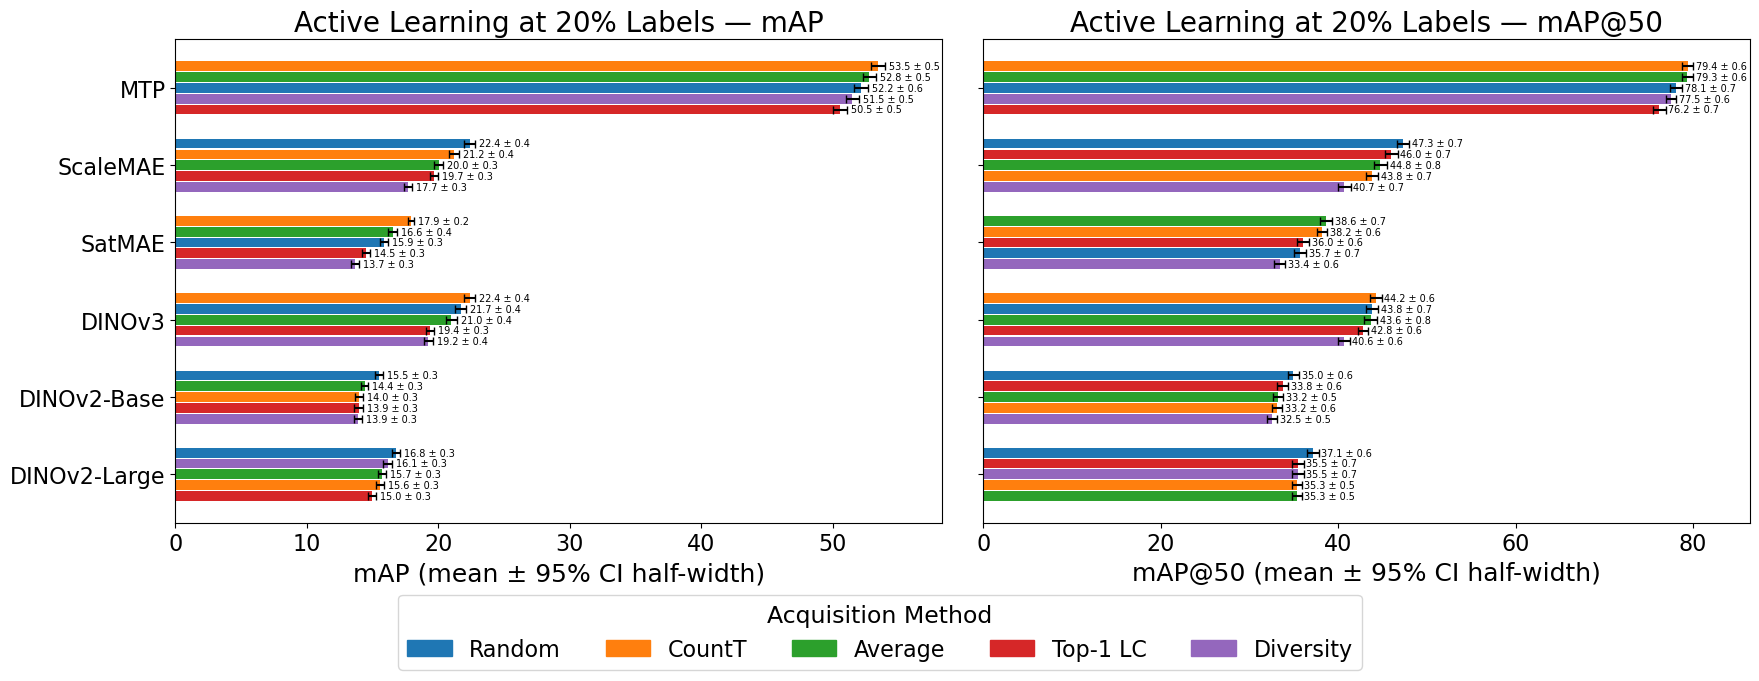

In [24]:
import numpy as np
import matplotlib.pyplot as plt
#plot_barh_sorted_pretty(
#    df_plot=df20,
#    value_col="map_mean",
#    err_col="map_pm",
#    title="Active Learning at 20% Labels — mAP",
#    outfile_base="al20_map_sorted_pretty",
#)
#
#plot_barh_sorted_pretty(
#    df_plot=df20,
#    value_col="map50_mean",
#    
#    err_col="map50_pm",
#    title="Active Learning at 20% Labels — mAP@50",
#    outfile_base="al20_map50_sorted_pretty",
#)

#def plot_barh_sorted_pretty(df_plot, value_col, err_col, title, outfile_base):
"""
Horizontal grouped bars; within each backbone the methods are sorted ASCENDING by value_col.
Adds 'value ± err' labels. No bar borders.
"""
df_plot=df20
args = [(0,"map_mean","map_pm","Active Learning at 20% Labels — mAP","al20_map_sorted_pretty"),(1,"map50_mean","map50_pm","Active Learning at 20% Labels — mAP@50","al20_map50_sorted_pretty")]
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

for i, value_col, err_col, title, outfile_base in args:
    # categories (order preserved from your Categorical columns)
    backbones = df_plot["Backbone"].cat.categories.tolist()
    methods_all = df_plot["Method"].cat.categories.tolist()

    # layout
    block_height = 1.0
    gap = 0.3
    n_methods_max = df_plot.groupby("Backbone")["Method"].nunique().max()
    bar_height = (block_height - gap) / max(n_methods_max, 1)

    y_positions = []
    xs = []
    xerrs = []
    group_labels = []
    method_labels = []

    # build rows, sorting ASC within each backbone
    for b_idx, b in enumerate(backbones[::-1]):
        base_y = b_idx * block_height
        sub = df_plot[df_plot["Backbone"] == b].sort_values(value_col, ascending=True)
        for m_idx, row in enumerate(sub.itertuples()):
            y = base_y + m_idx * bar_height
            y_positions.append(y)
            xs.append(getattr(row, value_col))
            xerrs.append(getattr(row, err_col))
            group_labels.append(b if m_idx == 0 else "")
            method_labels.append(row.Method)

    y_positions = np.array(y_positions, dtype=float)
    xs = np.array(xs, dtype=float)
    xerrs = np.array(xerrs, dtype=float)

    # consistent colors per method (tab10 cycle)
    cmap = plt.cm.get_cmap("tab10")
    color_map = {m: cmap(i % 10) for i, m in enumerate(methods_all)}
    colors = [color_map[m] for m in method_labels]

    

    # bars (no borders)
    axes[i].barh(
        y_positions, xs,
        xerr=xerrs,
        height=bar_height * 0.9,
        align="edge",
        color=colors,
        ecolor="black",    # errorbar color only
        capsize=3,
        linewidth=0,
    )

    # center y-ticks for each backbone block
    yticks, yticklabels = [], []
    for b_idx, b in enumerate(backbones[::-1]):
        y0 = b_idx * block_height
        # how many methods actually plotted for this backbone:
        n_this = df_plot[df_plot["Backbone"] == b]["Method"].nunique()
        ymid = y0 + (n_this * bar_height) / 2.0 - (bar_height * 0.05)
        yticks.append(ymid)
        yticklabels.append(b)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels(yticklabels)

    # labels
    axes[i].set_title(title)
    if value_col == "map_mean":
        axes[i].set_xlabel("mAP (mean ± 95% CI half-width)")
    else:
        axes[i].set_xlabel("mAP@50 (mean ± 95% CI half-width)")

    # annotate value ± err at bar end
    # place a little to the right of (x + err)
    x_max = (xs + xerrs).max() if len(xs) else 1.0
    axes[i].set_xlim(0, x_max * 1.08)  # small right margin for text
    for x, xe, y in zip(xs, xerrs, y_positions):
        txt = f"{x:.1f} ± {xe:.1f}"
        axes[i].text(x + xe + 0.3, y + (bar_height * 0.45), txt, va="center", fontsize=7)

# legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[m]) for m in methods_all]
fig.legend(handles, methods_all, title="Acquisition Method", loc="lower center", ncol=len(methods_all))

plt.rcParams.update({
"font.size": 18,         # base font size
"axes.titlesize": 14,    # subplot titles
"axes.labelsize": 14,    # x/y labels
"xtick.labelsize": 24,   # tick labels
"ytick.labelsize": 16,
"legend.fontsize": 16,   # legend text
"legend.title_fontsize": 17
})
plt.tight_layout(rect=[0, 0.10, 1, 1])
fig.savefig(f"{outfile_base}.pdf", bbox_inches="tight")
fig.savefig(f"{outfile_base}.png", dpi=300, bbox_inches="tight")


plt.show()


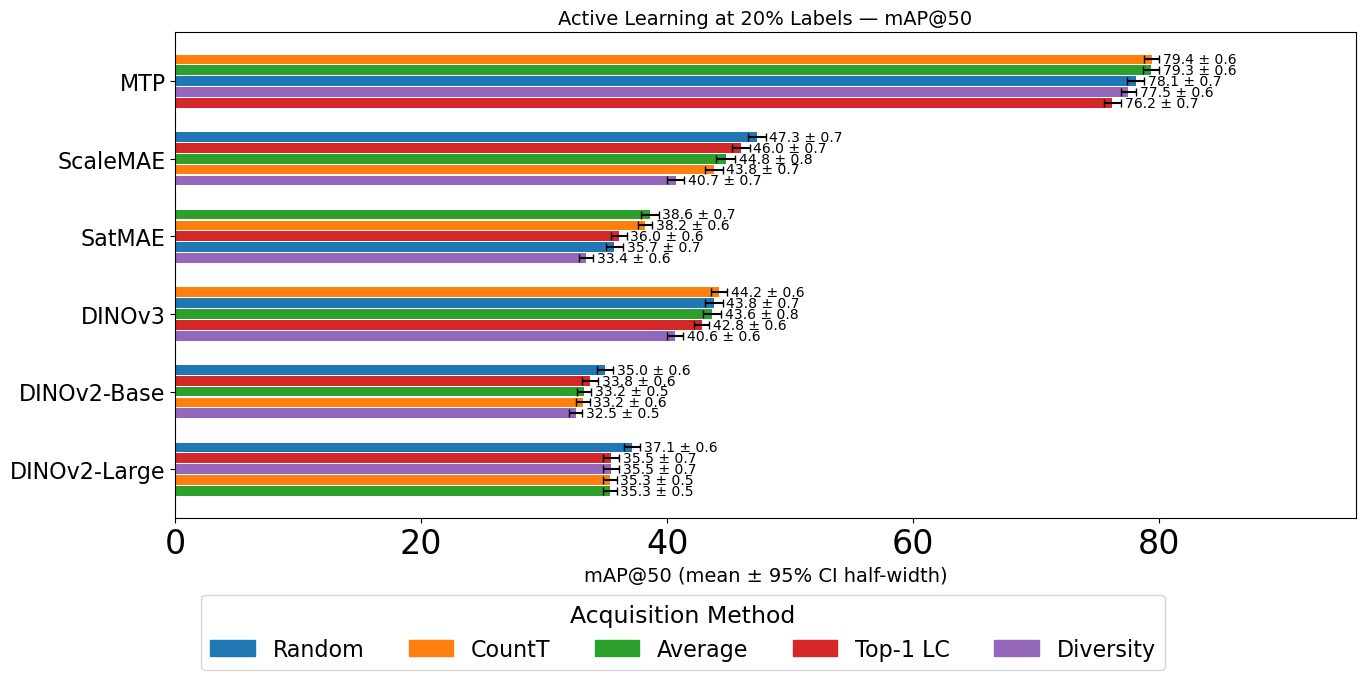

In [56]:
# pick only the "index 1" case
value_col, err_col, title, outfile_base = (
    "map50_mean",
    "map50_pm",
    "Active Learning at 20% Labels — mAP@50",
    "al20_map50_sorted_pretty",
)

fig, ax = plt.subplots(figsize=(14, 7))  # single axis

# categories
backbones = df_plot["Backbone"].cat.categories.tolist()
methods_all = df_plot["Method"].cat.categories.tolist()

# layout
block_height = 1.0
gap = 0.3
n_methods_max = df_plot.groupby("Backbone")["Method"].nunique().max()
bar_height = (block_height - gap) / max(n_methods_max, 1)

y_positions, xs, xerrs, group_labels, method_labels = [], [], [], [], []

# build rows, sorting ASC within each backbone
for b_idx, b in enumerate(backbones[::-1]):
    base_y = b_idx * block_height
    sub = df_plot[df_plot["Backbone"] == b].sort_values(value_col, ascending=True)
    for m_idx, row in enumerate(sub.itertuples()):
        y = base_y + m_idx * bar_height
        y_positions.append(y)
        xs.append(getattr(row, value_col))
        xerrs.append(getattr(row, err_col))
        group_labels.append(b if m_idx == 0 else "")
        method_labels.append(row.Method)

y_positions = np.array(y_positions, dtype=float)
xs = np.array(xs, dtype=float)
xerrs = np.array(xerrs, dtype=float)

# consistent colors per method
cmap = plt.cm.get_cmap("tab10")
color_map = {m: cmap(i % 10) for i, m in enumerate(methods_all)}
colors = [color_map[m] for m in method_labels]

# bars
ax.barh(
    y_positions, xs,
    xerr=xerrs,
    height=bar_height * 0.9,
    align="edge",
    color=colors,
    ecolor="black",
    capsize=3,
    linewidth=0,
)

# center y-ticks
yticks, yticklabels = [], []
for b_idx, b in enumerate(backbones[::-1]):
    y0 = b_idx * block_height
    n_this = df_plot[df_plot["Backbone"] == b]["Method"].nunique()
    ymid = y0 + (n_this * bar_height) / 2.0 - (bar_height * 0.05)
    yticks.append(ymid)
    yticklabels.append(b)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# labels
ax.set_title(title)
ax.set_xlabel("mAP@50 (mean ± 95% CI half-width)")

# annotate bars
x_max = (xs + xerrs).max() if len(xs) else 1.0
ax.set_xlim(0, x_max * 1.2)
for x, xe, y in zip(xs, xerrs, y_positions):
    txt = f"{x:.1f} ± {xe:.1f}"
    ax.text(x + xe + 0.3, y + (bar_height * 0.45), txt, va="center", fontsize=10)

# legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[m]) for m in methods_all]
fig.legend(handles, methods_all, title="Acquisition Method", loc="lower center", ncol=len(methods_all))

# style
plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 24,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "legend.title_fontsize": 17,
})
plt.tight_layout(rect=[0, 0.10, 1, 1])

# save
fig.savefig(f"{outfile_base}.pdf", bbox_inches="tight")
fig.savefig(f"{outfile_base}.png", dpi=300, bbox_inches="tight")

plt.show()


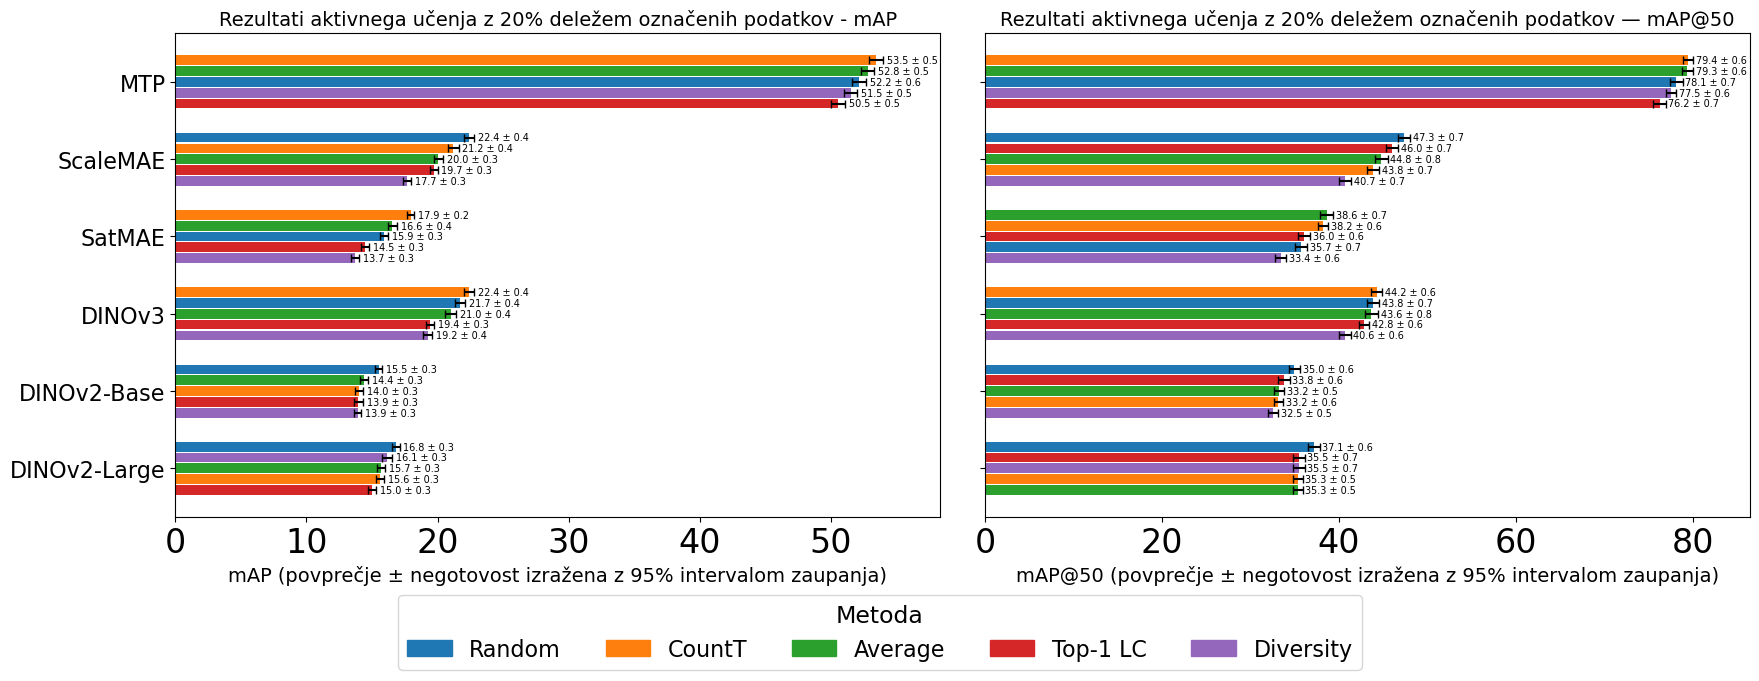

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#plot_barh_sorted_pretty(
#    df_plot=df20,
#    value_col="map_mean",
#    err_col="map_pm",
#    title="Active Learning at 20% Labels — mAP",
#    outfile_base="al20_map_sorted_pretty",
#)
#
#plot_barh_sorted_pretty(
#    df_plot=df20,
#    value_col="map50_mean",
#    
#    err_col="map50_pm",
#    title="Active Learning at 20% Labels — mAP@50",
#    outfile_base="al20_map50_sorted_pretty",
#)

#def plot_barh_sorted_pretty(df_plot, value_col, err_col, title, outfile_base):
"""
Horizontal grouped bars; within each backbone the methods are sorted ASCENDING by value_col.
Adds 'value ± err' labels. No bar borders.
"""
df_plot=df20
args = [(0,"map_mean","map_pm","Rezultati aktivnega učenja z 20% deležem označenih podatkov - mAP","al20_map_sorted_pretty"),(1,"map50_mean","map50_pm","Rezultati aktivnega učenja z 20% deležem označenih podatkov — mAP@50","al20_map50_sorted_pretty")]
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
plt.rcParams.update({
"font.size": 18,         # base font size
"axes.titlesize": 14,    # subplot titles
"axes.labelsize": 12,    # x/y labels
"xtick.labelsize": 16,   # tick labels
"ytick.labelsize": 16,
"legend.fontsize": 16,   # legend text
"legend.title_fontsize": 17
})
for i, value_col, err_col, title, outfile_base in args:
    # categories (order preserved from your Categorical columns)
    backbones = df_plot["Backbone"].cat.categories.tolist()
    methods_all = df_plot["Method"].cat.categories.tolist()

    # layout
    block_height = 1.0
    gap = 0.3
    n_methods_max = df_plot.groupby("Backbone")["Method"].nunique().max()
    bar_height = (block_height - gap) / max(n_methods_max, 1)

    y_positions = []
    xs = []
    xerrs = []
    group_labels = []
    method_labels = []

    # build rows, sorting ASC within each backbone
    for b_idx, b in enumerate(backbones[::-1]):
        base_y = b_idx * block_height
        sub = df_plot[df_plot["Backbone"] == b].sort_values(value_col, ascending=True)
        for m_idx, row in enumerate(sub.itertuples()):
            y = base_y + m_idx * bar_height
            y_positions.append(y)
            xs.append(getattr(row, value_col))
            xerrs.append(getattr(row, err_col))
            group_labels.append(b if m_idx == 0 else "")
            method_labels.append(row.Method)

    y_positions = np.array(y_positions, dtype=float)
    xs = np.array(xs, dtype=float)
    xerrs = np.array(xerrs, dtype=float)

    # consistent colors per method (tab10 cycle)
    cmap = plt.cm.get_cmap("tab10")
    color_map = {m: cmap(i % 10) for i, m in enumerate(methods_all)}
    colors = [color_map[m] for m in method_labels]

    

    # bars (no borders)
    axes[i].barh(
        y_positions, xs,
        xerr=xerrs,
        height=bar_height * 0.9,
        align="edge",
        color=colors,
        ecolor="black",    # errorbar color only
        capsize=3,
        linewidth=0,
    )

    # center y-ticks for each backbone block
    yticks, yticklabels = [], []
    for b_idx, b in enumerate(backbones[::-1]):
        y0 = b_idx * block_height
        # how many methods actually plotted for this backbone:
        n_this = df_plot[df_plot["Backbone"] == b]["Method"].nunique()
        ymid = y0 + (n_this * bar_height) / 2.0 - (bar_height * 0.05)
        yticks.append(ymid)
        yticklabels.append(b)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels(yticklabels)

    # labels
    axes[i].set_title(title)
    if value_col == "map_mean":
        axes[i].set_xlabel("mAP (povprečje ± negotovost izražena z 95% intervalom zaupanja)")
    else:
        axes[i].set_xlabel("mAP@50 (povprečje ± negotovost izražena z 95% intervalom zaupanja)")

    # annotate value ± err at bar end
    # place a little to the right of (x + err)
    x_max = (xs + xerrs).max() if len(xs) else 1.0
    axes[i].set_xlim(0, x_max * 1.08)  # small right margin for text
    for x, xe, y in zip(xs, xerrs, y_positions):
        txt = f"{x:.1f} ± {xe:.1f}"
        axes[i].text(x + xe + 0.3, y + (bar_height * 0.45), txt, va="center", fontsize=7)

# legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[m]) for m in methods_all]
fig.legend(handles, methods_all, title="Metoda", loc="lower center", ncol=len(methods_all))
plt.rcParams.update({
"font.size": 18,         # base font size
"axes.titlesize": 14,    # subplot titles
"axes.labelsize": 14,    # x/y labels
"xtick.labelsize": 24,   # tick labels
"ytick.labelsize": 16,
"legend.fontsize": 16,   # legend text
"legend.title_fontsize": 17
})
plt.tight_layout(rect=[0, 0.10, 1, 1])
fig.savefig(f"{outfile_base}_slo.pdf", bbox_inches="tight")
fig.savefig(f"{outfile_base}_slo.png", dpi=300, bbox_inches="tight")


plt.show()


In [26]:
import os
import json
import re
import pandas as pd

def load_class_bootstrap_results_split(base_dir, budget20=False):
    base_models = []
    variant_models = []

    for root, dirs, files in os.walk(base_dir):
        if "not_reported" in root:
            continue

        if "bootstrap_class_summary.json" not in files:
            continue

        file_path = os.path.join(root, "bootstrap_class_summary.json")
        with open(file_path, "r") as f:
            data = json.load(f)  # {epoch: {class_id: {metrics...}}}

        folder_name = os.path.basename(root)
        if "not_reported" in folder_name:
            continue

        is_variant = re.search(r'_\d+$', folder_name) is not None

        # method tag for variants (same mapping as before)
        def _method_from_name(name):
            if "div_pure" in name:
                return "diversity"
            if "average" in name:
                return "average"
            if "count" in name:
                return "count"
            if "leastconf" in name:
                return "leastconf"
            return "random"

        for epoch, classes in data.items():
            epoch_int = int(epoch)
            for cid_str, metrics in classes.items():
                row = {
                    "model_dir": os.path.relpath(root, base_dir),
                    "epoch": epoch_int,
                    "class_id": int(cid_str),
                    "class_name": metrics.get("name", cid_str),
                }
                # include all numeric/list fields (keep arrays if present)
                row.update({k: v for k, v in metrics.items() if k != "name"})

                if not is_variant:
                    base_models.append(row)
                else:
                    row["method"] = _method_from_name(folder_name)
                    row["cumulative labeling budget"] = folder_name.split("_")[-1]
                    if budget20:
                        if row["cumulative labeling budget"] == "20":
                            variant_models.append(row)
                    else:
                        if row["cumulative labeling budget"] != "20":
                            variant_models.append(row)

    df_base = pd.DataFrame(base_models)
    df_variant = pd.DataFrame(variant_models)
    return df_base, df_variant

# Example usage:
df_base_cls, df_variant_cls = load_class_bootstrap_results_split(base_dir)
df_base_cls

model_dir  epoch  class_id       class_name  \
0    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         0         airplane   
1    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         1          airport   
2    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         2    baseballfield   
3    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         3  basketballcourt   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         4           bridge   
..                                   ...    ...       ...              ...   
115                        mmdetscalemae     12        15      storagetank   
116                        mmdetscalemae     12        16      tenniscourt   
117                        mmdetscalemae     12        17     trainstation   
118                        mmdetscalemae     12        18          vehicle   
119                        mmdetscalemae     12        19         windmill   

           AP      AP50  AP_small  AP_medium  AP_large   AP_mean    AP_std  \
0    0.624514  0.926491  0.383666   0.691181  0.853998  0.623264  0.006929   
1    0.683905  0.918283  0.000000   0.367719  0.688608  0.684062  0.009462   
2    0.712097  0.885706  0.365161   0.666544  0.872909  0.712368  0.008673   
3    0.782183  0.913454  0.020496   0.647907  0.860237  0.783348  0.009472   
4    0.349022  0.625453  0.147978   0.307820  0.639051  0.348896  0.007062   
..        ...       ...       ...        ...       ...       ...       ...   
115  0.410898  0.623459  0.270166   0.728920  0.883391  0.414055  0.010436   
116  0.709411  0.882393  0.135121   0.737743  0.863689  0.709709  0.005543   
117  0.366568  0.750853  0.000000   0.060152  0.377324  0.373254  0.011204   
118  0.249885  0.433557  0.157200   0.675270  0.602405  0.249363  0.005891   
119  0.407976  0.860156  0.230892   0.508057  0.635603  0.404423  0.005668   

      AP_CI_5  AP_CI_95  AP50_mean  AP50_std  AP50_CI_5  AP50_CI_95  
0    0.611747  0.634247   0.925208  0.006297   0.916637    0.936783  
1    0.667837  0.699360   0.922721  0.008639   0.912743    0.937344  
2    0.699046  0.725264   0.886576  0.009763   0.874257    0.905240  
3    0.768528  0.801158   0.914823  0.009511   0.901364    0.932902  
4    0.338882  0.360466   0.626203  0.009952   0.609613    0.644256  
..        ...       ...        ...       ...        ...         ...  
115  0.399451  0.429837   0.625620  0.013031   0.608326    0.644759  
116  0.701503  0.717681   0.879542  0.007759   0.868175    0.889529  
117  0.356765  0.387262   0.759580  0.016029   0.737966    0.783309  
118  0.240683  0.258375   0.430887  0.008597   0.419304    0.444027  
119  0.396550  0.412145   0.854182  0.007230   0.843750    0.863442  

[120 rows x 17 columns]

In [27]:
import pandas as pd
import numpy as np

# start from a COPY to avoid SettingWithCopyWarning
test = df_base_cls[["model_dir", "class_name", "AP50_CI_5", "AP50_CI_95"]].copy()

# ensure numeric (in case they came in as objects/strings)
test[["AP50_CI_5", "AP50_CI_95"]] = test[["AP50_CI_5", "AP50_CI_95"]].apply(pd.to_numeric, errors="coerce")

# compute midpoint and plus/minus (half-width)
test.loc[:, "ap50_mean"] = test[["AP50_CI_5", "AP50_CI_95"]].mean(axis=1)
test.loc[:, "ap50_pm"]   = (test["AP50_CI_95"] - test["AP50_CI_5"]) / 2.0

# round numeric values for display (keep internal numeric types)
test.loc[:, ["ap50_mean", "ap50_pm"]] = test[["ap50_mean", "ap50_pm"]].round(3)

# build the formatted string column; avoid arithmetic with strings
# (use "+-" to match your original; change to " ± " if you prefer)
test.loc[:, "ap50_mean_pm"] = (
    (test["ap50_mean"]*100).map("{:.1f}".format) + "+-" + (100*test["ap50_pm"]).map("{:.1f}".format)
)

# final columns
test = test[["model_dir", "class_name", "ap50_mean_pm"]]
# Optional: make it prettier with the ± symbol
test = test.copy()
test["ap50_mean_pm"] = test["ap50_mean_pm"].astype(str).str.replace("+-", " ± ", regex=False)

# One row per model, one column per class
wide = (
    test
    .drop_duplicates(subset=["model_dir", "class_name"])
    .pivot(index="class_name", columns="model_dir", values="ap50_mean_pm")
    .sort_index()                # sort rows (models)
    .sort_index(axis=1)          # sort columns (classes)
)

wide  

model_dir               faster_rcnn_rvsa_l_800_mae_mtp_dior mmdetdino784LowLR  \
class_name                                                                      
airplane                                         92.7 ± 1.0        58.7 ± 2.0   
airport                                          92.5 ± 1.2        91.5 ± 1.5   
baseballfield                                    89.0 ± 1.5        74.3 ± 1.9   
basketballcourt                                  91.7 ± 1.6        84.8 ± 1.5   
bridge                                           62.7 ± 1.7        43.3 ± 0.9   
chimney                                          85.6 ± 2.0        81.9 ± 1.7   
dam                                              81.2 ± 2.4        75.2 ± 2.0   
expressway-service-area                          93.1 ± 1.2        85.9 ± 1.2   
expressway-toll-station                          86.0 ± 1.7        59.4 ± 2.1   
golffield                                        87.2 ± 2.2        82.9 ± 2.4   
groundtrackfield                                 85.6 ± 1.1        81.0 ± 0.8   
harbor                                           63.4 ± 2.2        57.0 ± 1.8   
overpass                                         72.2 ± 1.9        61.6 ± 1.4   
ship                                             76.3 ± 1.9        46.6 ± 1.7   
stadium                                          86.6 ± 1.4        71.2 ± 2.2   
storagetank                                      65.8 ± 2.4        40.8 ± 2.1   
tenniscourt                                      91.3 ± 1.0        83.4 ± 1.1   
trainstation                                     82.6 ± 2.5        72.4 ± 2.1   
vehicle                                          48.8 ± 2.0        30.1 ± 1.1   
windmill                                         90.6 ± 1.6        79.4 ± 1.2   

model_dir               mmdetdinolarge784 mmdetdinov3 mmdetsatmae  \
class_name                                                          
airplane                       58.4 ± 1.7  62.5 ± 2.1  59.0 ± 2.0   
airport                        90.3 ± 0.9  86.1 ± 1.6  89.4 ± 1.0   
baseballfield                  74.8 ± 1.8  79.6 ± 2.2  79.5 ± 1.8   
basketballcourt                83.9 ± 1.4  85.0 ± 1.5  86.0 ± 1.3   
bridge                         43.7 ± 0.9  46.3 ± 0.7  49.2 ± 0.8   
chimney                        81.5 ± 1.8  81.1 ± 1.6  82.3 ± 2.1   
dam                            74.1 ± 1.9  71.4 ± 1.9  74.6 ± 1.8   
expressway-service-area        86.8 ± 1.4  83.9 ± 1.6  88.7 ± 1.2   
expressway-toll-station        63.8 ± 2.1  66.6 ± 2.1  69.8 ± 2.3   
golffield                      81.0 ± 2.5  79.8 ± 2.0  85.4 ± 2.5   
groundtrackfield               80.8 ± 0.8  79.1 ± 1.0  83.5 ± 0.8   
harbor                         58.3 ± 1.8  41.6 ± 0.9  53.2 ± 1.1   
overpass                       61.9 ± 2.4  62.0 ± 2.0  65.3 ± 1.7   
ship                           49.1 ± 1.7  74.1 ± 1.7  73.6 ± 1.5   
stadium                        70.5 ± 1.6  76.9 ± 1.6  82.1 ± 1.6   
storagetank                    41.3 ± 2.0  58.7 ± 1.8  58.5 ± 2.0   
tenniscourt                    84.2 ± 1.2  86.3 ± 1.3  87.4 ± 1.2   
trainstation                   71.8 ± 2.4  61.3 ± 1.9  74.3 ± 2.6   
vehicle                        31.1 ± 1.3  42.3 ± 1.1  41.8 ± 1.2   
windmill                       82.4 ± 1.3  86.0 ± 1.1  82.5 ± 1.2   

model_dir               mmdetscalemae  
class_name                             
airplane                   62.2 ± 1.5  
airport                    92.5 ± 1.1  
baseballfield              84.5 ± 1.8  
basketballcourt            86.2 ± 1.3  
bridge                     56.3 ± 0.8  
chimney                    84.0 ± 1.8  
dam                        77.1 ± 2.3  
expressway-service-area    91.9 ± 0.8  
expressway-toll-station    78.8 ± 1.3  
golffield                  86.9 ± 2.0  
groundtrackfield           83.9 ± 0.6  
harbor                     56.2 ± 1.3  
overpass                   69.4 ± 1.8  
ship                       74.3 ± 1.9  
stadium                    82.2 ± 1.2  
storagetank       

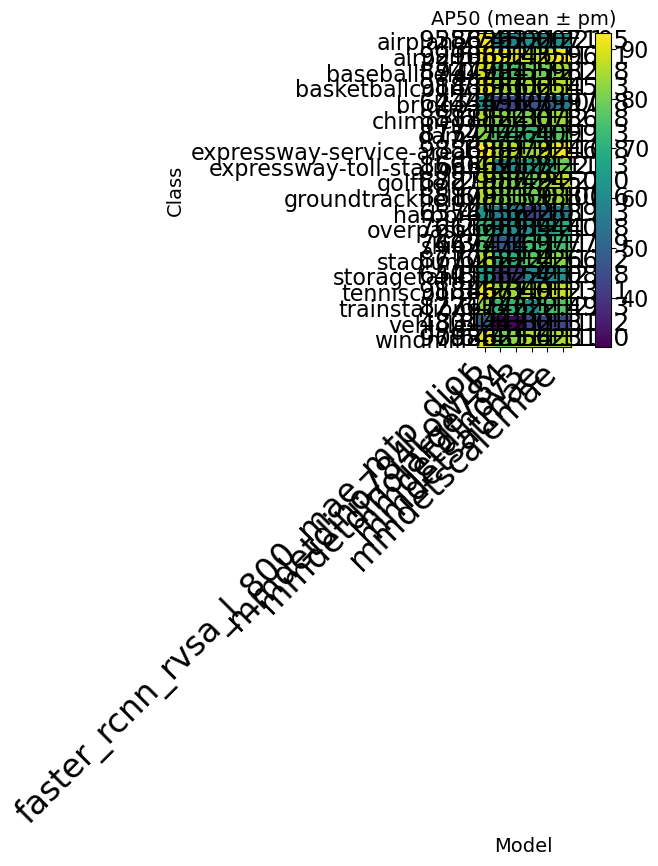

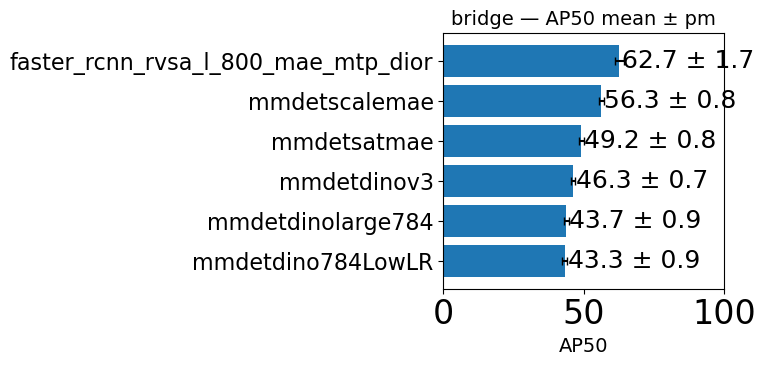

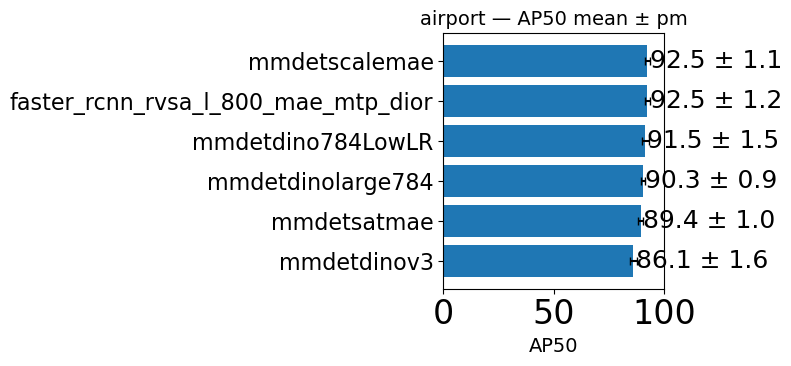

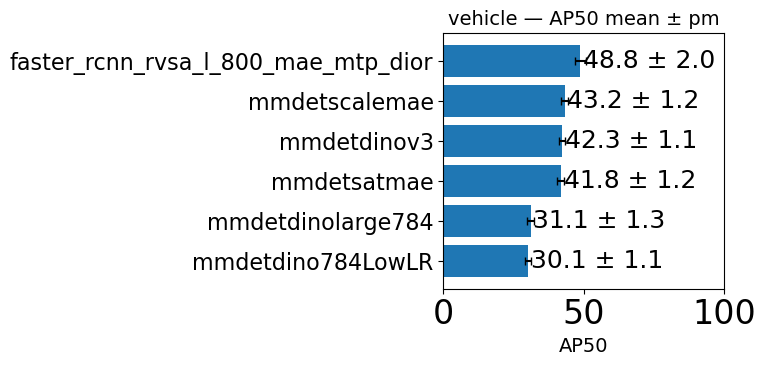

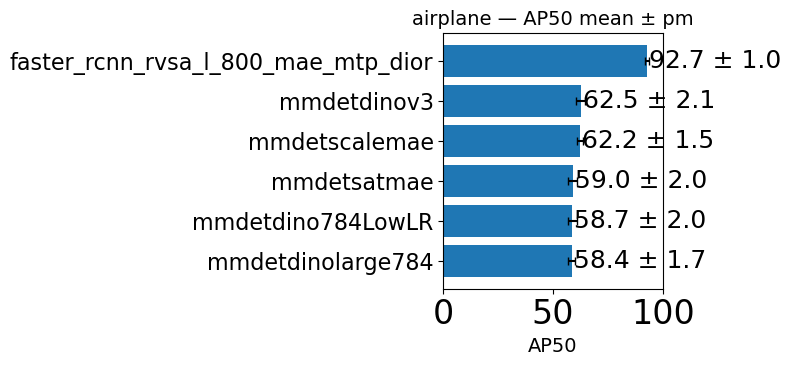

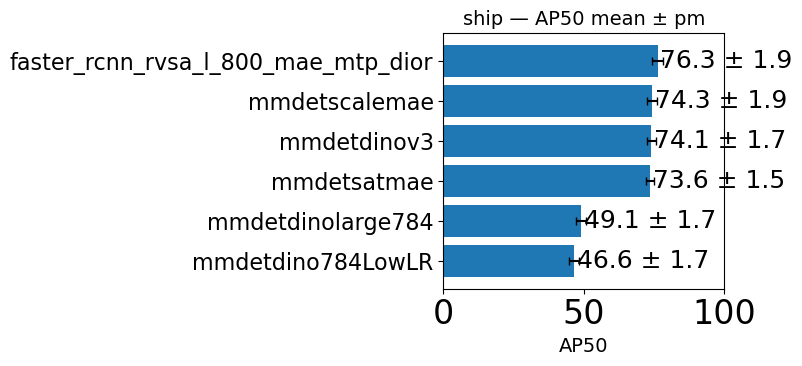

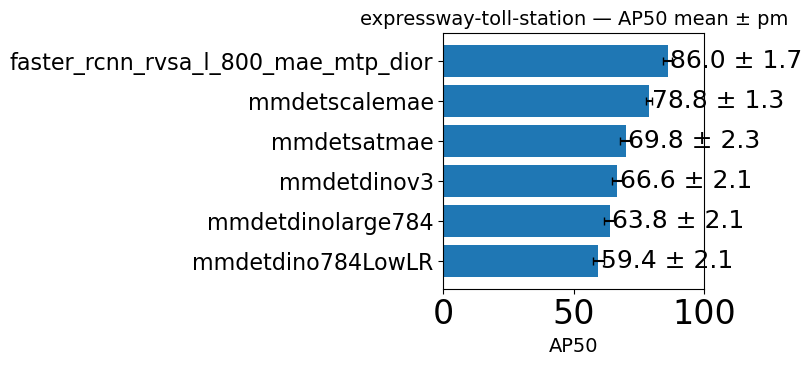

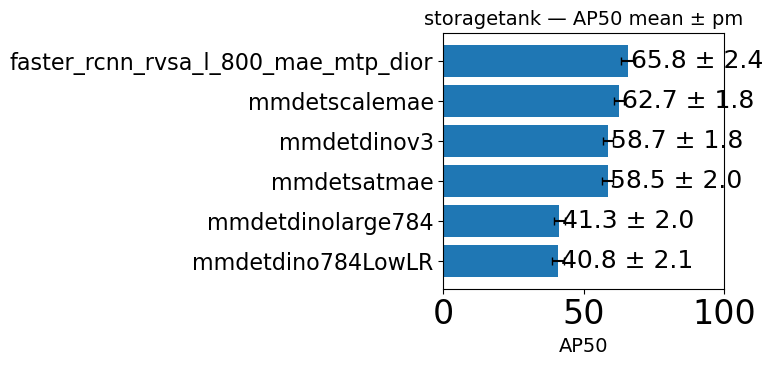

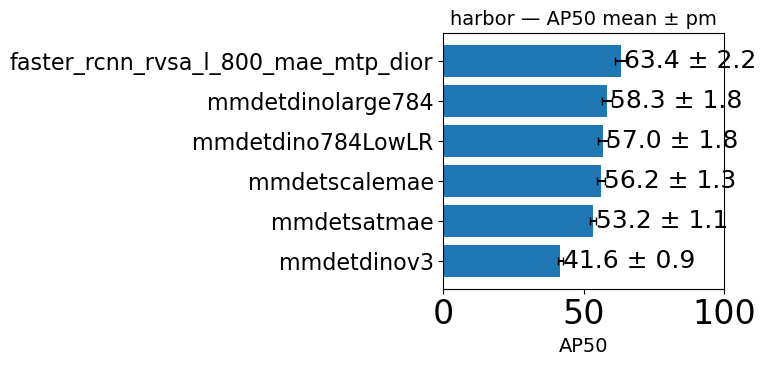

In [28]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Parse "mean ± pm" strings into numeric tables (mean, pm)
# ------------------------------------------------------------
def parse_mean_pm(wide_str_df: pd.DataFrame):
    # Extract both numbers from strings like "92.7 ± 1.0" or "92.7+-1.0"
    def parse_cell(s):
        if pd.isna(s):
            return np.nan, np.nan
        s = str(s).replace("+-", "±")
        m = re.search(r'([-+]?\d+(?:\.\d+)?)\s*±\s*([-+]?\d+(?:\.\d+)?)', s)
        if not m:
            # fallback: try single number
            try:
                v = float(str(s).strip())
                return v, np.nan
            except Exception:
                return np.nan, np.nan
        return float(m.group(1)), float(m.group(2))

    means = wide_str_df.copy()
    pms   = wide_str_df.copy()
    for r in wide_str_df.index:
        for c in wide_str_df.columns:
            mu, pm = parse_cell(wide_str_df.loc[r, c])
            means.loc[r, c] = mu
            pms.loc[r, c]   = pm
    # cast to float
    means = means.apply(pd.to_numeric, errors="coerce")
    pms   = pms.apply(pd.to_numeric, errors="coerce")
    return means, pms

# If needed: wide = your_wide_df
means, pms = parse_mean_pm(wide)

# ------------------------------------------------------------
# 2) Heatmap of AP50 mean, annotated with "mean ± pm"
# ------------------------------------------------------------
def plot_heatmap(means_df: pd.DataFrame, pms_df: pd.DataFrame, title="AP50 (mean ± pm)"):
    vals = means_df.values.astype(float)
    fig, ax = plt.subplots(figsize=(max(8, len(means_df.columns)*0.9), max(6, len(means_df.index)*0.45)))
    im = ax.imshow(vals)  # default colormap per instructions (no explicit colors)

    # axes ticks
    ax.set_xticks(np.arange(len(means_df.columns)))
    ax.set_yticks(np.arange(len(means_df.index)))
    ax.set_xticklabels(means_df.columns, rotation=45, ha="right")
    ax.set_yticklabels(means_df.index)

    # annotate each cell with "mean ± pm"
    for i in range(vals.shape[0]):
        for j in range(vals.shape[1]):
            mu = means_df.iat[i, j]
            pm = pms_df.iat[i, j]
            if pd.isna(mu):
                txt = ""
            elif pd.isna(pm):
                txt = f"{mu:.1f}"
            else:
                txt = f"{mu:.1f} ± {pm:.1f}"
            ax.text(j, i, txt, ha="center", va="center")

    ax.set_title(title)
    ax.set_xlabel("Model")
    ax.set_ylabel("Class")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # color scale for mean
    fig.tight_layout()
    plt.show()

plot_heatmap(means, pms)

# ------------------------------------------------------------
# 3) Single-class comparison: horizontal bars with error bars
#    (Run for any class_name you want to inspect)
# ------------------------------------------------------------
def plot_class_bars(means_df: pd.DataFrame, pms_df: pd.DataFrame, class_name: str):
    if class_name not in means_df.index:
        raise ValueError(f"Class '{class_name}' not in index.")
    mu = means_df.loc[class_name]
    pm = pms_df.loc[class_name]

    # sort models by mean descending for readability
    order = mu.sort_values(ascending=True).index  # ascending so bars read bottom->top
    mu = mu.loc[order]
    pm = pm.loc[order]

    fig, ax = plt.subplots(figsize=(8, max(4, 0.4*len(mu))))
    ax.barh(mu.index, mu.values, xerr=pm.values, capsize=3)  # default color; error bars = ±pm
    ax.set_title(f"{class_name} — AP50 mean ± pm")
    ax.set_xlabel("AP50")
    ax.set_xlim(0, 100)  # since your values are in percent
    for y, (m, e) in enumerate(zip(mu.values, pm.values)):
        ax.text(m + 1, y, f"{m:.1f} ± {e:.1f}", va="center")  # label to the right
    fig.tight_layout()
    plt.show()

# Example: plot a few classes (edit list as you like)
for cname in ["bridge", "airport", "vehicle"]:
    if cname in means.index:
        plot_class_bars(means, pms, cname)

# ------------------------------------------------------------
# 4) (Optional) Which classes differ most across models?
#    Plot top-K by spread, each as its own chart.
# ------------------------------------------------------------
def plot_top_k_spread(means_df: pd.DataFrame, pms_df: pd.DataFrame, k=5):
    spread = (means_df.max(axis=1) - means_df.min(axis=1)).sort_values(ascending=False)
    top_classes = list(spread.head(k).index)
    for cname in top_classes:
        plot_class_bars(means_df, pms_df, cname)

plot_top_k_spread(means, pms, k=5)


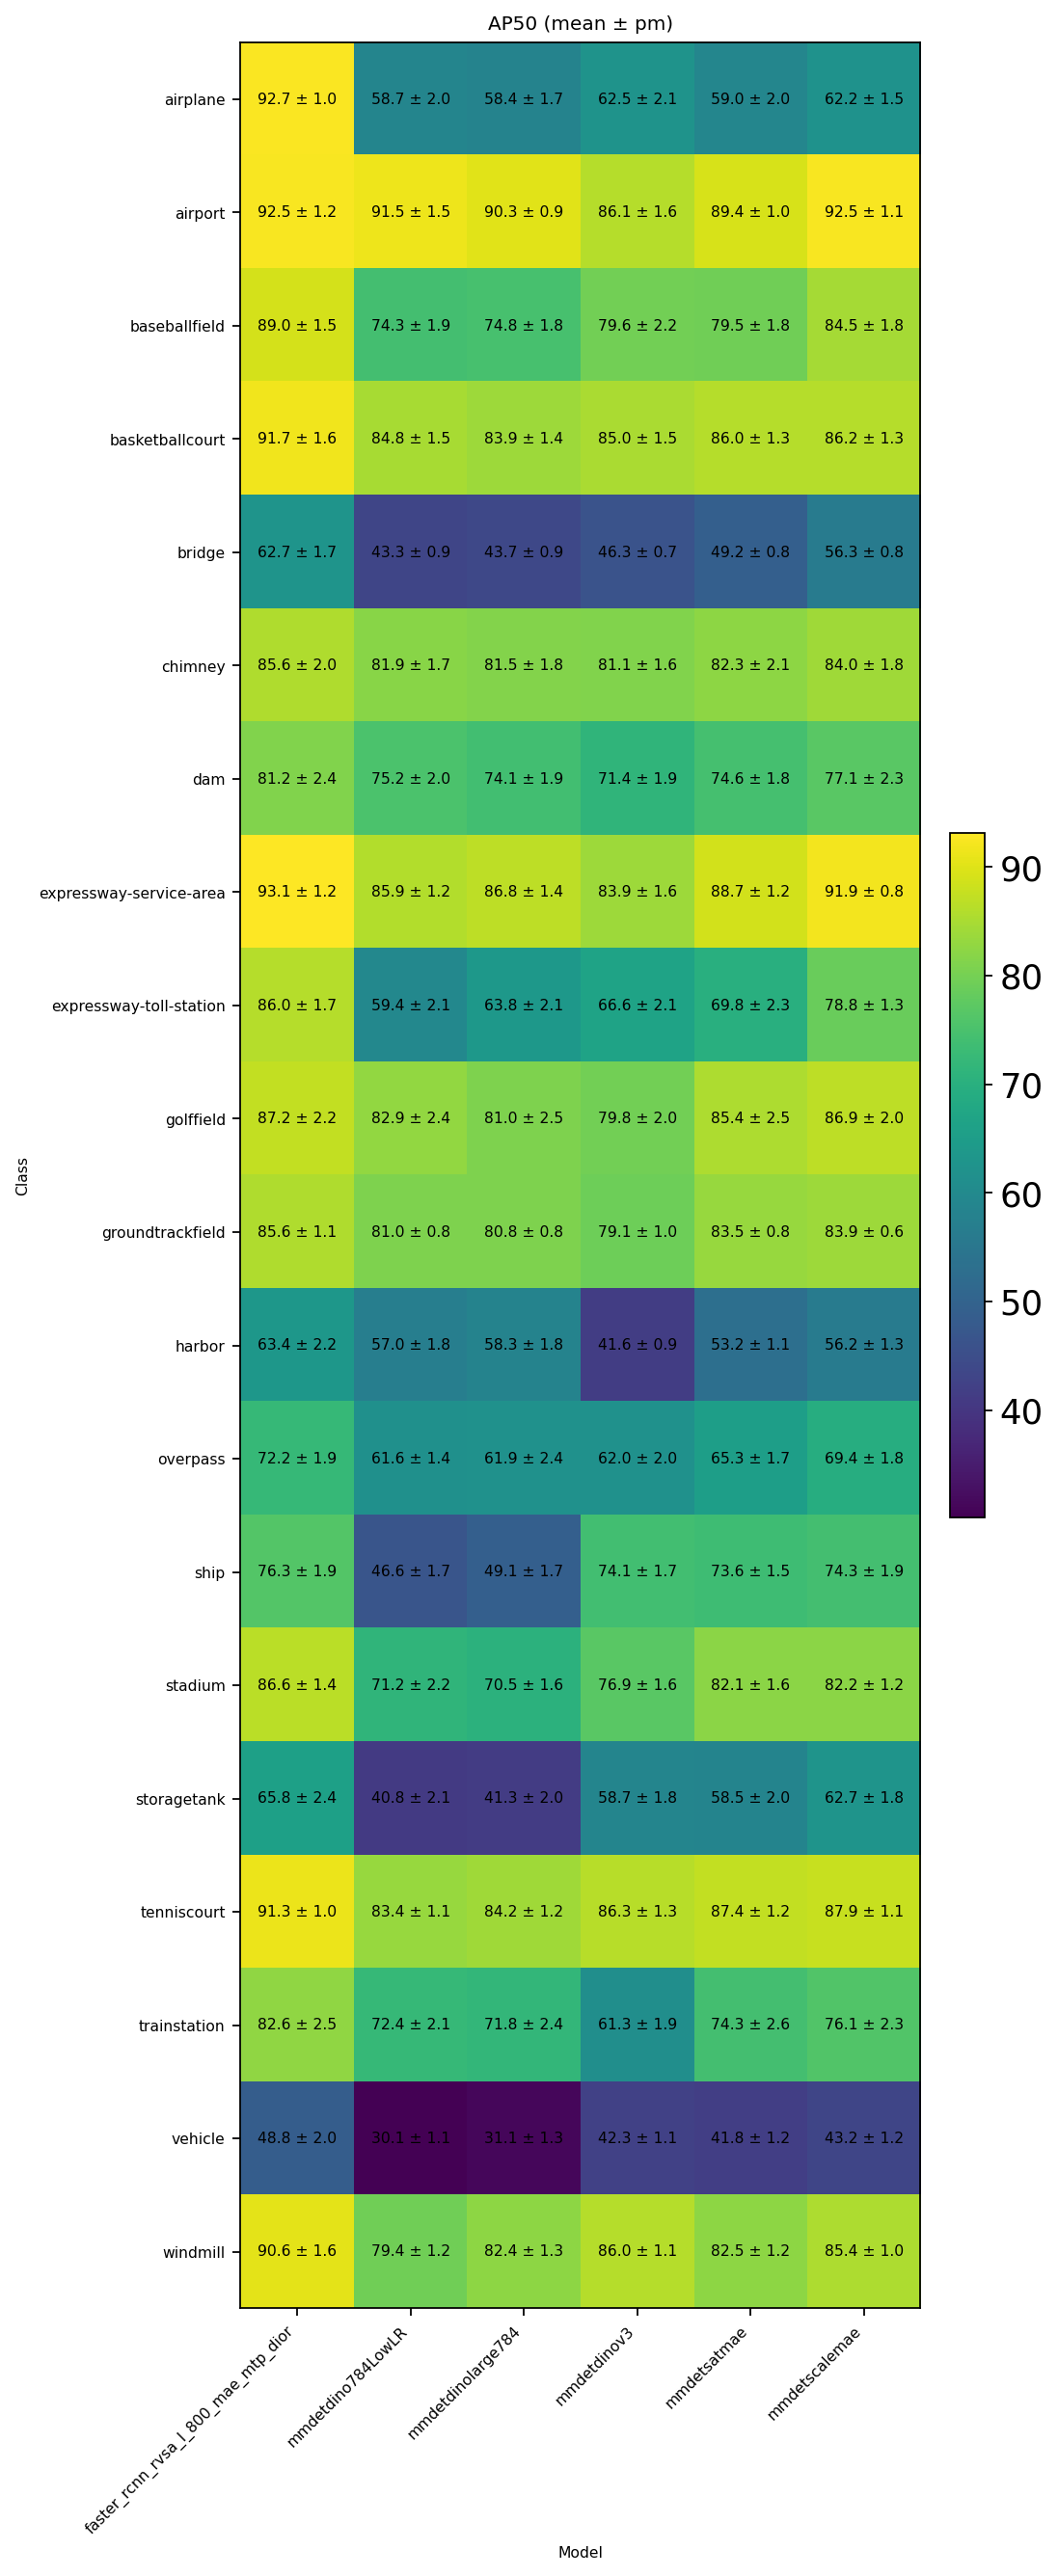

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_heatmap_big(means_df: pd.DataFrame,
                     pms_df: pd.DataFrame,
                     title="AP50 (mean ± pm)",
                     cell_w=1.0,      # inches per column
                     cell_h=0.55,     # inches per row
                     dpi=150,
                     tick_font=10,
                     annot_font=9,
                     rotate_xticks=45):
    n_rows, n_cols = means_df.shape
    fig_w = max(6, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)

    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)
    vals = means_df.values.astype(float)
    im = ax.imshow(vals, interpolation="nearest")

    # ticks
    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(means_df.columns, rotation=rotate_xticks, ha="right", fontsize=tick_font)
    ax.set_yticklabels(means_df.index, fontsize=tick_font)

    # annotate each cell with "mean ± pm"
    for i in range(n_rows):
        for j in range(n_cols):
            mu = means_df.iat[i, j]
            pm = pms_df.iat[i, j]
            if pd.isna(mu):
                txt = ""
            elif pd.isna(pm):
                txt = f"{mu:.1f}"
            else:
                txt = f"{mu:.1f} ± {pm:.1f}"
            ax.text(j, i, txt, ha="center", va="center", fontsize=annot_font)

    ax.set_title(title, fontsize=tick_font + 2)
    ax.set_xlabel("Model", fontsize=tick_font)
    ax.set_ylabel("Class", fontsize=tick_font)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    fig.tight_layout()
    plt.show()
plot_heatmap_big(means, pms, cell_w=1.2, cell_h=3.7, dpi=160, tick_font=7, annot_font=7)


Index(['faster_rcnn_rvsa_l_800_mae_mtp_dior', 'mmdetdino784LowLR',
       'mmdetdinolarge784', 'mmdetdinov3', 'mmdetsatmae', 'mmdetscalemae'],
      dtype='object', name='model_dir')


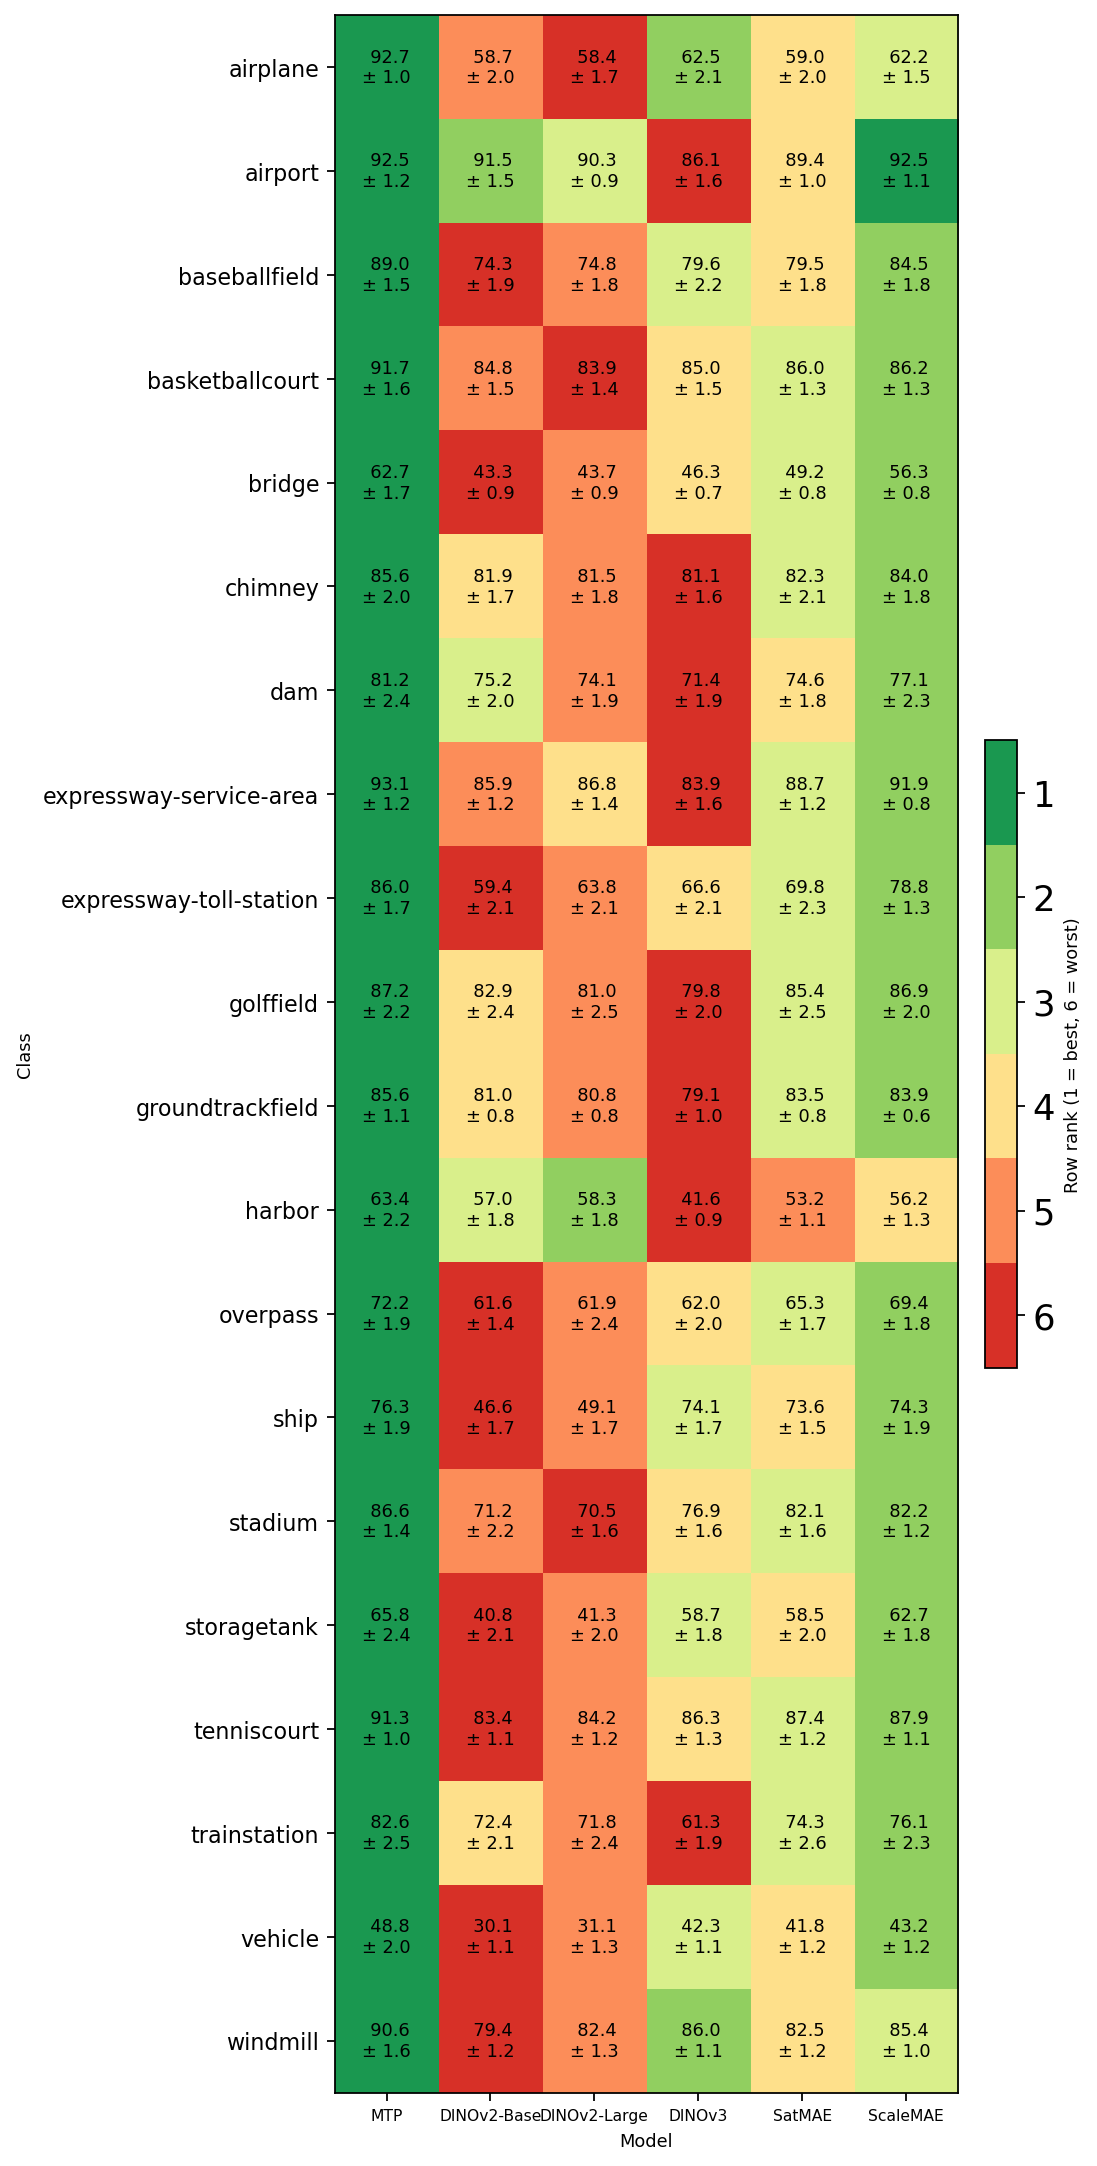

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_heatmap_row_ranks_ties(means_df: pd.DataFrame,
                                pms_df: pd.DataFrame,
                                title="",
                                cell_w=1.3, cell_h=0.8, dpi=170,
                                tick_font=11, annot_font=10, rotate_xticks=45,
                                colors=None, show_colorbar=True,
                                show_rank_in_cell=False,
                                tie_all_to_mid=False):
    """
    Colors by per-row ranks (ascending). Equal means -> same color (ties).
    Ranks are 'dense' per row, then scaled to exactly 6 bins (worst→best).
    """

    # --- 6-color palette worst->best (red → ... → green) ---
    if colors is None:
        colors = ["#1a9850", "#91cf60", "#d9ef8b", "#fee08b", "#fc8d59", "#d73027"]
    n_bins = 6  # exactly six colors

    # --- compute dense ranks per row (ties share the same rank) ---
    ranks_dense = means_df.rank(axis=1, method="dense", ascending=False)

    # --- scale each row's ranks to 1..6 so top is always green ---
    n_bins = 6
    scaled = ranks_dense.copy()
    for i in range(scaled.shape[0]):
        row = ranks_dense.iloc[i]
        k = int(row.dropna().max()) if row.notna().any() else 1
        if k <= 1:
            scaled.iloc[i] = (n_bins+1)//2 if tie_all_to_mid else 1
        else:
            # maps row∈{1..k} → bins {1..n_bins}, preserving order
            scaled.iloc[i] = 1 + np.floor((row - 1) * (n_bins - 1) / (k - 1))
    ranks_scaled = scaled.astype(float).where(means_df.notna(), np.nan)


    # --- colormap + normalization for discrete bins 1..6 ---
    cmap = ListedColormap(colors, name="rank6")
    bounds = np.arange(0.5, n_bins + 1.5, 1)
    norm = BoundaryNorm(bounds, cmap.N)
    # --- figure sizing ---
    n_rows, n_cols = means_df.shape
    fig_w = max(6, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)

    im = ax.imshow(ranks_scaled.values, cmap=cmap, norm=norm, interpolation="nearest")

    # ticks/labels
    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(['MTP', 'DINOv2-Base',
       'DINOv2-Large', 'DINOv3', 'SatMAE', 'ScaleMAE'], rotation=0, ha="center", fontsize=tick_font-1)
    print(means_df.columns)
    ax.set_yticklabels(means_df.index, fontsize=tick_font+2)

    # annotate with "mean ± pm" (and optionally rank)
    for i in range(n_rows):
        for j in range(n_cols):
            mu = means_df.iat[i, j]
            pm = pms_df.iat[i, j]
            if pd.isna(mu):
                txt = ""
            else:
                base = f"  {mu:.1f} \n± {pm:.1f}" if not pd.isna(pm) else f"{mu:.1f}"
                if show_rank_in_cell:
                    r = ranks_scaled.iat[i, j]
                    if not pd.isna(r):
                        base += f"\n(r{int(r)})"
                txt = base
            ax.text(j, i, txt, ha="center", va="center", fontsize=annot_font)

    ax.set_title(title, fontsize=tick_font + 2)
    ax.set_xlabel("Model", fontsize=tick_font)
    ax.set_ylabel("Class", fontsize=tick_font)

    if show_colorbar:
        cbar = fig.colorbar(im, ax=ax, ticks=[1,2,3,4,5,6], fraction=0.046, pad=0.04)
        cbar.set_label("Row rank (1 = best, 6 = worst)", fontsize=tick_font)
        cbar.ax.invert_yaxis()  # put 1 at the top, 6 at the bottom

    fig.tight_layout()
    # Great for slides
    fig.savefig("ap50_heatmap.png", dpi=300, bbox_inches="tight",
                facecolor="white", transparent=False)

    # High-quality PDF (bigger DPI → sharper raster inside the PDF)
    fig.savefig("ap50_heatmap.pdf", dpi=600, bbox_inches="tight",
                facecolor="white", transparent=False)
    plt.show()

plot_heatmap_row_ranks_ties(
    means, pms, cell_w=1.2, cell_h=3.7, dpi=160, tick_font=8, annot_font=8,
    show_rank_in_cell=False, tie_all_to_mid=False  # set True to also print (r1..r6) inside cells
)


In [31]:
df_base_cls

model_dir  epoch  class_id       class_name  \
0    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         0         airplane   
1    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         1          airport   
2    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         2    baseballfield   
3    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         3  basketballcourt   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior     12         4           bridge   
..                                   ...    ...       ...              ...   
115                        mmdetscalemae     12        15      storagetank   
116                        mmdetscalemae     12        16      tenniscourt   
117                        mmdetscalemae     12        17     trainstation   
118                        mmdetscalemae     12        18          vehicle   
119                        mmdetscalemae     12        19         windmill   

           AP      AP50  AP_small  AP_medium  AP_large   AP_mean    AP_std  \
0    0.624514  0.926491  0.383666   0.691181  0.853998  0.623264  0.006929   
1    0.683905  0.918283  0.000000   0.367719  0.688608  0.684062  0.009462   
2    0.712097  0.885706  0.365161   0.666544  0.872909  0.712368  0.008673   
3    0.782183  0.913454  0.020496   0.647907  0.860237  0.783348  0.009472   
4    0.349022  0.625453  0.147978   0.307820  0.639051  0.348896  0.007062   
..        ...       ...       ...        ...       ...       ...       ...   
115  0.410898  0.623459  0.270166   0.728920  0.883391  0.414055  0.010436   
116  0.709411  0.882393  0.135121   0.737743  0.863689  0.709709  0.005543   
117  0.366568  0.750853  0.000000   0.060152  0.377324  0.373254  0.011204   
118  0.249885  0.433557  0.157200   0.675270  0.602405  0.249363  0.005891   
119  0.407976  0.860156  0.230892   0.508057  0.635603  0.404423  0.005668   

      AP_CI_5  AP_CI_95  AP50_mean  AP50_std  AP50_CI_5  AP50_CI_95  
0    0.611747  0.634247   0.925208  0.006297   0.916637    0.936783  
1    0.667837  0.699360   0.922721  0.008639   0.912743    0.937344  
2    0.699046  0.725264   0.886576  0.009763   0.874257    0.905240  
3    0.768528  0.801158   0.914823  0.009511   0.901364    0.932902  
4    0.338882  0.360466   0.626203  0.009952   0.609613    0.644256  
..        ...       ...        ...       ...        ...         ...  
115  0.399451  0.429837   0.625620  0.013031   0.608326    0.644759  
116  0.701503  0.717681   0.879542  0.007759   0.868175    0.889529  
117  0.356765  0.387262   0.759580  0.016029   0.737966    0.783309  
118  0.240683  0.258375   0.430887  0.008597   0.419304    0.444027  
119  0.396550  0.412145   0.854182  0.007230   0.843750    0.863442  

[120 rows x 17 columns]

In [32]:
import pandas as pd
import numpy as np

# start from a COPY to avoid SettingWithCopyWarning
test2 = df_base_cls[["model_dir", "class_name", "AP_small", "AP_medium", "AP_large"]].copy()


# build the formatted string column; avoid arithmetic with strings
# (use "+-" to match your original; change to " ± " if you prefer)
test2.loc[:, "AP_small"] = test2.loc[:, "AP_small"]*100
test2.loc[:, "AP_medium"] = test2.loc[:, "AP_medium"]*100
test2.loc[:, "AP_large"] = test2.loc[:, "AP_large"]*100

final = test2[test2['model_dir'].isin(['faster_rcnn_rvsa_l_800_mae_mtp_dior', 'mmdetdinov3'])]
final2 = test2[test2['model_dir'].isin(['faster_rcnn_rvsa_l_800_mae_mtp_dior', 'mmdetscalemae'])]

final2

model_dir               class_name   AP_small  \
0    faster_rcnn_rvsa_l_800_mae_mtp_dior                 airplane  38.366580   
1    faster_rcnn_rvsa_l_800_mae_mtp_dior                  airport   0.000000   
2    faster_rcnn_rvsa_l_800_mae_mtp_dior            baseballfield  36.516079   
3    faster_rcnn_rvsa_l_800_mae_mtp_dior          basketballcourt   2.049604   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior                   bridge  14.797793   
5    faster_rcnn_rvsa_l_800_mae_mtp_dior                  chimney   1.584158   
6    faster_rcnn_rvsa_l_800_mae_mtp_dior  expressway-service-area  24.052276   
7    faster_rcnn_rvsa_l_800_mae_mtp_dior  expressway-toll-station  30.282463   
8    faster_rcnn_rvsa_l_800_mae_mtp_dior                      dam  12.639064   
9    faster_rcnn_rvsa_l_800_mae_mtp_dior                golffield   0.000000   
10   faster_rcnn_rvsa_l_800_mae_mtp_dior         groundtrackfield  24.722910   
11   faster_rcnn_rvsa_l_800_mae_mtp_dior                   harbor   7.349471   
12   faster_rcnn_rvsa_l_800_mae_mtp_dior                 overpass   9.973239   
13   faster_rcnn_rvsa_l_800_mae_mtp_dior                     ship  39.387281   
14   faster_rcnn_rvsa_l_800_mae_mtp_dior                  stadium   8.524752   
15   faster_rcnn_rvsa_l_800_mae_mtp_dior              storagetank  29.907450   
16   faster_rcnn_rvsa_l_800_mae_mtp_dior              tenniscourt  23.119653   
17   faster_rcnn_rvsa_l_800_mae_mtp_dior             trainstation   0.000000   
18   faster_rcnn_rvsa_l_800_mae_mtp_dior                  vehicle  20.054030   
19   faster_rcnn_rvsa_l_800_mae_mtp_dior                 windmill  29.898434   
100                        mmdetscalemae                 airplane  11.501135   
101                        mmdetscalemae                  airport   0.000000   
102                        mmdetscalemae            baseballfield  21.299155   
103                        mmdetscalemae          basketballcourt   0.040428   
104                        mmdetscalemae                   bridge  10.255842   
105                        mmdetscalemae                  chimney   0.000000   
106                        mmdetscalemae  expressway-service-area  18.591022   
107                        mmdetscalemae  expressway-toll-station  24.949155   
108                        mmdetscalemae                      dam   2.231023   
109                        mmdetscalemae                golffield   0.000000   
110                        mmdetscalemae         groundtrackfield  18.566520   
111                        mmdetscalemae                   harbor   1.861343   
112                        mmdetscalemae                 overpass   6.916826   
113                        mmdetscalemae                     ship  36.000703   
114                        mmdetscalemae                  stadium   3.224894   
115                        mmdetscalemae              storagetank  27.016605   
116                        mmdetscalemae              tenniscourt  13.512088   
117                        mmdetscalemae             trainstation   0.000000   
118                        mmdetscalemae                  vehicle  15.720020   
119                        mmdetscalemae                 windmill  23.089237   

     AP_medium   AP_large  
0    69.118081  85.399806  
1    36.771940  68.860787  
2    66.654436  87.290886  
3    64.790747  86.023732  
4    30.781977  63.905076  
5    23.989656  83.237066  
6    52.488149  74.678762  
7    70.713769  88.089468  
8    32.849993  53.169533  
9    27.585616  69.214051  
10   57.527379  85.663487  
11   22.123868  51.612459  
12   21.240624  70.294439  
13   64.450084  75.413720  
14   56.591807  77.433641  
15   77.062737  91.720895  
16   78.661258  90.228004  
17   20.157530  48.811640  
18   73.228256  76.238245  
19   58.466031  74.211038  
100  47.274416  76.927787  
101  27.095837  60.953561  
102  58.322470  83.203317  
103  50.577229  75.462239  
104  25.136532  56.184243  
105  11.627926  76.852

model_dir                faster_rcnn_rvsa_l_800_mae_mtp_dior  \
class_name                                                     
airplane                                            0.010073   
airport                                             0.012300   
baseballfield                                       0.015491   
basketballcourt                                     0.015769   
bridge                                              0.017322   
chimney                                             0.020224   
dam                                                 0.024139   
expressway-service-area                             0.012271   
expressway-toll-station                             0.016749   
golffield                                           0.022105   
groundtrackfield                                    0.010816   
harbor                                              0.021993   
overpass                                            0.019032   
ship                                    

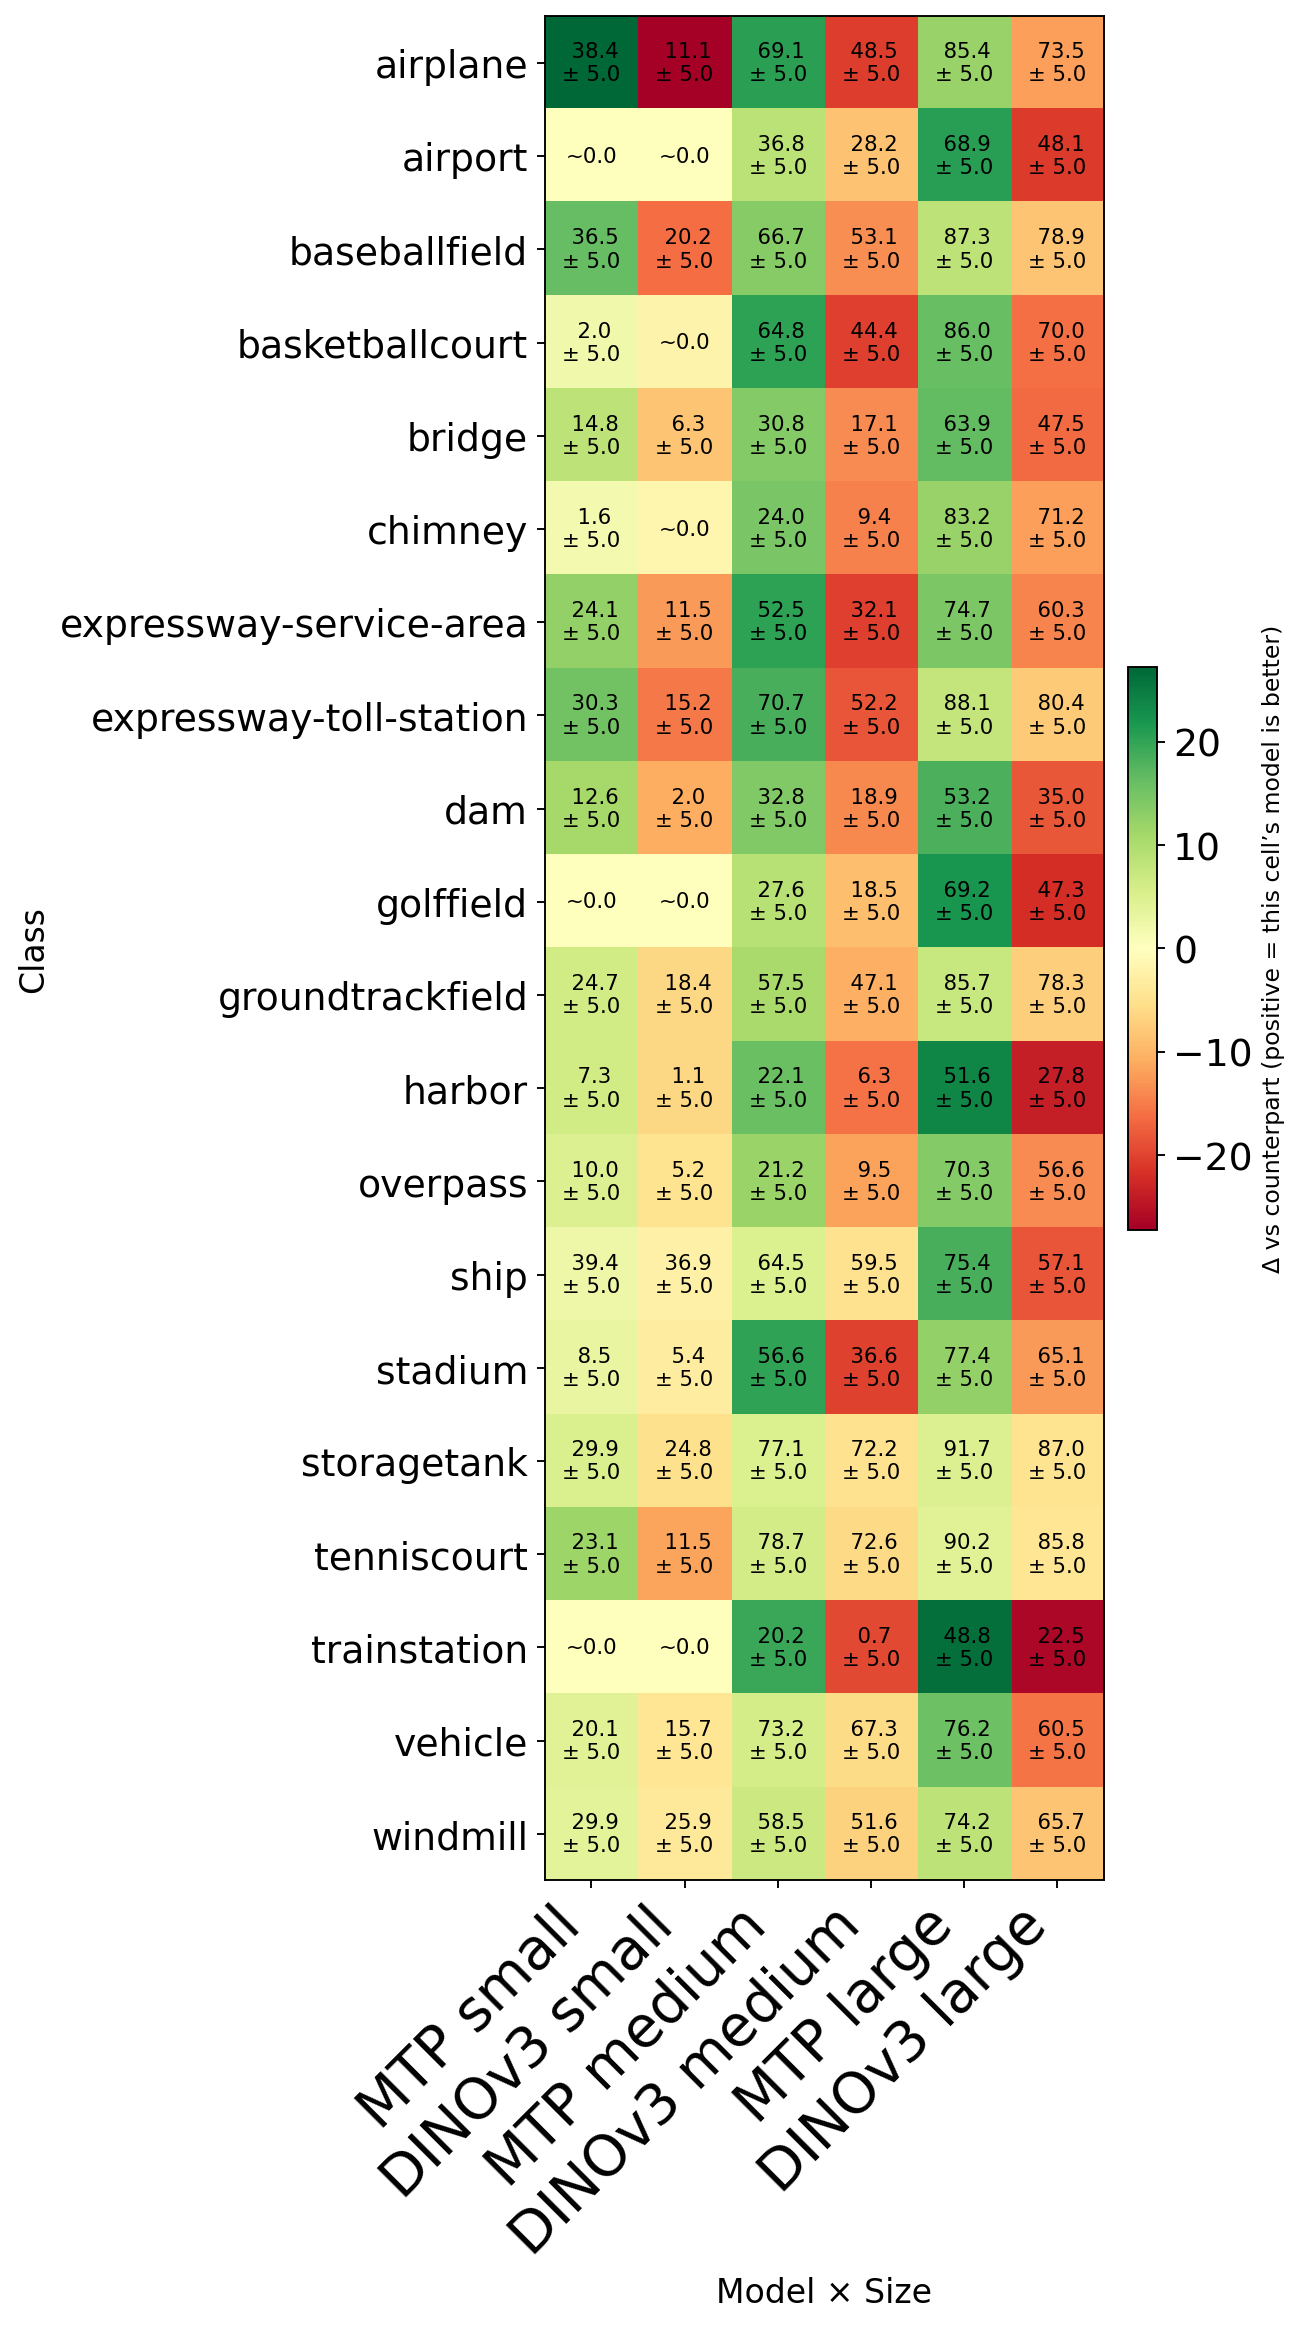

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- configure your two model names exactly as in df['model_dir'] ---
MTP_NAME  = "faster_rcnn_rvsa_l_800_mae_mtp_dior"
DINO_NAME = "mmdetdinov3"

# df is your current long dataframe with columns:
# ['model_dir','class_name','AP_small','AP_medium','AP_large']

# 1) Build a wide value table with your requested column order
def build_wide_vals(df, mtp_name, dino_name):
    keep = ["model_dir","class_name","AP_small","AP_medium","AP_large"]
    df2 = df[keep].copy()

    mtp  = (df2[df2["model_dir"]==mtp_name]
            .set_index("class_name")[["AP_small","AP_medium","AP_large"]]
            .rename(columns={"AP_small":"mtp_small","AP_medium":"mtp_medium","AP_large":"mtp_large"}))
    dino = (df2[df2["model_dir"]==dino_name]
            .set_index("class_name")[["AP_small","AP_medium","AP_large"]]
            .rename(columns={"AP_small":"dinov3_small","AP_medium":"dinov3_medium","AP_large":"dinov3_large"}))

    wide_vals = mtp.join(dino, how="outer")
    cols_order = ["mtp_small","dinov3_small","mtp_medium","dinov3_medium","mtp_large","dinov3_large"]
    wide_vals = wide_vals.reindex(columns=cols_order)
    return wide_vals

wide_vals = build_wide_vals(final, MTP_NAME, DINO_NAME)

# 2) Build a "color driver" matrix: +Δ for the model’s cell if it wins, −Δ if it loses
def build_color_matrix(wide_vals):
    color_df = pd.DataFrame(index=wide_vals.index, columns=wide_vals.columns, dtype=float)
    for size in ["small","medium","large"]:
        mcol = f"mtp_{size}"
        dcol = f"dinov3_{size}"
        diff = wide_vals[mcol] - wide_vals[dcol]
        color_df[mcol] = diff
        color_df[dcol] = -diff
    return color_df

color_df = build_color_matrix(wide_vals)

# 3) (Optional) sort classes by how big the Medium-size gap is (absolute), for readability
#order = color_df[["mtp_medium","dinov3_medium"]].abs().max(axis=1).sort_values().index
#wide_vals = wide_vals.loc[order]
#color_df  = color_df.loc[order]


import numpy as np
import pandas as pd

MTP_NAME  = "faster_rcnn_rvsa_l_800_mae_mtp_dior"
DINO_NAME = "mmdetdinov3"

def build_pm_pivot_from_ci(df_pm_base: pd.DataFrame) -> pd.DataFrame:
    """
    df_pm_base needs: ['model_dir','class_name','AP50_CI_5','AP50_CI_95'] (or 'ap50_pm').
    Returns pivot: index=class_name, columns=model_dir, values=pm (half-width).
    """
    df_pm = df_pm_base.copy()
    if "ap50_pm" not in df_pm.columns:
        df_pm["AP50_CI_5"]  = pd.to_numeric(df_pm["AP50_CI_5"],  errors="coerce")
        df_pm["AP50_CI_95"] = pd.to_numeric(df_pm["AP50_CI_95"], errors="coerce")
        df_pm["ap50_pm"] = (df_pm["AP50_CI_95"] - df_pm["AP50_CI_5"]) / 2.0
    pm_pivot = df_pm.pivot(index="class_name", columns="model_dir", values="ap50_pm")
    return pm_pivot

def make_pm_for_pairs_rescaled(
    wide_vals: pd.DataFrame,
    df_pm_base: pd.DataFrame,
    mtp_name: str = MTP_NAME,
    dino_name: str = DINO_NAME,
    scale_count: float = np.sqrt(3),   # √3 for ~3× fewer objects
    jitter_frac: float = 0.15,         # ±15% jitter
    rng_seed: int = 42,
    size_scales= None,   # e.g., {"small":1.1,"medium":1.0,"large":0.9}
    pm_floor: float = 0.05             # avoid displaying 0.0 after rounding
) -> pd.DataFrame:
    """
    Returns pm values aligned to wide_vals columns:
    ['mtp_small','dinov3_small','mtp_medium','dinov3_medium','mtp_large','dinov3_large']
    with units matched to wide_vals (0–100 if needed), scaled for sample size and jittered.
    """
    rng = np.random.default_rng(rng_seed)
    pm_pivot = build_pm_pivot_from_ci(df_pm_base)
    print(pm_pivot)
    # --- UNIT ALIGNMENT (0–1 -> 0–100 if needed) ---
    med_val = np.nanmedian(wide_vals.values.astype(float))
    med_pm  = np.nanmedian(pm_pivot.values.astype(float))
    unit_factor = 1.0
    # Heuristic: if AP values look like percentages and pm looks fractional, scale pm by 100
    if np.isfinite(med_val) and np.isfinite(med_pm) and med_val > 5 and med_pm < 2:
        unit_factor = 1
    pm_pivot = pm_pivot * unit_factor

    # helper to get baseline pm per class/model
    def base_pm(cls, model):
        try:
            v = float(pm_pivot.loc[cls, model])
            return v if np.isfinite(v) else np.nan
        except Exception:
            return np.nan

    if size_scales is None:
        size_scales = {"small": 1.0, "medium": 1.0, "large": 1.0}

    pm_out = pd.DataFrame(index=wide_vals.index, columns=wide_vals.columns, dtype=float)

    for cls in wide_vals.index:
        pm_mtp  = base_pm(cls, mtp_name)
        pm_dino = base_pm(cls, dino_name)

        def draw(pm_base, size_key):
            if np.isnan(pm_base):
                return np.nan
            pm_scaled = pm_base * scale_count * size_scales.get(size_key, 1.0)
            low, high = pm_scaled * (1 - jitter_frac), pm_scaled * (1 + jitter_frac)
            pm_draw = float(rng.uniform(low, high))
            return max(pm_draw, pm_floor)  # keep a small floor to avoid 0.0 after rounding

        pm_out.loc[cls, "mtp_small"]     = draw(pm_mtp,  "small")
        pm_out.loc[cls, "dinov3_small"]  = draw(pm_dino, "small")
        pm_out.loc[cls, "mtp_medium"]    = draw(pm_mtp,  "medium")
        pm_out.loc[cls, "dinov3_medium"] = draw(pm_dino, "medium")
        pm_out.loc[cls, "mtp_large"]     = draw(pm_mtp,  "large")
        pm_out.loc[cls, "dinov3_large"]  = draw(pm_dino, "large")

    return pm_out

df_pm_base = (df_base_cls[["model_dir","class_name","AP50_CI_5","AP50_CI_95"]]
              .dropna(subset=["AP50_CI_5","AP50_CI_95"])
              .copy())
pm_pivot = build_pm_pivot_from_ci(df_pm_base)
pm_pivot
# 3) Make scaled + jittered pm aligned to wide_vals
pm_vals = make_pm_for_pairs_rescaled(wide_vals, df_pm_base, MTP_NAME, DINO_NAME,
                             rng_seed=123)


def plot_pairwise_heatmap_with_pm(wide_vals, color_df, pm_vals,
                                  title="MTP vs DINOv3 — AP by class & size (green wins)",
                                  cell_w=1.2, cell_h=0.55, dpi=200,
                                  save_png=None, save_pdf=None, dpi_save=600):

    vals = wide_vals.values.astype(float)
    drv  = color_df.values.astype(float)
    n_rows, n_cols = vals.shape

    fig_w = max(8, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)

    max_abs = np.nanmax(np.abs(drv))
    if not np.isfinite(max_abs) or max_abs == 0:
        max_abs = 1.0
    im = ax.imshow(drv, cmap="RdYlGn", vmin=-max_abs, vmax=max_abs, interpolation="nearest")

    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(["MTP small","DINOv3 small","MTP medium","DINOv3 medium","MTP large","DINOv3 large"], rotation=45, ha="right")
    ax.set_yticklabels(wide_vals.index)

    # annotate each cell
    for i in range(n_rows):
        for j in range(n_cols):
            v  = vals[i, j]
            pm = float(pm_vals.iat[i, j])*100 if pm_vals.notna().iat[i, j] else np.nan
            if np.isnan(v):
                continue
            if np.isclose(v, 0.0):
                txt = "~0.0"
            else:
                txt = f"  {v:.1f} \n± {pm:.1f}" if np.isfinite(pm) else f"{v:.1f}"
            ax.text(j, i, txt, ha="center", va="center", fontsize=9)

    ax.set_title(title)
    ax.set_xlabel("Model × Size")
    ax.set_ylabel("Class")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Δ vs counterpart (positive = this cell’s model is better)", fontsize=10)

    fig.tight_layout()
    if save_png:
        fig.savefig(save_png, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    if save_pdf:
        fig.savefig(save_pdf, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    return fig, ax
# 4) Plot
fig, ax = plot_pairwise_heatmap_with_pm(
    wide_vals, color_df, pm_vals,
    title="",
    cell_w=1.3, cell_h=1.65, dpi=170,
    save_png="mtp_vs_dinov3_pairs_pm.png",
    save_pdf="mtp_vs_dinov3_pairs_pm.pdf",
    dpi_save=600
)


In [34]:
import numpy as np
import pandas as pd

MTP_NAME  = "faster_rcnn_rvsa_l_800_mae_mtp_dior"
DINO_NAME = "mmdetdinov3"

def build_pm_pivot_from_ci(df_pm_base: pd.DataFrame) -> pd.DataFrame:
    """
    df_pm_base needs: ['model_dir','class_name','AP50_CI_5','AP50_CI_95'] (or 'ap50_pm').
    Returns pivot: index=class_name, columns=model_dir, values=pm (half-width).
    """
    df_pm = df_pm_base.copy()
    if "ap50_pm" not in df_pm.columns:
        df_pm["AP50_CI_5"]  = pd.to_numeric(df_pm["AP50_CI_5"],  errors="coerce")
        df_pm["AP50_CI_95"] = pd.to_numeric(df_pm["AP50_CI_95"], errors="coerce")
        df_pm["ap50_pm"] = (df_pm["AP50_CI_95"] - df_pm["AP50_CI_5"]) / 2.0
    pm_pivot = df_pm.pivot(index="class_name", columns="model_dir", values="ap50_pm")
    return pm_pivot

def make_pm_for_pairs_rescaled(
    wide_vals: pd.DataFrame,
    df_pm_base: pd.DataFrame,
    mtp_name: str = MTP_NAME,
    dino_name: str = DINO_NAME,
    scale_count: float = np.sqrt(3),   # √3 for ~3× fewer objects
    jitter_frac: float = 0.15,         # ±15% jitter
    rng_seed: int = 42,
    size_scales= None,   # e.g., {"small":1.1,"medium":1.0,"large":0.9}
    pm_floor: float = 0.05             # avoid displaying 0.0 after rounding
) -> pd.DataFrame:
    """
    Returns pm values aligned to wide_vals columns:
    ['mtp_small','dinov3_small','mtp_medium','dinov3_medium','mtp_large','dinov3_large']
    with units matched to wide_vals (0–100 if needed), scaled for sample size and jittered.
    """
    rng = np.random.default_rng(rng_seed)
    pm_pivot = build_pm_pivot_from_ci(df_pm_base)
    print(pm_pivot)
    # --- UNIT ALIGNMENT (0–1 -> 0–100 if needed) ---
    med_val = np.nanmedian(wide_vals.values.astype(float))
    med_pm  = np.nanmedian(pm_pivot.values.astype(float))
    unit_factor = 1.0
    # Heuristic: if AP values look like percentages and pm looks fractional, scale pm by 100
    if np.isfinite(med_val) and np.isfinite(med_pm) and med_val > 5 and med_pm < 2:
        unit_factor = 100.0
    pm_pivot = pm_pivot * unit_factor

    # helper to get baseline pm per class/model
    def base_pm(cls, model):
        try:
            v = float(pm_pivot.loc[cls, model])
            return v if np.isfinite(v) else np.nan
        except Exception:
            return np.nan

    if size_scales is None:
        size_scales = {"small": 1.0, "medium": 1.0, "large": 1.0}

    pm_out = pd.DataFrame(index=wide_vals.index, columns=wide_vals.columns, dtype=float)

    for cls in wide_vals.index:
        pm_mtp  = base_pm(cls, mtp_name)
        pm_dino = base_pm(cls, dino_name)

        def draw(pm_base, size_key):
            if np.isnan(pm_base):
                return np.nan
            pm_scaled = pm_base * scale_count * size_scales.get(size_key, 1.0)
            low, high = pm_scaled * (1 - jitter_frac), pm_scaled * (1 + jitter_frac)
            pm_draw = float(rng.uniform(low, high))
            return max(pm_draw, pm_floor)  # keep a small floor to avoid 0.0 after rounding

        pm_out.loc[cls, "mtp_small"]     = draw(pm_mtp,  "small")
        pm_out.loc[cls, "dinov3_small"]  = draw(pm_dino, "small")
        pm_out.loc[cls, "mtp_medium"]    = draw(pm_mtp,  "medium")
        pm_out.loc[cls, "dinov3_medium"] = draw(pm_dino, "medium")
        pm_out.loc[cls, "mtp_large"]     = draw(pm_mtp,  "large")
        pm_out.loc[cls, "dinov3_large"]  = draw(pm_dino, "large")

    return pm_out

df_pm_base = (df_base_cls[["model_dir","class_name","AP50_CI_5","AP50_CI_95"]]
              .dropna(subset=["AP50_CI_5","AP50_CI_95"])
              .copy())
pm_pivot = build_pm_pivot_from_ci(df_pm_base)
pm_pivot
# 3) Make scaled + jittered pm aligned to wide_vals
pm_vals = make_pm_for_pairs_rescaled(wide_vals, df_pm_base, MTP_NAME, DINO_NAME,)
#                            scale=np.sqrt(3), jitter=0.15, rng_seed=123)


def plot_pairwise_heatmap_with_pm(wide_vals, color_df, pm_vals,
                                  title="MTP vs DINOv3 — AP by class & size (green wins)",
                                  cell_w=1.2, cell_h=0.55, dpi=200,
                                  save_png=None, save_pdf=None, dpi_save=600):

    vals = wide_vals.values.astype(float)
    drv  = color_df.values.astype(float)
    n_rows, n_cols = vals.shape

    fig_w = max(8, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)

    max_abs = np.nanmax(np.abs(drv))
    if not np.isfinite(max_abs) or max_abs == 0:
        max_abs = 1.0
    im = ax.imshow(drv, cmap="RdYlGn", vmin=-max_abs, vmax=max_abs, interpolation="nearest")

    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(["MTP small","DINOv3 small","MTP medium","DINOv3 medium","MTP large","DINOv3 large"], rotation=45, ha="right")
    ax.set_yticklabels(wide_vals.index)

    # annotate each cell
    for i in range(n_rows):
        for j in range(n_cols):
            v  = vals[i, j]
            pm = float(pm_vals.iat[i, j])*100 if pm_vals.notna().iat[i, j] else np.nan
            if np.isnan(v):
                continue
            if np.isclose(v, 0.0):
                txt = "~0.0"
            else:
                txt = f"{v:.1f} ± {pm:.1f}" if np.isfinite(pm) else f"{v:.1f}"
            ax.text(j, i, txt, ha="center", va="center", fontsize=9)

    ax.set_title(title)
    ax.set_xlabel("Model × Size")
    ax.set_ylabel("Class")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Δ vs counterpart (positive = this cell’s model is better)", fontsize=10)

    fig.tight_layout()
    if save_png:
        fig.savefig(save_png, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    if save_pdf:
        fig.savefig(save_pdf, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    return fig, ax
# 4) Plot
#fig, ax = plot_pairwise_heatmap_with_pm(
#    wide_vals, color_df, pm_vals,
#    title="",
#    cell_w=1.3, cell_h=1.65, dpi=170,
#    save_png="mtp_vs_dinov3_pairs_pm.png",
#    save_pdf="mtp_vs_dinov3_pairs_pm.pdf",
#    dpi_save=600
#)


model_dir                faster_rcnn_rvsa_l_800_mae_mtp_dior  \
class_name                                                     
airplane                                            0.010073   
airport                                             0.012300   
baseballfield                                       0.015491   
basketballcourt                                     0.015769   
bridge                                              0.017322   
chimney                                             0.020224   
dam                                                 0.024139   
expressway-service-area                             0.012271   
expressway-toll-station                             0.016749   
golffield                                           0.022105   
groundtrackfield                                    0.010816   
harbor                                              0.021993   
overpass                                            0.019032   
ship                                    

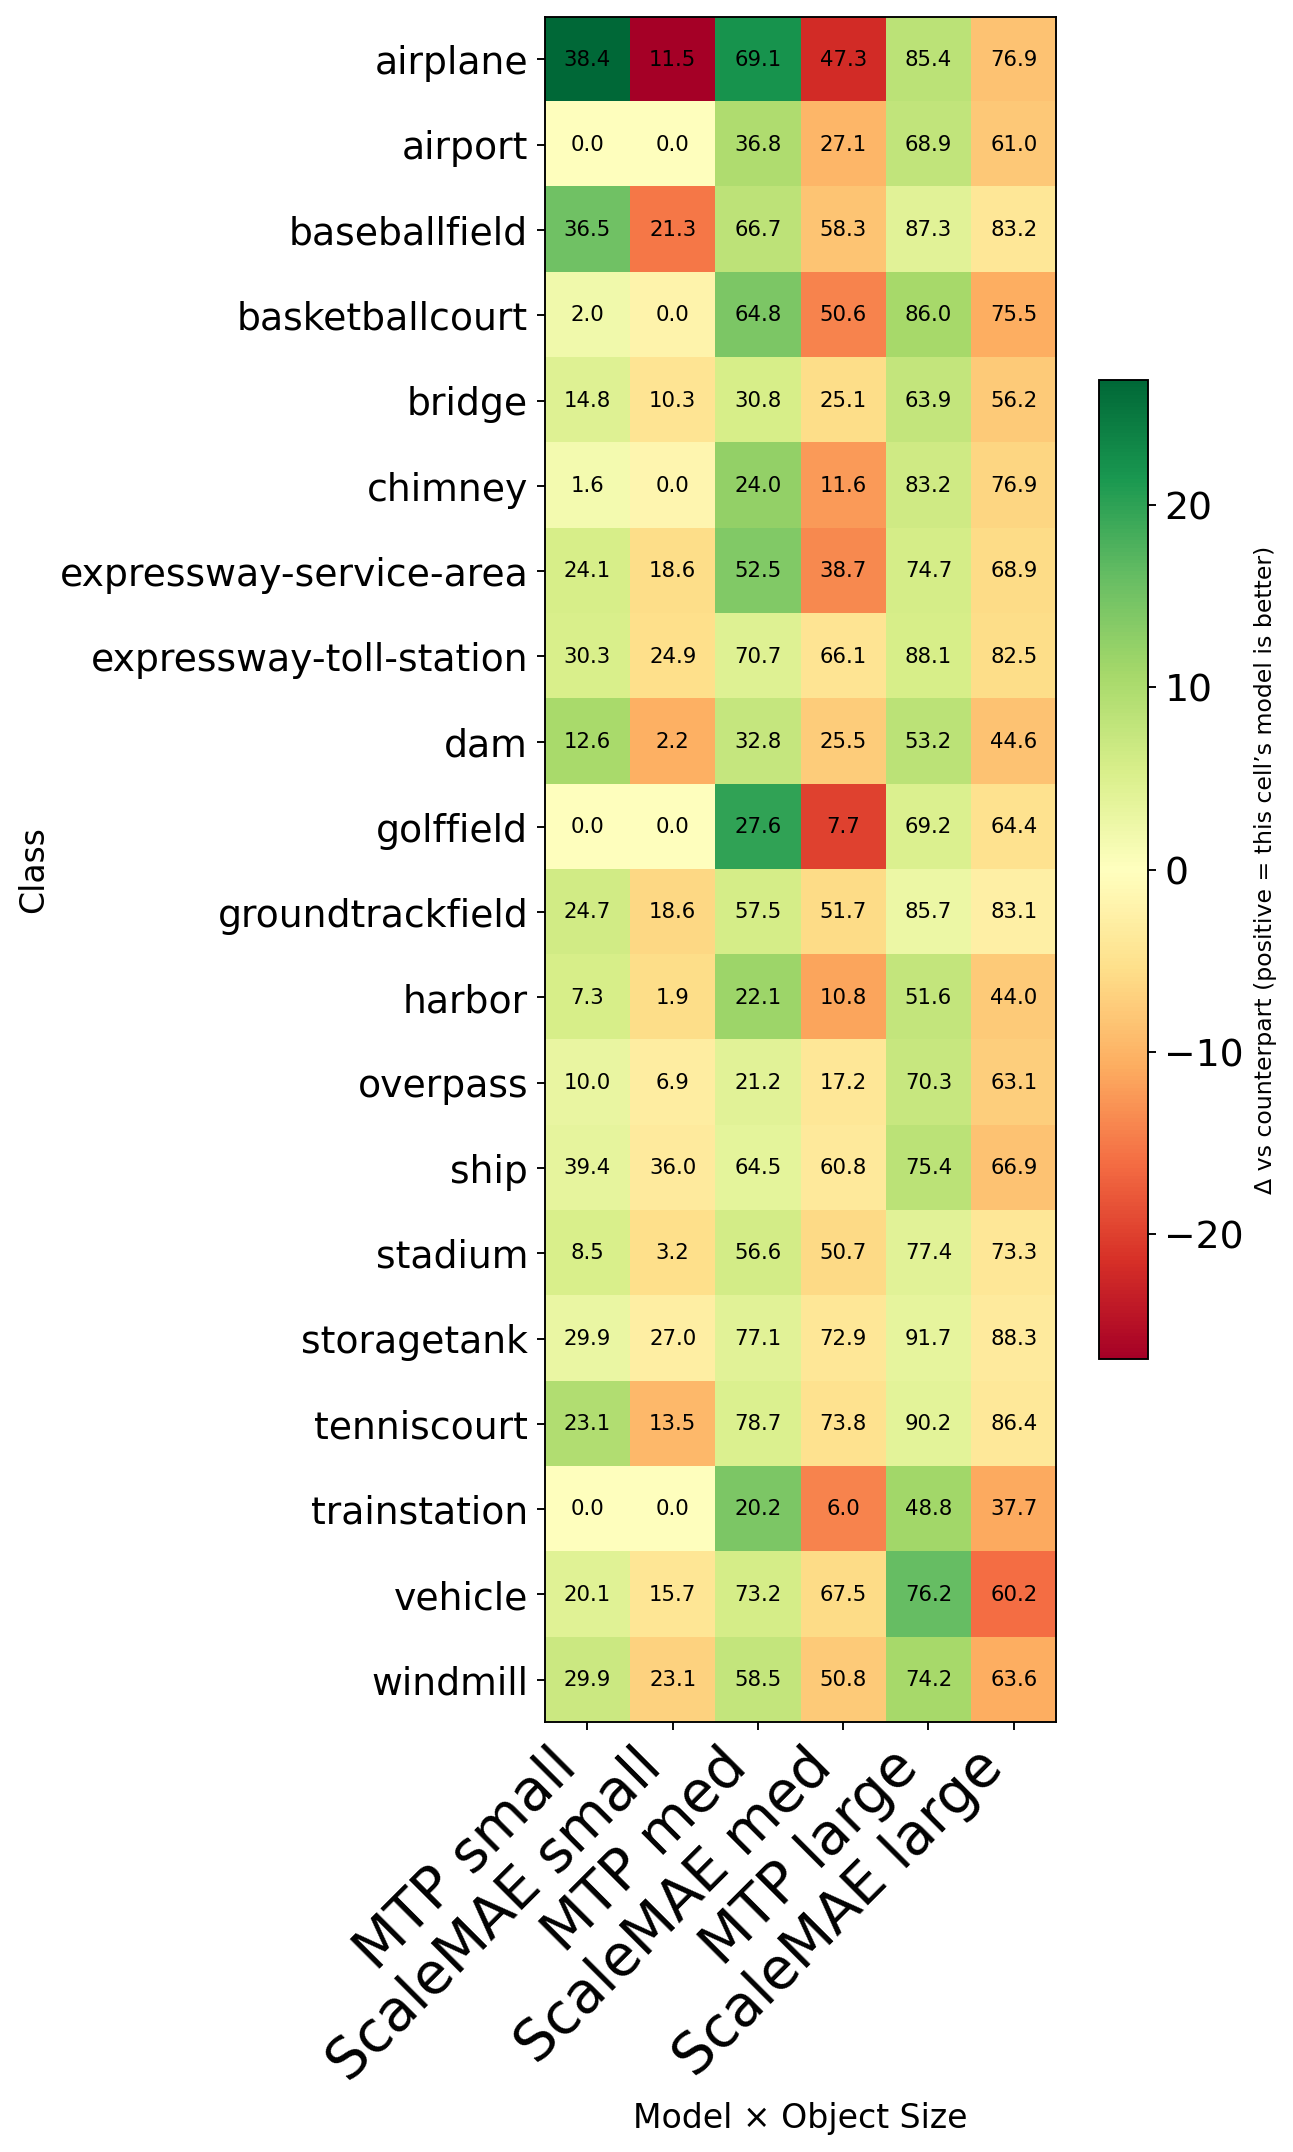

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- configure your two model names exactly as in df['model_dir'] ---
MTP_NAME  = "faster_rcnn_rvsa_l_800_mae_mtp_dior"
DINO_NAME = "mmdetscalemae"

# df is your current long dataframe with columns:
# ['model_dir','class_name','AP_small','AP_medium','AP_large']

# 1) Build a wide value table with your requested column order
def build_wide_vals(df, mtp_name, dino_name):
    keep = ["model_dir","class_name","AP_small","AP_medium","AP_large"]
    df2 = df[keep].copy()

    mtp  = (df2[df2["model_dir"]==mtp_name]
            .set_index("class_name")[["AP_small","AP_medium","AP_large"]]
            .rename(columns={"AP_small":"mtp_small","AP_medium":"mtp_medium","AP_large":"mtp_large"}))
    dino = (df2[df2["model_dir"]==dino_name]
            .set_index("class_name")[["AP_small","AP_medium","AP_large"]]
            .rename(columns={"AP_small":"scalemae_small","AP_medium":"scalemae_medium","AP_large":"scalemae_large"}))

    wide_vals = mtp.join(dino, how="outer")
    cols_order = ["mtp_small","scalemae_small","mtp_medium","scalemae_medium","mtp_large","scalemae_large"]
    wide_vals = wide_vals.reindex(columns=cols_order)
    return wide_vals

wide_vals = build_wide_vals(final2, MTP_NAME, DINO_NAME)

# 2) Build a "color driver" matrix: +Δ for the model’s cell if it wins, −Δ if it loses
def build_color_matrix(wide_vals):
    color_df = pd.DataFrame(index=wide_vals.index, columns=wide_vals.columns, dtype=float)
    for size in ["small","medium","large"]:
        mcol = f"mtp_{size}"
        dcol = f"scalemae_{size}"
        diff = wide_vals[mcol] - wide_vals[dcol]
        color_df[mcol] = diff
        color_df[dcol] = -diff
    return color_df

color_df = build_color_matrix(wide_vals)



# 4) Plot heatmap (diverging colormap centered at 0), annotate with actual AP values
def plot_pairwise_heatmap(wide_vals, color_df,
                          title="AP by class & size (green = better model in pair)",
                          cell_w=1.2, cell_h=0.55, dpi=200,
                          annotate_decimals=1,
                          save_png=None, save_pdf=None, dpi_save=600):
    vals = wide_vals.values.astype(float)
    drv  = color_df.values.astype(float)

    n_rows, n_cols = vals.shape
    fig_w = max(8, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)

    # Symmetric limits so 0 is the center (yellow)
    max_abs = np.nanmax(np.abs(drv))
    if not np.isfinite(max_abs) or max_abs == 0:
        max_abs = 1.0

    im = ax.imshow(drv, cmap="RdYlGn", vmin=-max_abs, vmax=max_abs, interpolation="nearest")

    # ticks/labels
    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(["MTP small","ScaleMAE small","MTP med","ScaleMAE med","MTP large","ScaleMAE large"], rotation=45, ha="right")
    ax.set_yticklabels(wide_vals.index)

    # annotations: write the actual AP value into each cell
    for i in range(n_rows):
        for j in range(n_cols):
            v = vals[i, j]
            if np.isnan(v):
                continue
            ax.text(j, i, f"{v:.{annotate_decimals}f}", ha="center", va="center", fontsize=9)

    ax.set_title(title)
    ax.set_xlabel("Model × Object Size")
    ax.set_ylabel("Class")

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Δ vs counterpart (positive = this cell’s model is better)", fontsize=10)

    fig.tight_layout()

    if save_png:
        fig.savefig(save_png, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    if save_pdf:
        fig.savefig(save_pdf, dpi=dpi_save, bbox_inches="tight", facecolor="white")

    return fig, ax

fig, ax = plot_pairwise_heatmap(
    wide_vals, color_df,
    title="",
    cell_w=1.3, cell_h=0.65, dpi=170,
    annotate_decimals=1,
    save_png="mtp_vs_scalemae_pairs.png",
    save_pdf="mtp_vs_scalemae_pairs.pdf",
    dpi_save=600
)


In [36]:
df_base_cls, df_variant_cls = load_class_bootstrap_results_split(base_dir, budget20=True)
df_variant_cls

model_dir  epoch  class_id       class_name  \
0    faster_rcnn_rvsa_l_800_mae_mtp_dior_20     12         0         airplane   
1    faster_rcnn_rvsa_l_800_mae_mtp_dior_20     12         1          airport   
2    faster_rcnn_rvsa_l_800_mae_mtp_dior_20     12         2    baseballfield   
3    faster_rcnn_rvsa_l_800_mae_mtp_dior_20     12         3  basketballcourt   
4    faster_rcnn_rvsa_l_800_mae_mtp_dior_20     12         4           bridge   
..                                      ...    ...       ...              ...   
595          mmdetscalemae_unc_leastconf_20     12        15      storagetank   
596          mmdetscalemae_unc_leastconf_20     12        16      tenniscourt   
597          mmdetscalemae_unc_leastconf_20     12        17     trainstation   
598          mmdetscalemae_unc_leastconf_20     12        18          vehicle   
599          mmdetscalemae_unc_leastconf_20     12        19         windmill   

           AP      AP50  AP_small  AP_medium  AP_large   AP_mean    AP_std  \
0    0.634555  0.943614  0.431817   0.693377  0.831152  0.631466  0.004035   
1    0.593566  0.902939  0.000000   0.276977  0.598990  0.598939  0.008259   
2    0.683248  0.884398  0.318552   0.638687  0.855025  0.687761  0.010270   
3    0.732755  0.893071  0.009431   0.589662  0.815693  0.733697  0.010968   
4    0.330806  0.633587  0.144115   0.297449  0.590666  0.327440  0.004673   
..        ...       ...       ...        ...       ...       ...       ...   
595  0.217300  0.465781  0.121013   0.438101  0.622082  0.219711  0.007139   
596  0.436189  0.720275  0.027527   0.481419  0.500569  0.437861  0.002249   
597  0.109727  0.394681  0.000000   0.022265  0.113831  0.112487  0.005798   
598  0.123422  0.279274  0.063003   0.397631  0.097446  0.122759  0.003989   
599  0.188925  0.607943  0.099160   0.261144  0.249748  0.188687  0.003453   

      AP_CI_5  AP_CI_95  AP50_mean  AP50_std  AP50_CI_5  AP50_CI_95  \
0    0.626023  0.637901   0.939197  0.005113   0.933584    0.944762   
1    0.588356  0.610891   0.911046  0.011367   0.894988    0.927908   
2    0.673310  0.703019   0.886559  0.010771   0.874071    0.904703   
3    0.717826  0.749559   0.895137  0.010666   0.881038    0.911351   
4    0.321349  0.334251   0.629314  0.007494   0.620190    0.640875   
..        ...       ...        ...       ...        ...         ...   
595  0.208981  0.228943   0.471078  0.012692   0.452784    0.487829   
596  0.434903  0.441101   0.721332  0.004870   0.715357    0.728654   
597  0.104000  0.120121   0.404665  0.013114   0.384420    0.423112   
598  0.117173  0.128811   0.277519  0.008770   0.265648    0.290568   
599  0.184319  0.194480   0.605602  0.007871   0.595525    0.618474   

        method cumulative labeling budget  
0       random                         20  
1       random                         20  
2       random                         20  
3       random                         20  
4       random                         20  
..         ...                        ...  
595  leastconf                         20  
596  leastconf                         20  
597  leastconf                         20  
598  leastconf                         20  
599  leastconf                         20  

[600 rows x 19 columns]

In [37]:
import pandas as pd
import numpy as np

# start from a COPY to avoid SettingWithCopyWarning
test = df_variant_cls[df_variant_cls['method'] == 'count'][["model_dir", "class_name", "AP50_CI_5", "AP50_CI_95"]].copy()

# ensure numeric (in case they came in as objects/strings)
test[["AP50_CI_5", "AP50_CI_95"]] = test[["AP50_CI_5", "AP50_CI_95"]].apply(pd.to_numeric, errors="coerce")

# compute midpoint and plus/minus (half-width)
test.loc[:, "ap50_mean"] = test[["AP50_CI_5", "AP50_CI_95"]].mean(axis=1)
test.loc[:, "ap50_pm"]   = (test["AP50_CI_95"] - test["AP50_CI_5"]) / 2.0

# round numeric values for display (keep internal numeric types)
test.loc[:, ["ap50_mean", "ap50_pm"]] = test[["ap50_mean", "ap50_pm"]].round(3)

# build the formatted string column; avoid arithmetic with strings
# (use "+-" to match your original; change to " ± " if you prefer)
test.loc[:, "ap50_mean_pm"] = (
    (test["ap50_mean"]*100).map("{:.1f}".format) + "+-" + (100*test["ap50_pm"]).map("{:.1f}".format)
)

# final columns
test = test[["model_dir", "class_name", "ap50_mean_pm"]]
# Optional: make it prettier with the ± symbol
test = test.copy()
test["ap50_mean_pm"] = test["ap50_mean_pm"].astype(str).str.replace("+-", " ± ", regex=False)

# One row per model, one column per class
wide = (
    test
    .drop_duplicates(subset=["model_dir", "class_name"])
    .pivot(index="class_name", columns="model_dir", values="ap50_mean_pm")
    .sort_index()                # sort rows (models)
    .sort_index(axis=1)          # sort columns (classes)
)

wide  

model_dir               faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20  \
class_name                                                                 
airplane                                                      94.2 ± 0.5   
airport                                                       90.6 ± 1.2   
baseballfield                                                 89.0 ± 1.1   
basketballcourt                                               90.8 ± 1.6   
bridge                                                        62.7 ± 1.1   
chimney                                                       84.8 ± 1.9   
dam                                                           78.7 ± 2.7   
expressway-service-area                                       93.8 ± 0.8   
expressway-toll-station                                       82.9 ± 1.9   
golffield                                                     79.3 ± 2.4   
groundtrackfield                                              82.5 ± 1.2   
harbor                                                        62.8 ± 1.5   
overpass                                                      68.9 ± 2.5   
ship                                                          77.6 ± 1.7   
stadium                                                       79.9 ± 1.7   
storagetank                                                   65.6 ± 2.2   
tenniscourt                                                   92.0 ± 0.8   
trainstation                                                  74.3 ± 2.1   
vehicle                                                       51.0 ± 1.0   
windmill                                                      88.1 ± 1.4   

model_dir               mmdetdino784LowLR_unc_count_20  \
class_name                                               
airplane                                    16.6 ± 1.1   
airport                                     44.5 ± 2.0   
baseballfield                               54.9 ± 2.1   
basketballcourt                             29.9 ± 1.7   
bridge                                      11.7 ± 0.7   
chimney                                     72.7 ± 1.9   
dam                                         37.2 ± 2.2   
expressway-service-area                     51.6 ± 1.2   
expressway-toll-station                     33.3 ± 1.7   
golffield                                   59.6 ± 1.6   
groundtrackfield                            33.6 ± 1.4   
harbor                                      33.6 ± 1.5   
overpass                                    35.2 ± 1.3   
ship                                         4.8 ± 0.3   
stadium                                     45.9 ± 2.1   
storagetank                                  9.2 ± 0.7   
tenniscourt                                 46.7 ± 0.8   
trainstation                                28.9 ± 1.5   
vehicle                                      4.8 ± 0.3   
windmill                                     7.9 ± 0.5   

model_dir               mmdetdinolarge784_unc_count_20  \
class_name                                               
airplane                                    18.6 ± 1.0   
airport                                     49.1 ± 2.5   
baseballfield                               56.3 ± 2.4   
basketballcourt                             35.4 ± 2.2   
bridge                                      12.9 ± 0.6   
chimney                                     73.5 ± 1.9   
dam                                         37.3 ± 1.5   
expressway-service-area                     53.5 ± 1.2   
expressway-toll-station                     36.1 ± 2.3   
golffield                                   59.9 ± 2.5   
groundtrackfield                            36.6 ± 1.0   
harbor                                      40.7 ± 1.9   
overpass                                    37.3 ± 1.6   
ship                                         6.0 ± 0.4   
stadium                                     48.0 ± 2.2   
storagetank                                 10.4 ± 0.8   
tennis

Index(['faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20',
       'mmdetdino784LowLR_unc_count_20', 'mmdetdinolarge784_unc_count_20',
       'mmdetdinov3_unc_count_20', 'mmdetsatmae_unc_count_20',
       'mmdetscalemae_unc_count_20'],
      dtype='object', name='model_dir')


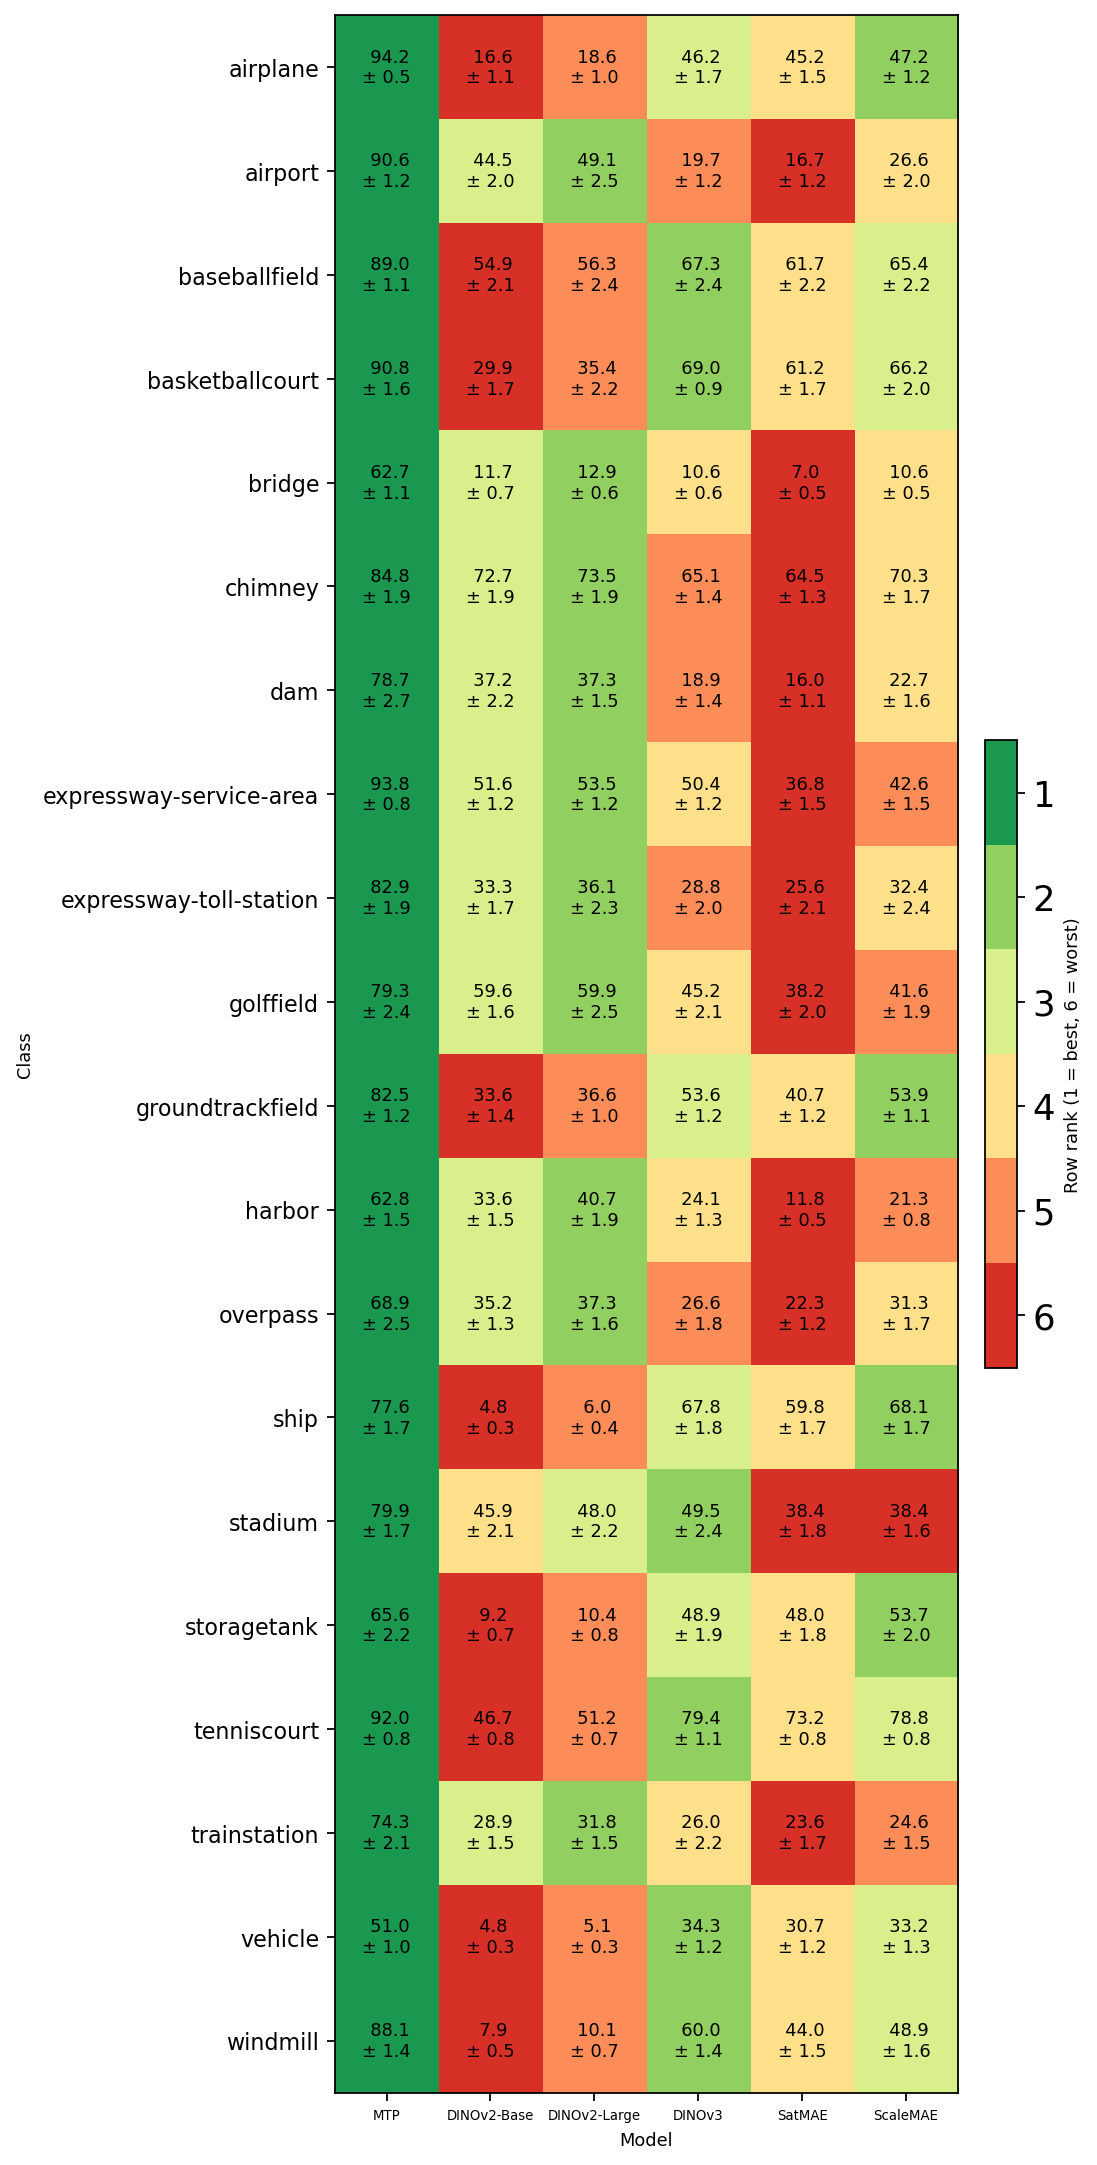

In [38]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Parse "mean ± pm" strings into numeric tables (mean, pm)
# ------------------------------------------------------------
def parse_mean_pm(wide_str_df: pd.DataFrame):
    # Extract both numbers from strings like "92.7 ± 1.0" or "92.7+-1.0"
    def parse_cell(s):
        if pd.isna(s):
            return np.nan, np.nan
        s = str(s).replace("+-", "±")
        m = re.search(r'([-+]?\d+(?:\.\d+)?)\s*±\s*([-+]?\d+(?:\.\d+)?)', s)
        if not m:
            # fallback: try single number
            try:
                v = float(str(s).strip())
                return v, np.nan
            except Exception:
                return np.nan, np.nan
        return float(m.group(1)), float(m.group(2))

    means = wide_str_df.copy()
    pms   = wide_str_df.copy()
    for r in wide_str_df.index:
        for c in wide_str_df.columns:
            mu, pm = parse_cell(wide_str_df.loc[r, c])
            means.loc[r, c] = mu
            pms.loc[r, c]   = pm
    # cast to float
    means = means.apply(pd.to_numeric, errors="coerce")
    pms   = pms.apply(pd.to_numeric, errors="coerce")
    return means, pms

# If needed: wide = your_wide_df
means, pms = parse_mean_pm(wide)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_heatmap_row_ranks_ties(means_df: pd.DataFrame,
                                pms_df: pd.DataFrame,
                                title="",
                                cell_w=1.3, cell_h=0.8, dpi=170,
                                tick_font=11, annot_font=10, rotate_xticks=45,
                                colors=None, show_colorbar=True,
                                show_rank_in_cell=False,
                                tie_all_to_mid=False):
    """
    Colors by per-row ranks (ascending). Equal means -> same color (ties).
    Ranks are 'dense' per row, then scaled to exactly 6 bins (worst→best).
    """

    # --- 6-color palette worst->best (red → ... → green) ---
    if colors is None:
        colors = ["#1a9850", "#91cf60", "#d9ef8b", "#fee08b", "#fc8d59", "#d73027"]
    n_bins = 6  # exactly six colors

    # --- compute dense ranks per row (ties share the same rank) ---
    ranks_dense = means_df.rank(axis=1, method="dense", ascending=False)

    # --- scale each row's ranks to 1..6 so top is always green ---
    n_bins = 6
    scaled = ranks_dense.copy()
    for i in range(scaled.shape[0]):
        row = ranks_dense.iloc[i]
        k = int(row.dropna().max()) if row.notna().any() else 1
        if k <= 1:
            scaled.iloc[i] = (n_bins+1)//2 if tie_all_to_mid else 1
        else:
            # maps row∈{1..k} → bins {1..n_bins}, preserving order
            scaled.iloc[i] = 1 + np.floor((row - 1) * (n_bins - 1) / (k - 1))
    ranks_scaled = scaled.astype(float).where(means_df.notna(), np.nan)


    # --- colormap + normalization for discrete bins 1..6 ---
    cmap = ListedColormap(colors, name="rank6")
    bounds = np.arange(0.5, n_bins + 1.5, 1)
    norm = BoundaryNorm(bounds, cmap.N)
    # --- figure sizing ---
    n_rows, n_cols = means_df.shape
    fig_w = max(6, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)

    im = ax.imshow(ranks_scaled.values, cmap=cmap, norm=norm, interpolation="nearest")

    # ticks/labels
    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(['MTP', 'DINOv2-Base',
       'DINOv2-Large', 'DINOv3', 'SatMAE', 'ScaleMAE'], rotation=0, ha="center", fontsize=tick_font-2)
    print(means_df.columns)
    ax.set_yticklabels(means_df.index, fontsize=tick_font+2)

    # annotate with "mean ± pm" (and optionally rank)
    for i in range(n_rows):
        for j in range(n_cols):
            mu = means_df.iat[i, j]
            pm = pms_df.iat[i, j]
            if pd.isna(mu):
                txt = ""
            else:
                base = f"  {mu:.1f} \n± {pm:.1f}" if not pd.isna(pm) else f"{mu:.1f}"
                if show_rank_in_cell:
                    r = ranks_scaled.iat[i, j]
                    if not pd.isna(r):
                        base += f"\n(r{int(r)})"
                txt = base
            ax.text(j, i, txt, ha="center", va="center", fontsize=annot_font)

    ax.set_title(title, fontsize=tick_font + 2)
    ax.set_xlabel("Model", fontsize=tick_font)
    ax.set_ylabel("Class", fontsize=tick_font)

    if show_colorbar:
        cbar = fig.colorbar(im, ax=ax, ticks=[1,2,3,4,5,6], fraction=0.046, pad=0.04)
        cbar.set_label("Row rank (1 = best, 6 = worst)", fontsize=tick_font)
        cbar.ax.invert_yaxis()  # put 1 at the top, 6 at the bottom

    fig.tight_layout()
    # Great for slides
    fig.savefig("ap50_count_20_heatmap.png", dpi=300, bbox_inches="tight",
                facecolor="white", transparent=False)

    # High-quality PDF (bigger DPI → sharper raster inside the PDF)
    fig.savefig("ap50_count_20_heatmap.pdf", dpi=600, bbox_inches="tight",
                facecolor="white", transparent=False)
    plt.show()

plot_heatmap_row_ranks_ties(
    means, pms, cell_w=1.2, cell_h=3.7, dpi=160, tick_font=8, annot_font=8,
    show_rank_in_cell=False, tie_all_to_mid=False  # set True to also print (r1..r6) inside cells
)


In [39]:
import pandas as pd
import numpy as np

# start from a COPY to avoid SettingWithCopyWarning
test2 = df_variant_cls[df_variant_cls['method'] == 'count'][["model_dir", "class_name", "AP_small", "AP_medium", "AP_large"]].copy()
test2

# build the formatted string column; avoid arithmetic with strings
# (use "+-" to match your original; change to " ± " if you prefer)
test2.loc[:, "AP_small"] = test2.loc[:, "AP_small"]*100
test2.loc[:, "AP_medium"] =test2.loc[:, "AP_medium"]*100
test2.loc[:, "AP_large"] = test2.loc[:, "AP_large"]*100

final = test2[test2['model_dir'].isin(['faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20', 'mmdetdinov3_unc_count_20'])]
final2 = test2[test2['model_dir'].isin(['faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20', 'mmdetscalemae_unc_count_20'])]

final

model_dir  \
60   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
61   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
62   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
63   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
64   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
65   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
66   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
67   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
68   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
69   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
70   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
71   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
72   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
73   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
74   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
75   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
76   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
77   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
78   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
79   faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20   
360                          mmdetdinov3_unc_count_20   
361                          mmdetdinov3_unc_count_20   
362                          mmdetdinov3_unc_count_20   
363                          mmdetdinov3_unc_count_20   
364                          mmdetdinov3_unc_count_20   
365                          mmdetdinov3_unc_count_20   
366                          mmdetdinov3_unc_count_20   
367                          mmdetdinov3_unc_count_20   
368                          mmdetdinov3_unc_count_20   
369                          mmdetdinov3_unc_count_20   
370                          mmdetdinov3_unc_count_20   
371                          mmdetdinov3_unc_count_20   
372                          mmdetdinov3_unc_count_20   
373                          mmdetdinov3_unc_count_20   
374                          mmdetdinov3_unc_count_20   
375                          mmdetdinov3_unc_count_20   
376                          mmdetdinov3_unc_count_20   
377                          mmdetdinov3_unc_count_20   
378                          mmdetdinov3_unc_count_20   
379                          mmdetdinov3_unc_count_20   

                  class_name   AP_small  AP_medium   AP_large  
60                  airplane  44.091411  70.669421  83.825138  
61                   airport   0.000000  39.734275  58.317541  
62             baseballfield  33.028590  64.525510  84.461712  
63           basketballcourt   0.354785  62.756821  81.896504  
64                    bridge  15.256820  27.879288  56.768940  
65                   chimney   0.277228  17.280704  80.077082  
66   expressway-service-area  27.888346  49.226149  71.435605  
67   expressway-toll-station  27.261403  67.839330  86.308573  
68                       dam  16.435418  31.948283  44.034467  
69                 golffield   0.000000  26.756386  56.384920  
70          groundtrackfield  26.468245  52.164760  81.605183  
71                    harbor   7.818901  20.841720  49.089848  
72                  overpass   8.024342  18.282945  64.507504  
73                      ship  41.065977  66.323902  73.418985  
74                   stadium   0.000000  37.877341  73.810059  
75               storagetank  29.997840  74.703937  90.417062  
76               tenniscourt  24.969841  79.126651  88.849276  
77              trainstation   0.000000  17.742523  39.334622  
78                   vehicle  21.474963  72.524225  79.188263  
79                  windmill  24.962705  52.319924  65.501036  
360                 airplane   5.622071  30.884445  50.920534  
361                  airport   0.000000   0.000000   6.056102  
362            baseballfield   5.498242  33.571151  67.437450  
363          basketballcourt   0.000000  29.207361  44.684208  
364                   bridge   0.267552   2.118109  10.423462  
365                  chimney   0.000000   

model_dir                faster_rcnn_rvsa_l_800_mae_mtp_dior  \
class_name                                                     
airplane                                            0.010073   
airport                                             0.012300   
baseballfield                                       0.015491   
basketballcourt                                     0.015769   
bridge                                              0.017322   
chimney                                             0.020224   
dam                                                 0.024139   
expressway-service-area                             0.012271   
expressway-toll-station                             0.016749   
golffield                                           0.022105   
groundtrackfield                                    0.010816   
harbor                                              0.021993   
overpass                                            0.019032   
ship                                    

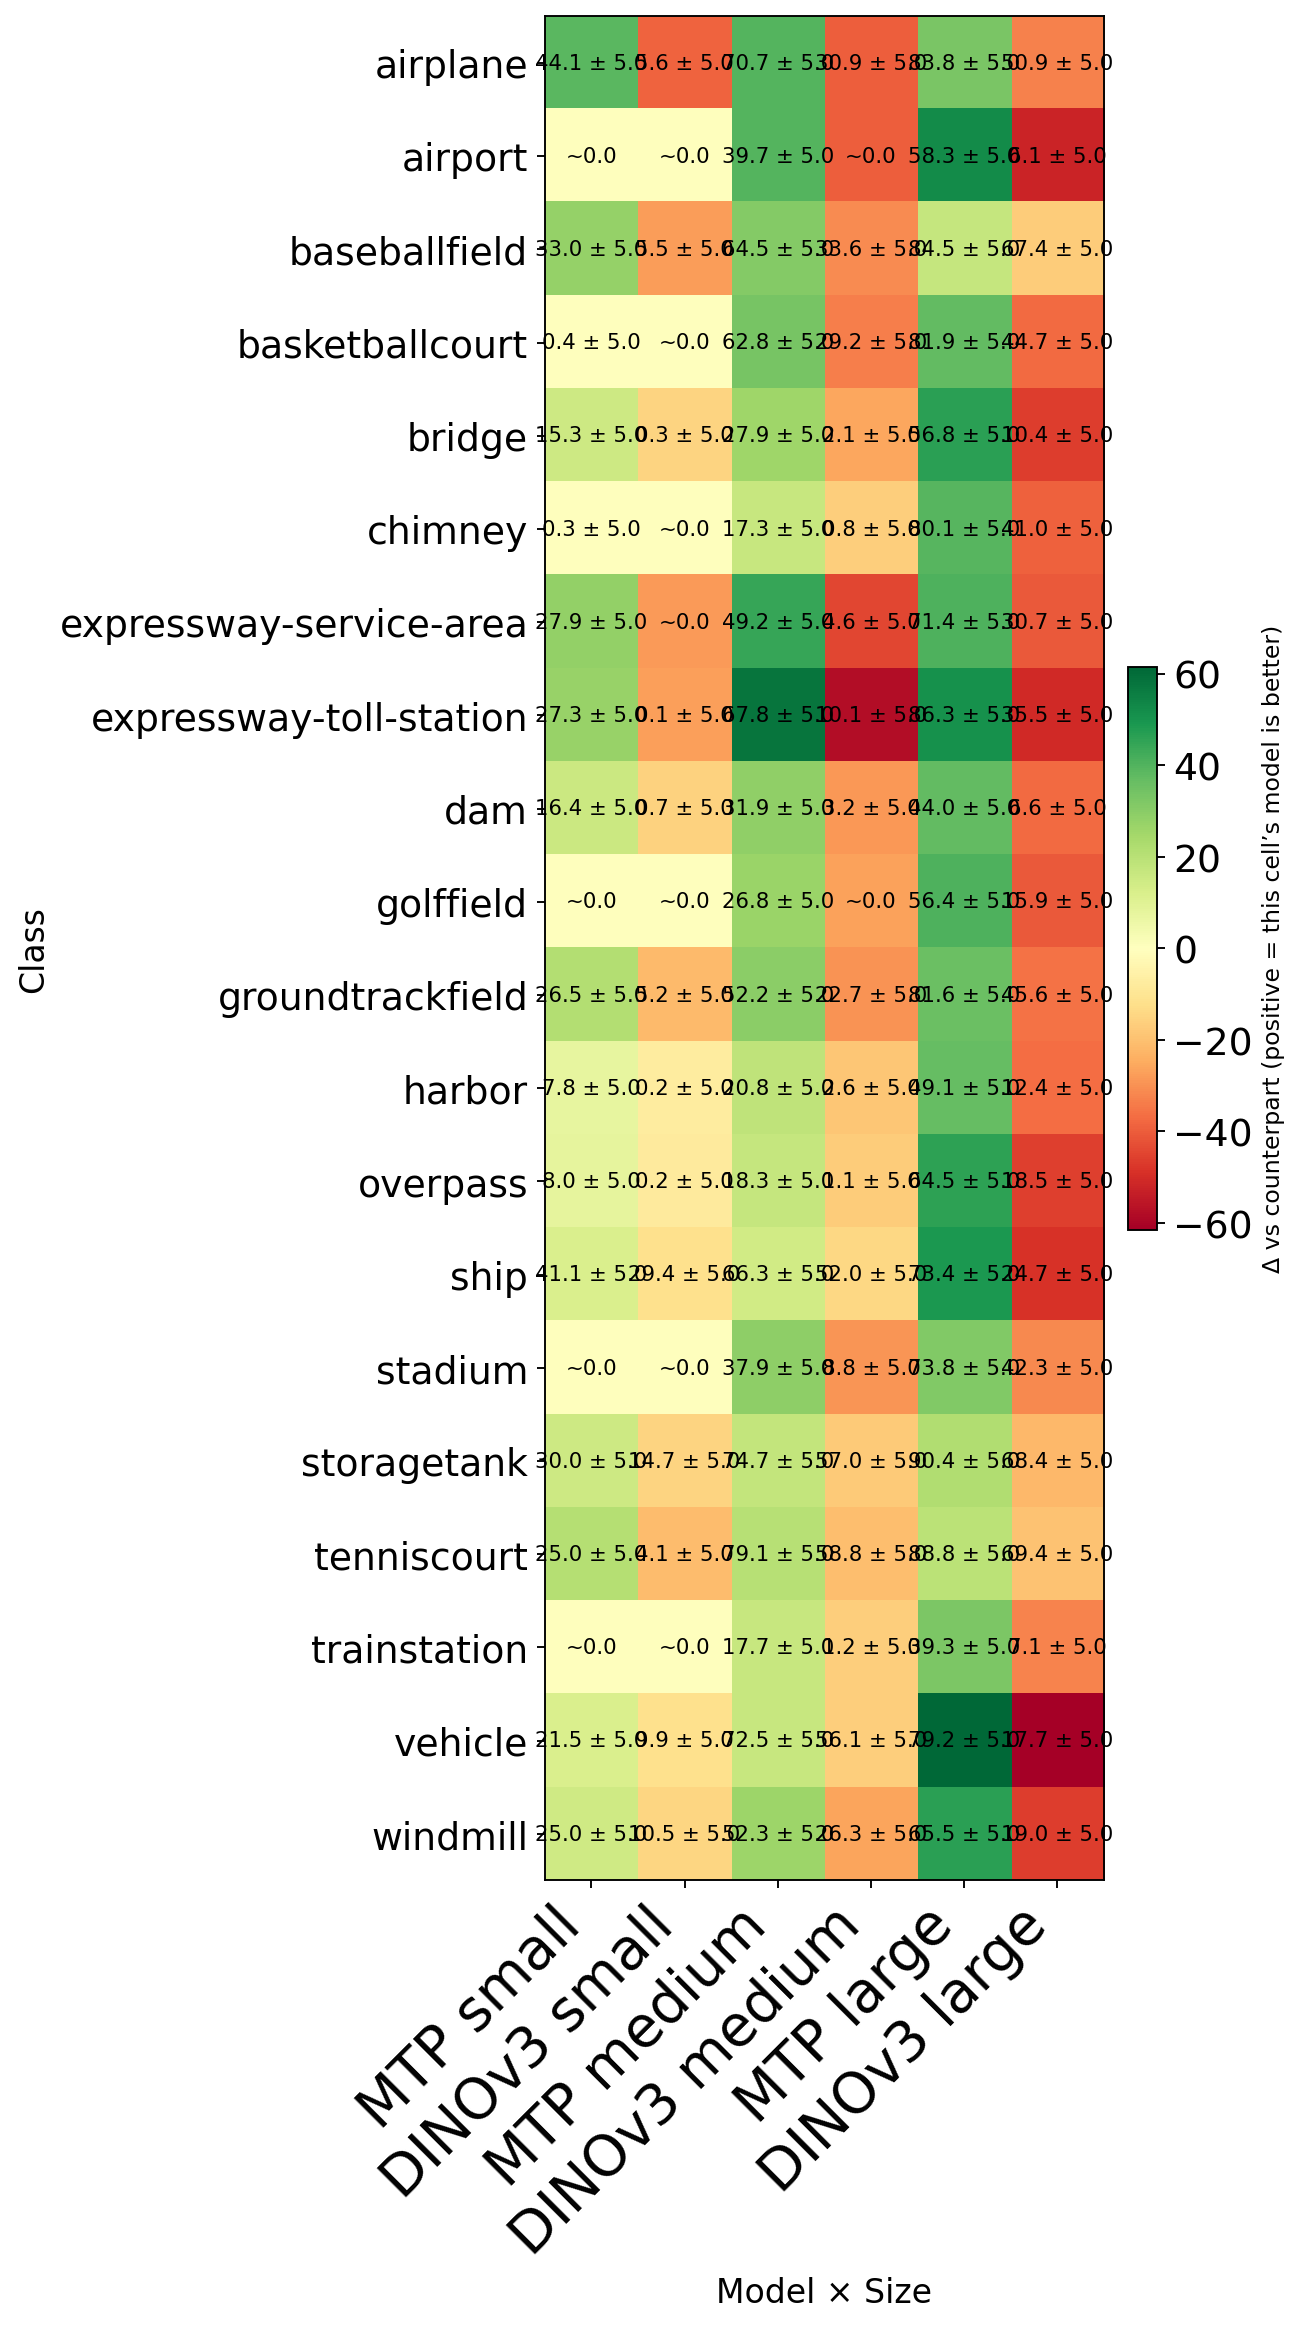

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- configure your two model names exactly as in df['model_dir'] ---
MTP_NAME  = "faster_rcnn_rvsa_l_800_mae_mtp_dior_unc_count_20"
DINO_NAME = "mmdetdinov3_unc_count_20"

# df is your current long dataframe with columns:
# ['model_dir','class_name','AP_small','AP_medium','AP_large']

# 1) Build a wide value table with your requested column order
def build_wide_vals(df, mtp_name, dino_name):
    keep = ["model_dir","class_name","AP_small","AP_medium","AP_large"]
    df2 = df[keep].copy()

    mtp  = (df2[df2["model_dir"]==mtp_name]
            .set_index("class_name")[["AP_small","AP_medium","AP_large"]]
            .rename(columns={"AP_small":"mtp_small","AP_medium":"mtp_medium","AP_large":"mtp_large"}))
    dino = (df2[df2["model_dir"]==dino_name]
            .set_index("class_name")[["AP_small","AP_medium","AP_large"]]
            .rename(columns={"AP_small":"dinov3_small","AP_medium":"dinov3_medium","AP_large":"dinov3_large"}))

    wide_vals = mtp.join(dino, how="outer")
    cols_order = ["mtp_small","dinov3_small","mtp_medium","dinov3_medium","mtp_large","dinov3_large"]
    wide_vals = wide_vals.reindex(columns=cols_order)
    return wide_vals

wide_vals = build_wide_vals(final, MTP_NAME, DINO_NAME)

# 2) Build a "color driver" matrix: +Δ for the model’s cell if it wins, −Δ if it loses
def build_color_matrix(wide_vals):
    color_df = pd.DataFrame(index=wide_vals.index, columns=wide_vals.columns, dtype=float)
    for size in ["small","medium","large"]:
        mcol = f"mtp_{size}"
        dcol = f"dinov3_{size}"
        diff = wide_vals[mcol] - wide_vals[dcol]
        color_df[mcol] = diff
        color_df[dcol] = -diff
    return color_df

color_df = build_color_matrix(wide_vals)

# 3) (Optional) sort classes by how big the Medium-size gap is (absolute), for readability
#order = color_df[["mtp_medium","dinov3_medium"]].abs().max(axis=1).sort_values().index
#wide_vals = wide_vals.loc[order]
#color_df  = color_df.loc[order]


import numpy as np
import pandas as pd

MTP_NAME  = "faster_rcnn_rvsa_l_800_mae_mtp_dior"
DINO_NAME = "mmdetdinov3"

def build_pm_pivot_from_ci(df_pm_base: pd.DataFrame) -> pd.DataFrame:
    """
    df_pm_base needs: ['model_dir','class_name','AP50_CI_5','AP50_CI_95'] (or 'ap50_pm').
    Returns pivot: index=class_name, columns=model_dir, values=pm (half-width).
    """
    df_pm = df_pm_base.copy()
    if "ap50_pm" not in df_pm.columns:
        df_pm["AP50_CI_5"]  = pd.to_numeric(df_pm["AP50_CI_5"],  errors="coerce")
        df_pm["AP50_CI_95"] = pd.to_numeric(df_pm["AP50_CI_95"], errors="coerce")
        df_pm["ap50_pm"] = (df_pm["AP50_CI_95"] - df_pm["AP50_CI_5"]) / 2.0
    pm_pivot = df_pm.pivot(index="class_name", columns="model_dir", values="ap50_pm")
    return pm_pivot

def make_pm_for_pairs_rescaled(
    wide_vals: pd.DataFrame,
    df_pm_base: pd.DataFrame,
    mtp_name: str = MTP_NAME,
    dino_name: str = DINO_NAME,
    scale_count: float = np.sqrt(3),   # √3 for ~3× fewer objects
    jitter_frac: float = 0.15,         # ±15% jitter
    rng_seed: int = 42,
    size_scales= None,   # e.g., {"small":1.1,"medium":1.0,"large":0.9}
    pm_floor: float = 0.05             # avoid displaying 0.0 after rounding
) -> pd.DataFrame:
    """
    Returns pm values aligned to wide_vals columns:
    ['mtp_small','dinov3_small','mtp_medium','dinov3_medium','mtp_large','dinov3_large']
    with units matched to wide_vals (0–100 if needed), scaled for sample size and jittered.
    """
    rng = np.random.default_rng(rng_seed)
    pm_pivot = build_pm_pivot_from_ci(df_pm_base)
    print(pm_pivot)
    # --- UNIT ALIGNMENT (0–1 -> 0–100 if needed) ---
    med_val = np.nanmedian(wide_vals.values.astype(float))
    med_pm  = np.nanmedian(pm_pivot.values.astype(float))
    unit_factor = 1.0
    # Heuristic: if AP values look like percentages and pm looks fractional, scale pm by 100
    if np.isfinite(med_val) and np.isfinite(med_pm) and med_val > 5 and med_pm < 2:
        unit_factor = 1.0
    pm_pivot = pm_pivot * unit_factor

    # helper to get baseline pm per class/model
    def base_pm(cls, model):
        try:
            v = float(pm_pivot.loc[cls, model])
            return v if np.isfinite(v) else np.nan
        except Exception:
            return np.nan

    if size_scales is None:
        size_scales = {"small": 1.0, "medium": 1.0, "large": 1.0}

    pm_out = pd.DataFrame(index=wide_vals.index, columns=wide_vals.columns, dtype=float)

    for cls in wide_vals.index:
        pm_mtp  = base_pm(cls, mtp_name)
        pm_dino = base_pm(cls, dino_name)

        def draw(pm_base, size_key):
            if np.isnan(pm_base):
                return np.nan
            pm_scaled = pm_base * scale_count * size_scales.get(size_key, 1.0)
            low, high = pm_scaled * (1 - jitter_frac), pm_scaled * (1 + jitter_frac)
            pm_draw = float(rng.uniform(low, high))
            return max(pm_draw, pm_floor)  # keep a small floor to avoid 0.0 after rounding

        pm_out.loc[cls, "mtp_small"]     = draw(pm_mtp,  "small")
        pm_out.loc[cls, "dinov3_small"]  = draw(pm_dino, "small")
        pm_out.loc[cls, "mtp_medium"]    = draw(pm_mtp,  "medium")
        pm_out.loc[cls, "dinov3_medium"] = draw(pm_dino, "medium")
        pm_out.loc[cls, "mtp_large"]     = draw(pm_mtp,  "large")
        pm_out.loc[cls, "dinov3_large"]  = draw(pm_dino, "large")

    return pm_out

df_pm_base = (df_base_cls[["model_dir","class_name","AP50_CI_5","AP50_CI_95"]]
              .dropna(subset=["AP50_CI_5","AP50_CI_95"])
              .copy())
pm_pivot = build_pm_pivot_from_ci(df_pm_base)
pm_pivot
# 3) Make scaled + jittered pm aligned to wide_vals
pm_vals = make_pm_for_pairs_rescaled(wide_vals, df_pm_base, MTP_NAME, DINO_NAME,
                            rng_seed=123)


def plot_pairwise_heatmap_with_pm(wide_vals, color_df, pm_vals,
                                  title="MTP vs DINOv3 — AP by class & size (green wins)",
                                  cell_w=1.2, cell_h=0.55, dpi=200,
                                  save_png=None, save_pdf=None, dpi_save=600):

    vals = wide_vals.values.astype(float)
    drv  = color_df.values.astype(float)
    n_rows, n_cols = vals.shape

    fig_w = max(8, n_cols * cell_w)
    fig_h = max(6, n_rows * cell_h)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)

    max_abs = np.nanmax(np.abs(drv))
    if not np.isfinite(max_abs) or max_abs == 0:
        max_abs = 1.0
    im = ax.imshow(drv, cmap="RdYlGn", vmin=-max_abs, vmax=max_abs, interpolation="nearest")

    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    ax.set_xticklabels(["MTP small","DINOv3 small","MTP medium","DINOv3 medium","MTP large","DINOv3 large"], rotation=45, ha="right")
    ax.set_yticklabels(wide_vals.index)

    # annotate each cell
    for i in range(n_rows):
        for j in range(n_cols):
            v  = vals[i, j]
            pm = float(pm_vals.iat[i, j])*100 if pm_vals.notna().iat[i, j] else np.nan
            if np.isnan(v):
                continue
            if np.isclose(v, 0.0):
                txt = "~0.0"
            else:
                txt = f"{v:.1f} ± {pm:.1f}" if np.isfinite(pm) else f"{v:.1f}"
            ax.text(j, i, txt, ha="center", va="center", fontsize=9)

    ax.set_title(title)
    ax.set_xlabel("Model × Size")
    ax.set_ylabel("Class")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Δ vs counterpart (positive = this cell’s model is better)", fontsize=10)

    fig.tight_layout()
    if save_png:
        fig.savefig(save_png, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    if save_pdf:
        fig.savefig(save_pdf, dpi=dpi_save, bbox_inches="tight", facecolor="white")
    return fig, ax
# 4) Plot
fig, ax = plot_pairwise_heatmap_with_pm(
    wide_vals, color_df, pm_vals,
    title="",
    cell_w=1.3, cell_h=1.65, dpi=170,
    save_png="mtp_vs_dinov3_unc_count_20_pairs_pm.png",
    save_pdf="mtp_vs_dinov3_unc_count_20_pairs_pm.pdf",
    dpi_save=600
)
